<a href="https://colab.research.google.com/github/john500play/ml-dementia-prediction/blob/main/dementia_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This Notebook Details Preliminary Exploratory Data Analysis on the NACC Dataset -
The Objective of this Research is to accurately predict Dementia Risk in order to instigate action of specific risk factors that could delay or prevent moderate to severe cognitive impairment.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
#from sklearn.cross_validation import cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelBinarizer
#from sklearn.grid_search import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ds_nacc = pd.read_csv ('investigator_nacc64.csv',low_memory = False)

ds_nacc.head()



,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
1,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
2,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
3,NACC007213,186,I,3.0,5,24,2023,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
4,NACC008514,186,I,3.0,11,15,2022,1,1,1,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0


In [ ]:
ds_nacc.tail()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
40696,NACC774978,2096,F,2.0,11,13,2014,8,14,14,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
40697,NACC774978,2096,F,3.0,11,13,2015,9,14,14,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
40698,NACC774978,2096,F,3.0,12,29,2016,10,14,14,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
40699,NACC774978,2096,F,3.0,1,9,2018,11,14,14,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0
40700,NACC774978,2096,F,3.0,6,4,2019,12,14,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation. Data is Initially Loaded from downloaded file from NACC Servers.
Data Load was successfully completed and preview of Column Header and First 5 and last 5 rows loaded successfully.

In [ ]:
ds_nacc.shape

(40701, 1024)

In [ ]:
ds_nacc['CDRGLOB'].describe()

count    40701.000000
mean         0.535282
std          0.718821
min          0.000000
25%          0.000000
50%          0.500000
75%          0.500000
max          3.000000
Name: CDRGLOB, dtype: float64

In [ ]:
ds_nacc['EDUC'].describe()

count    40701.000000
mean        16.166433
std          8.331127
min          0.000000
25%         13.000000
50%         16.000000
75%         18.000000
max         99.000000
Name: EDUC, dtype: float64

Observation: For Years of Education Completed, the mean is around 16 years while majority of the data points fall below the 3rd quartile, data points beyond the 3rd quartile might contain possible outliers.
Since the mean years is close to the 50% mark, this suggests that this feature follows a Normal Distribution

**Objective: Achieving an appropriate dataset for Dementia Prediction**

Observation: dataset has 40,701 rows and 1024 features.


In [ ]:
def bp_status(colvar1, colvar2):

 if colvar1 in [0, 120] and colvar2 in [0, 80]:
        return 'Healthy'
 elif colvar1 in [120, 129] and colvar2 in [0,80]:
        return 'Elevated'
 elif colvar1 >129 and colvar2 >80:
        return 'Risk_HYP'
 else:
        return 'N/A'


ds_nacc['BPSTATUS'] = ds_nacc.apply(lambda row: bp_status(row['BPSYS'], row['BPDIAS']), axis=1)
ds_nacc['BPSTATUS'].unique()

array(['Risk_HYP', 'N/A', 'Healthy', 'Elevated'], dtype=object)

In [ ]:

ds_nacc_subset = ds_nacc[["NACCID","SEX", "NACCAVST","BPSYS",'BPDIAS','HRATE','HEARING','MARISTAT',
"NACCMMSE", "CDRGLOB","DIABETES","NACCTBI","NACCGDS","NACCIDEM",'EDUC','VISITYR','BIRTHYR',"TOBAC30",
"TOBAC100","SMOKYRS","QUITSMOK","ALCOHOL",'NACCBMI','VISION','CVHATT','SLEEPAP','HYPOSOM','SLEEPOTH']]

ds_nacc_subset.head()

,NACCID,SEX,NACCAVST,BPSYS,BPDIAS,HRATE,HEARING,MARISTAT,NACCMMSE,CDRGLOB,...,TOBAC100,SMOKYRS,QUITSMOK,ALCOHOL,NACCBMI,VISION,CVHATT,SLEEPAP,HYPOSOM,SLEEPOTH
0,NACC002909,1,1,160.0,85.0,59.0,1,1,-4,0.5,...,0,0,888,0,32.4,0,0,0.0,1.0,0.0
1,NACC004352,2,1,888.0,888.0,888.0,1,1,-4,1.0,...,0,0,888,9,888.8,1,9,8.0,8.0,8.0
2,NACC004687,1,1,148.0,75.0,70.0,0,3,-4,0.0,...,0,0,888,0,19.0,0,0,0.0,0.0,0.0
3,NACC007213,2,1,139.0,46.0,52.0,0,3,-4,0.5,...,1,27,42,0,22.1,0,1,0.0,1.0,0.0
4,NACC008514,1,1,117.0,60.0,66.0,0,1,-4,0.5,...,1,4,999,0,28.9,0,0,0.0,0.0,0.0


In [ ]:
ds_nacc_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40701 entries, 0 to 40700
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NACCID    40701 non-null  object 
 1   SEX       40701 non-null  int64  
 2   NACCAVST  40701 non-null  int64  
 3   BPSYS     40501 non-null  float64
 4   BPDIAS    40501 non-null  float64
 5   HRATE     40501 non-null  float64
 6   HEARING   40701 non-null  int64  
 7   MARISTAT  40701 non-null  int64  
 8   NACCMMSE  40701 non-null  int64  
 9   CDRGLOB   40701 non-null  float64
 10  DIABETES  40701 non-null  int64  
 11  NACCTBI   40701 non-null  int64  
 12  NACCGDS   40701 non-null  int64  
 13  NACCIDEM  40700 non-null  float64
 14  EDUC      40701 non-null  int64  
 15  VISITYR   40701 non-null  int64  
 16  BIRTHYR   40701 non-null  int64  
 17  TOBAC30   40701 non-null  int64  
 18  TOBAC100  40701 non-null  int64  
 19  SMOKYRS   40701 non-null  int64  
 20  QUITSMOK  40701 non-null  in

In [ ]:
ds_nacc_subset['AGE'] = ds_nacc_subset['VISITYR']- ds_nacc_subset['BIRTHYR']

bin_edges =[0,45,65,120]
bin_labels =['Early life','Mid life','Later life']
ds_nacc_subset['AGE_CATEGORY']=pd.cut(ds_nacc_subset['AGE'],bins=bin_edges, labels=bin_labels)

<ipython-input-6-619dea59f76a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_nacc_subset['AGE'] = ds_nacc_subset['VISITYR']- ds_nacc_subset['BIRTHYR']
<ipython-input-6-619dea59f76a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_nacc_subset['AGE_CATEGORY']=pd.cut(ds_nacc_subset['AGE'],bins=bin_edges, labels=bin_labels)


In [ ]:
def bp_status(colvar1, colvar2):

 if colvar1 in [0, 120] and colvar2 in [0, 80]:
        return 0
 elif colvar1 in [120, 129] and colvar2 in [0,80]:
        return 1
 elif colvar1 >129 and colvar2 >80:
        return 1
 else:
        return 0


ds_nacc_subset['RISK_HYP'] = ds_nacc_subset.apply(lambda row: bp_status(row['BPSYS'], row['BPDIAS']), axis=1)
ds_nacc_subset['RISK_HYP'].value_counts()

<ipython-input-7-c5839a12cf9a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_nacc_subset['RISK_HYP'] = ds_nacc_subset.apply(lambda row: bp_status(row['BPSYS'], row['BPDIAS']), axis=1)


RISK_HYP
0    30346
1    10355
Name: count, dtype: int64

In [ ]:
def heavy_smoking(row):
 n1= row['TOBAC100']
 n2= row['SMOKYRS']
 n3=row['TOBAC30']
 n4= row['QUITSMOK']


 if (n1 == 1 or n3==1) and (n2>0 or n4!=0):
  return 1
 else:
   return 0
ds_nacc_subset['HEAVY_SMOK'] = ds_nacc_subset.apply(heavy_smoking, axis=1)
ds_nacc_subset['HEAVY_SMOK'].value_counts()

<ipython-input-8-2949788fdf89>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_nacc_subset['HEAVY_SMOK'] = ds_nacc_subset.apply(heavy_smoking, axis=1)


HEAVY_SMOK
0    29419
1    11282
Name: count, dtype: int64

In [ ]:
def sleeping_disorder(colvar1, colvar2, colvar3):
    if colvar1 == 1 or colvar2==1 or colvar3==1:
        return 1
    else:
        return 0


# Assuming 'TOBAC30' and 'TOBAC100' are the column names in your DataFrame 'ds_nacc'
ds_nacc_subset['SLEEPDIS'] = ds_nacc_subset.apply(lambda row: sleeping_disorder(row['SLEEPAP'], row['HYPOSOM'], row['SLEEPOTH']), axis=1)

ds_nacc_subset['SLEEPDIS'].value_counts()
#ds_nacc['SLEEPAP'].value_counts()

<ipython-input-9-ec70e90f343c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_nacc_subset['SLEEPDIS'] = ds_nacc_subset.apply(lambda row: sleeping_disorder(row['SLEEPAP'], row['HYPOSOM'], row['SLEEPOTH']), axis=1)


SLEEPDIS
0    33971
1     6730
Name: count, dtype: int64

In [ ]:
def married_with_partner(n):
 if n == 1 or n==6:
  return 1
 else: return 0
ds_nacc_subset.loc[:, 'MARRIED_RELATIONSHIP'] = ds_nacc_subset['MARISTAT'].apply(married_with_partner)

ds_nacc_subset['MARRIED_RELATIONSHIP'].value_counts()


<ipython-input-10-d2efb57ed1d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_nacc_subset.loc[:, 'MARRIED_RELATIONSHIP'] = ds_nacc_subset['MARISTAT'].apply(married_with_partner)


MARRIED_RELATIONSHIP
1    26900
0    13801
Name: count, dtype: int64

In [ ]:
ds_nacc_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40701 entries, 0 to 40700
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   NACCID                40701 non-null  object  
 1   SEX                   40701 non-null  int64   
 2   NACCAVST              40701 non-null  int64   
 3   BPSYS                 40501 non-null  float64 
 4   BPDIAS                40501 non-null  float64 
 5   HRATE                 40501 non-null  float64 
 6   HEARING               40701 non-null  int64   
 7   MARISTAT              40701 non-null  int64   
 8   NACCMMSE              40701 non-null  int64   
 9   CDRGLOB               40701 non-null  float64 
 10  DIABETES              40701 non-null  int64   
 11  NACCTBI               40701 non-null  int64   
 12  NACCGDS               40701 non-null  int64   
 13  NACCIDEM              40700 non-null  float64 
 14  EDUC                  40701 non-null  int64   
 15  VI

In [ ]:
missing_values = ds_nacc_subset.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Print columns along with their count of missing values
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
BPSYS       200
BPDIAS      200
HRATE       200
NACCIDEM      1
NACCBMI       1
SLEEPAP       1
HYPOSOM       1
SLEEPOTH      1
dtype: int64


In [ ]:
columns_with_values = ds_nacc_subset.columns[ds_nacc_subset.isin([-4, 888]).any()]

# Print columns containing the particular values
print("Columns containing Noise and/or Outliers:")
print(columns_with_values)

Columns containing Noise and/or Outliers:
Index(['BPSYS', 'BPDIAS', 'HRATE', 'HEARING', 'NACCMMSE', 'DIABETES',
       'NACCTBI', 'NACCGDS', 'TOBAC30', 'TOBAC100', 'SMOKYRS', 'QUITSMOK',
       'ALCOHOL', 'NACCBMI', 'VISION', 'CVHATT', 'SLEEPAP', 'HYPOSOM',
       'SLEEPOTH'],
      dtype='object')


In [ ]:
num_columns = len(ds_nacc_subset.columns)

# Calculate the starting index for the middle 6 columns
#start_index = (num_columns - 6) // 2

start_index=25

# Slice the DataFrame to select the middle 6 columns
middle_columns = ds_nacc_subset.iloc[:, start_index:start_index+7]

# Describe the middle 6 columns
middle_columns.describe()

,SLEEPAP,HYPOSOM,SLEEPOTH,HEAVY_SMOK,SLEEPDIS,AGE
count,40700.000000,40700.000000,40700.000000,40701.000000,40701.000000,40701.000000
mean,-1.738968,-1.829410,-1.826585,0.277192,0.165352,72.960222
std,2.373173,2.186599,2.280713,0.447618,0.371503,10.573304
min,-4.000000,-4.000000,-4.000000,0.000000,0.000000,18.000000
25%,-4.000000,-4.000000,-4.000000,0.000000,0.000000,67.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,80.000000
max,8.000000,8.000000,8.000000,1.000000,1.000000,107.000000


In [ ]:
ds_nacc_subset.describe()

,SEX,NACCAVST,BPSYS,BPDIAS,HRATE,HEARING,MARISTAT,NACCMMSE,CDRGLOB,DIABETES,...,VISION,CVHATT,SLEEPAP,HYPOSOM,SLEEPOTH,HEAVY_SMOK,SLEEPDIS,AGE,RISK_HYP,MARRIED_RELATIONSHIP
count,40701.000000,40701.000000,40501.000000,40501.000000,40501.000000,40701.000000,40701.000000,40701.000000,40701.000000,40701.000000,...,40701.000000,40701.000000,40700.000000,40700.000000,40700.000000,40701.000000,40701.000000,40701.000000,40701.000000,40701.000000
mean,1.567185,5.248495,175.067653,127.054344,124.984766,0.331859,1.764134,11.093683,0.535282,-1.279281,...,-0.028992,-1.328321,-1.738968,-1.829410,-1.826585,0.277192,0.165352,72.960222,0.254416,0.660917
std,0.495472,3.713038,208.668481,218.710380,225.728892,1.873444,1.368563,18.830742,0.718821,2.086899,...,1.884176,2.033574,2.373173,2.186599,2.280713,0.447618,0.371503,10.573304,0.435538,0.473404
min,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000,-4.000000,0.000000,-4.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,1.000000,2.000000,117.000000,65.000000,58.000000,0.000000,1.000000,-4.000000,0.000000,-4.000000,...,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,67.000000,0.000000,0.000000
50%,2.000000,4.000000,131.000000,74.000000,66.000000,1.000000,1.000000,-4.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,1.000000
75%,2.000000,7.000000,148.000000,82.000000,76.000000,1.000000,2.000000,27.000000,0.500000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,80.000000,1.000000,1.000000
max,2.000000,18.000000,888.000000,888.000000,888.000000,9.000000,9.000000,98.000000,3.000000,9.000000,...,9.000000,9.000000,8.000000,8.000000,8.000000,1.000000,1.000000,107.000000,1.000000,1.000000


**Objective: Achieving an appropriate dataset for Dementia Prediction**

Observation: The number of features of the NACC dataset is reduced to allow for more manageable exploration activities

In [ ]:
ds_nacc_subset.shape

(40701, 29)

**Objective: Achieving an appropriate dataset for Dementia Prediction**

Observation: The subset of the NACC dataset now contains 40701 rows and 19 columns

**Objective: Achieving an appropriate dataset for Dementia Prediction**

Observation: From the describe statistics, the following features are discrete variables but showing numeric datatypes


*   SEX
*   DIABETES
*   HEARING
*   NACCDIED
*   MARISTAT
*   HXHYPER
*   CDRGLOB
*   NACCTBI
*   NACCIDEM
*   TOBAC30
*   TOBAC100
*   QUITSMOK
*   ALCOHOL
*   VISION
*   SLEEPDIS
*   CVHATT
















In [ ]:
#task 1 finding columns with missing data

[features for features in ds_nacc_subset.columns if ds_nacc_subset[features].isnull().sum()>0]

['BPSYS', 'BPDIAS', 'HRATE', 'NACCDIED', 'NACCIDEM', 'NACCBMI']

Observation: 6 features in the original dataset contain rows with missing values

In [ ]:
ds_nacc_subset.nunique()

NACCID                  13962
SEX                         2
NACCAVST                   18
BPSYS                     155
BPDIAS                     97
HRATE                      99
HEARING                     4
MARISTAT                    7
NACCMMSE                   37
CDRGLOB                     5
DIABETES                    5
NACCTBI                     4
NACCGDS                    18
NACCIDEM                    3
EDUC                       33
VISITYR                    19
BIRTHYR                    93
TOBAC30                     4
TOBAC100                    4
SMOKYRS                    78
QUITSMOK                   87
ALCOHOL                     5
NACCBMI                   401
VISION                      4
CVHATT                      5
SLEEPAP                     4
HYPOSOM                     4
SLEEPOTH                    4
AGE                        89
AGE_CATEGORY                3
RISK_HYP                    2
HEAVY_SMOK                  2
SLEEPDIS                    2
MARRIED_RE

Observation: NACCID has 13,962 unique values out of 40,761 occurences. It means there is existence of duplicated Subject information from repeated visits since the dataset is a product of a longuitudinal study. The dataset contains  some cross-sectional features (SEX, EDUC, TOBAC30, TOBAC100, SMOKYRS and QUITSMOK). We will now confirm if the values are duplicated for some particular subjects.
However, since we intend to use the curated dataset as input into a machine learning experiment, it is sufficient for us to keep the information from the last visits.

In [ ]:
subjects_higher_visits = ds_nacc_subset[ds_nacc_subset['NACCAVST']>1]

ds_cs_view =subjects_higher_visits[['NACCID','SEX','EDUC','TOBAC30','TOBAC100','SMOKYRS','QUITSMOK','MARISTAT','VISION', 'HEARING','CVHATT','ALCOHOL','NACCTBI','EDUC','SLEEPAP','HYPOSOM','SLEEPDIS']]

ds_cs_view.info()

print('No of rows duplicated in Cross Sectional Features:' , ds_cs_view.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 35124 entries, 14 to 40700
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NACCID    35124 non-null  object 
 1   SEX       35124 non-null  int64  
 2   EDUC      35124 non-null  int64  
 3   TOBAC30   35124 non-null  int64  
 4   TOBAC100  35124 non-null  int64  
 5   SMOKYRS   35124 non-null  int64  
 6   QUITSMOK  35124 non-null  int64  
 7   MARISTAT  35124 non-null  int64  
 8   VISION    35124 non-null  int64  
 9   HEARING   35124 non-null  int64  
 10  CVHATT    35124 non-null  int64  
 11  ALCOHOL   35124 non-null  int64  
 12  NACCTBI   35124 non-null  int64  
 13  EDUC      35124 non-null  int64  
 14  SLEEPAP   35123 non-null  float64
 15  HYPOSOM   35123 non-null  float64
 16  SLEEPDIS  35124 non-null  int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 4.8+ MB
No of rows duplicated in Cross Sectional Features: 12268


In [ ]:
subjects_higher_visits = ds_nacc_subset[ds_nacc_subset['NACCAVST']>1]

ds_cs_view =subjects_higher_visits[['BPSYS','BPDIAS','NACCBMI','NACCMMSE','AGE','NACCGDS','HRATE','SMOKYRS']]

ds_cs_view.head()

ds_cs_view.info()
print('No of rows duplicated in Longitudinal Features:' ,ds_cs_view.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 35124 entries, 14 to 40700
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BPSYS     35041 non-null  float64
 1   BPDIAS    35041 non-null  float64
 2   NACCBMI   35123 non-null  float64
 3   NACCMMSE  35124 non-null  int64  
 4   AGE       35124 non-null  int64  
 5   NACCGDS   35124 non-null  int64  
 6   HRATE     35041 non-null  float64
 7   SMOKYRS   35124 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 2.4 MB
No of rows duplicated in Longitudinal Features: 3917


This confirms a large number of duplicated values in the cross sectional features and a low number of duplicated values in the longitudinal features. Based on this, we can avoid overfitting in our Machine Learning experiment by dropping rows with duplicated cross sectional values. Additionally, we would like to guarantee independence among observations and thus, keeping the longitudinal data from last visits helps guarantee the independence of each variable.

In [ ]:
#dropping rows with duplicate subject participants

ds_nacc_subset_LV = ds_nacc_subset.drop_duplicates(subset =['NACCID'], keep = 'last')
ds_nacc_ALLC = ds_nacc.drop_duplicates(subset =['NACCID'], keep = 'last')
ds_nacc_subset_LV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13962 entries, 0 to 40700
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   NACCID                13962 non-null  object  
 1   SEX                   13962 non-null  int64   
 2   NACCAVST              13962 non-null  int64   
 3   BPSYS                 13845 non-null  float64 
 4   BPDIAS                13845 non-null  float64 
 5   HRATE                 13845 non-null  float64 
 6   HEARING               13962 non-null  int64   
 7   MARISTAT              13962 non-null  int64   
 8   NACCMMSE              13962 non-null  int64   
 9   CDRGLOB               13962 non-null  float64 
 10  DIABETES              13962 non-null  int64   
 11  NACCTBI               13962 non-null  int64   
 12  NACCGDS               13962 non-null  int64   
 13  NACCIDEM              13961 non-null  float64 
 14  EDUC                  13962 non-null  int64   
 15  VISITYR

In [ ]:
subjects_higher_visits = ds_nacc_subset_LV[ds_nacc_subset_LV['NACCAVST']>1]

ds_cs_view =subjects_higher_visits[['NACCID','SEX','EDUC','TOBAC30','TOBAC100','SMOKYRS','QUITSMOK','MARISTAT','VISION', 'HEARING','CVHATT','ALCOHOL','NACCTBI','EDUC','SLEEPAP','HYPOSOM','SLEEPDIS']]

#ds_cs_view.info()

print('No of rows duplicated in Cross Sectional Features:' , ds_cs_view.duplicated().sum())


No of rows duplicated in Cross Sectional Features: 0


Observation: The result of the dropped rows indicate all features are in the same range range. Each row of data corresponds to exactly 1 participant.

In [ ]:
ds_nacc_subset_LV.nunique()

NACCID                  13962
SEX                         2
NACCAVST                   18
BPSYS                     146
BPDIAS                     91
HRATE                      90
HEARING                     4
MARISTAT                    7
NACCMMSE                   37
CDRGLOB                     5
DIABETES                    5
NACCTBI                     4
NACCGDS                    18
NACCIDEM                    3
EDUC                       33
VISITYR                    19
BIRTHYR                    93
TOBAC30                     4
TOBAC100                    4
SMOKYRS                    77
QUITSMOK                   82
ALCOHOL                     5
NACCBMI                   365
VISION                      4
CVHATT                      5
SLEEPAP                     4
HYPOSOM                     4
SLEEPOTH                    4
AGE                        88
AGE_CATEGORY                3
RISK_HYP                    2
HEAVY_SMOK                  2
SLEEPDIS                    2
MARRIED_RE

Dataset Column Information
An Explaination of the different columns of the NACC dataset is given below:



*   NACCID - Participant's identification number
*   SEX - Gender of the participant (1 -Male, 2 - Female)
*   DIABETES -
*   List item





In [ ]:
#Displaying the categorical variables in each column
ds_nacc_subset_LV['CDRGLOB'].value_counts()

CDRGLOB
0.5    4842
0.0    4662
1.0    2121
2.0    1430
3.0     907
Name: count, dtype: int64

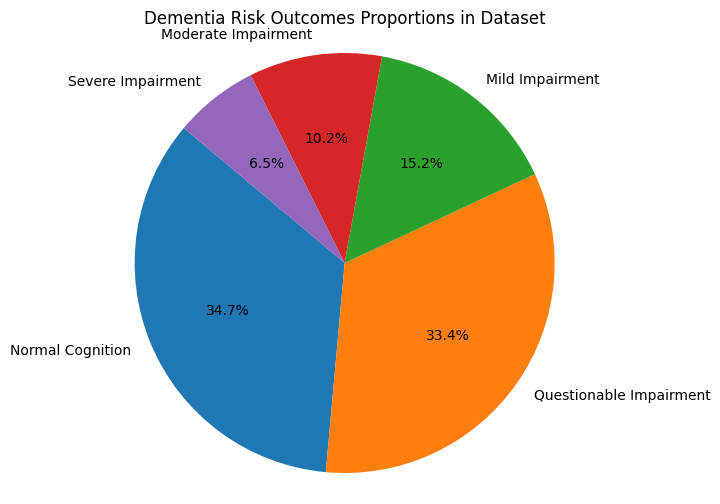

In [ ]:
class_labels = ['Normal Cognition', 'Questionable Impairment', 'Mild Impairment', 'Moderate Impairment', 'Severe Impairment']  # Replace with your actual labels
diagnosis_count = ds_nacc_subset_LV['CDRGLOB'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.pie(diagnosis_count, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Dementia Risk Outcomes Proportions in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Observation: The largest number of subjects in the dementia dataset are those already with Questionable impairment (34.7%)

In [ ]:
#task Divide Dementia Sub Categories for Further Analysis - Those who successfully Converted from Questionable Impairment to Normal Cognition
ds_nacc_subset_converted = ds_nacc_subset_LV[(ds_nacc_subset_LV['CDRGLOB']==0) & (ds_nacc_subset_LV['NACCIDEM']>0)]

data_array = ds_nacc_subset_converted['NACCID']


# Assuming 'df' is your DataFrame and 'data_array' is your 1D array containing the values for slicing

# Create a boolean mask based on the values in 'data_array'
mask = ds_nacc_subset['NACCID'].isin(data_array)

# Apply the mask to slice the DataFrame
sliced_df = ds_nacc_subset[mask]

# Display the sliced DataFrame
#sliced_df.describe()

ds_nacc_subset_converted=sliced_df


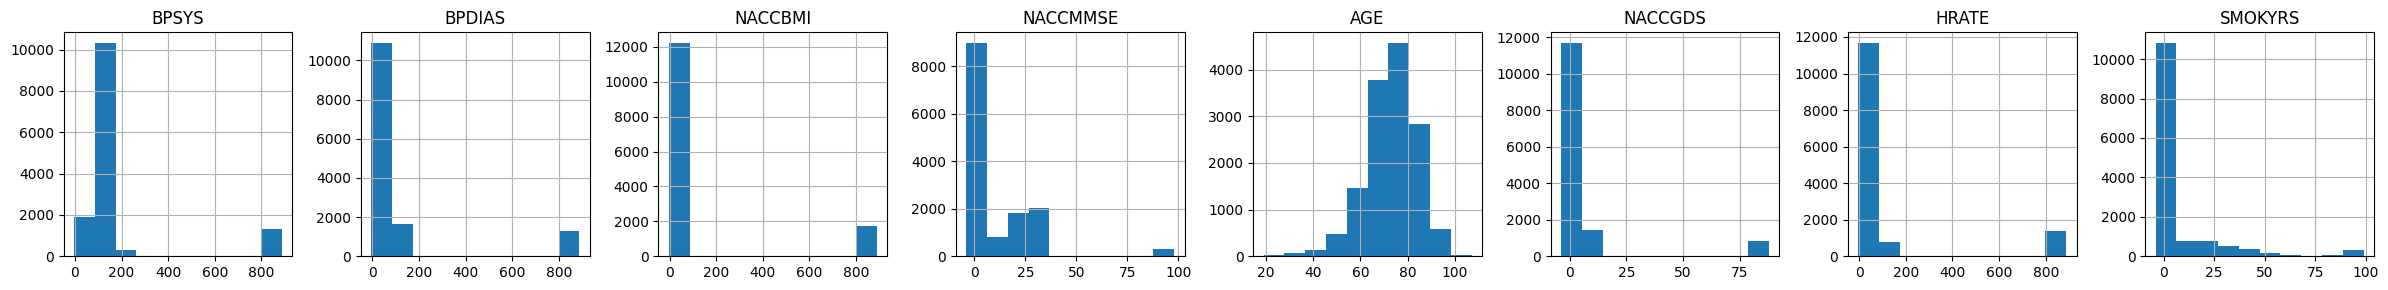

In [ ]:
features = ['BPSYS','BPDIAS','NACCBMI','NACCMMSE','AGE','NACCGDS','HRATE','SMOKYRS']

# Create a figure and axis object
fig, axes = plt.subplots(1, 8, figsize=(24, 3))  # Adjust figsize as needed

# Plot histograms for each feature
for i, feature in enumerate(features):
    ds_nacc_subset_LV[feature].hist(ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Observation: Further Deep Dive into the data indicated some subjects who had previously been diagnosed with some cognitive impairment but have now been converted to Normal Cognition during the last visit. We shall do some Descriptive Analysis on this category of subjects later as the dataset will help us identify trends that led to their Conversion.

<Axes: >

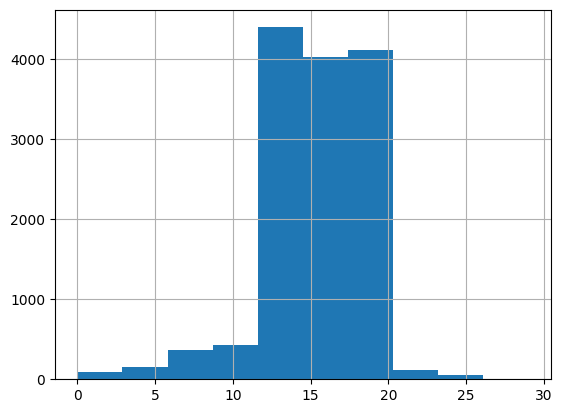

In [ ]:
ds_educ = ds_nacc_subset_LV[ds_nacc_subset_LV['EDUC']<30]
ds_educ['EDUC'].hist(bins=10)

Observation: The Number of Years Educated data shows a Normal Distribution from 0 to about less than 30 years while a large number of participants have received between 12 and 18 years of formal education. Also, there exists some outliers in the dataset. On further investigation, it was dicovered that subjects whose No of Years for completed Formal Education could not be determined were assigned a value of 99. These are outliers that need to be either removed or replaced with the mean age for better representation of the dataset
In order to balace this dataset, we

<Axes: >

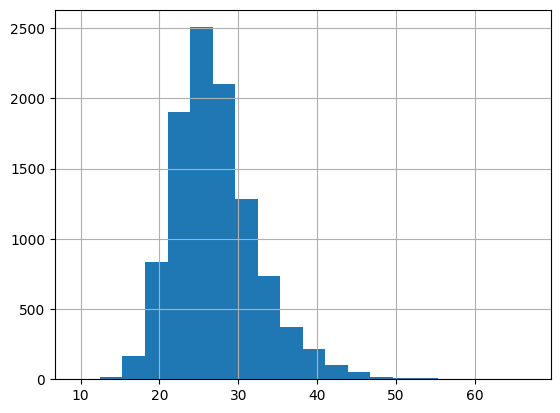

In [ ]:
ds_naccbmi = ds_nacc_subset_LV[(ds_nacc_subset_LV['NACCBMI'] < 300) & (ds_nacc_subset_LV['NACCBMI'] != -4)]
ds_naccbmi['NACCBMI'].hist(bins=20)

The BMI data appears to follow a Normal Distribution once the arbitrary values have been removed. The outliers that exist in the form of BMI values not captured and assigned arbitrary value of either (-4 or 888) are not included in this normal distribution. These are not actual values and will need to be removed/replaced to ensure proper representation.

Text(0.5, 1.0, 'Distribution of NACCGDS scores of Dementia Dataset')

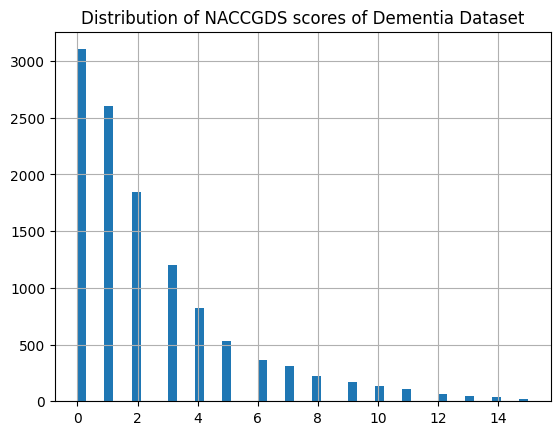

In [ ]:
ds_naccgds = ds_nacc_subset_LV[(ds_nacc_subset_LV['NACCGDS'] < 80) & (ds_nacc_subset_LV['NACCGDS'] != -4)]
ds_naccgds['NACCGDS'].hist(bins=50)
plt.title('Distribution of NACCGDS scores of Dementia Dataset')

The Distribution for the Geriatic Depression Score (NACCGDS) appears right skewed with the majority of data points lower than the median value. Also, outliers exist in the form of NACCGDS values not captured and assigned arbitrary values of either (-4 or 88). These are not actual values and will need to be removed/replaced to ensure proper representation.

Text(0.5, 1.0, 'Distribution of Mini Mental State Examination (MMSE) scores of Dementia Dataset')

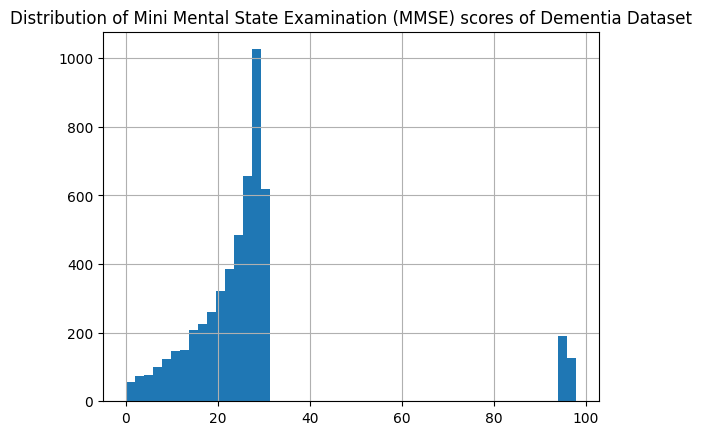

In [ ]:
ds_naccmmse = ds_nacc_subset_LV[(ds_nacc_subset_LV['NACCMMSE'] < 100) & (ds_nacc_subset_LV['NACCMMSE'] != -4)]
ds_naccmmse['NACCMMSE'].hist(bins=50)
plt.title('Distribution of Mini Mental State Examination (MMSE) scores of Dementia Dataset')

The distribution of Mini Mental State Examination (MMSE) values in this dataset follows a distribution that is left skewed and peaks at around 30, with some few hundred outlers around 90 and 95 marks

Text(0.5, 1.0, 'Age Distribution of Dementia Dataset')

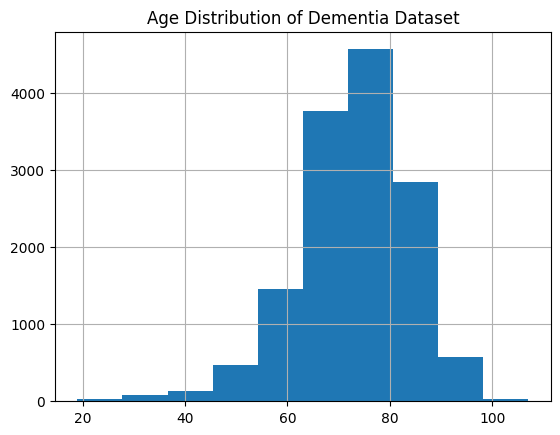

In [ ]:
ds_nacc_subset_LV['AGE'].hist()
plt.title('Age Distribution of Dementia Dataset')

Observation: The distribution of participants age follows a Normal Distribution that peaks around 70 years

Observation: The largest number of subjects in the dementia dataset are those already with Questionable impairment (34.7%)

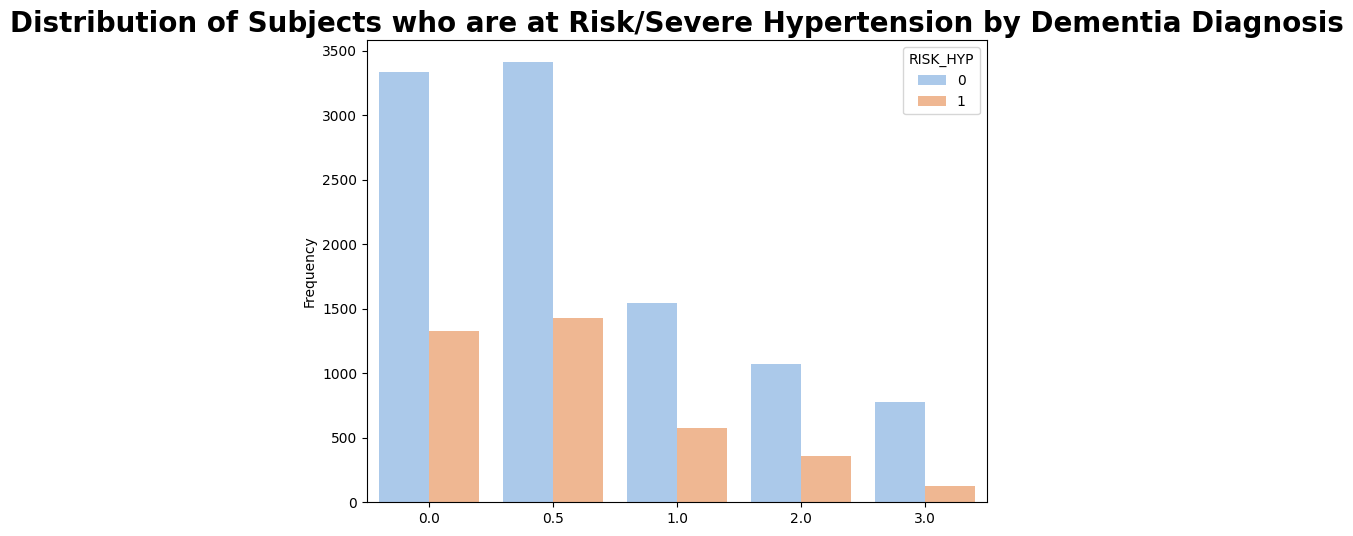

In [ ]:
ds_hxhyper = ds_nacc_subset_LV[(ds_nacc_subset_LV['RISK_HYP'] !=-4) & (ds_nacc_subset_LV['RISK_HYP'] != 9)]

plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_hxhyper, x='CDRGLOB',hue='RISK_HYP', palette='pastel')
plt.title("Distribution of Subjects who are at Risk/Severe Hypertension by Dementia Diagnosis", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

Observation:Column Clinical Dementia Rating has 5 distinct groups rated as follows:

The highest category are people with Questionable Cognitive impairment (0.5:4842). This group are the subjects of Interest in this Study because we intend to explain why they are categorized and how we can help prevent/delay MCI through modification of their risk factors so that they subsequent visits they can be categorized as Normal Cognition (0.0)

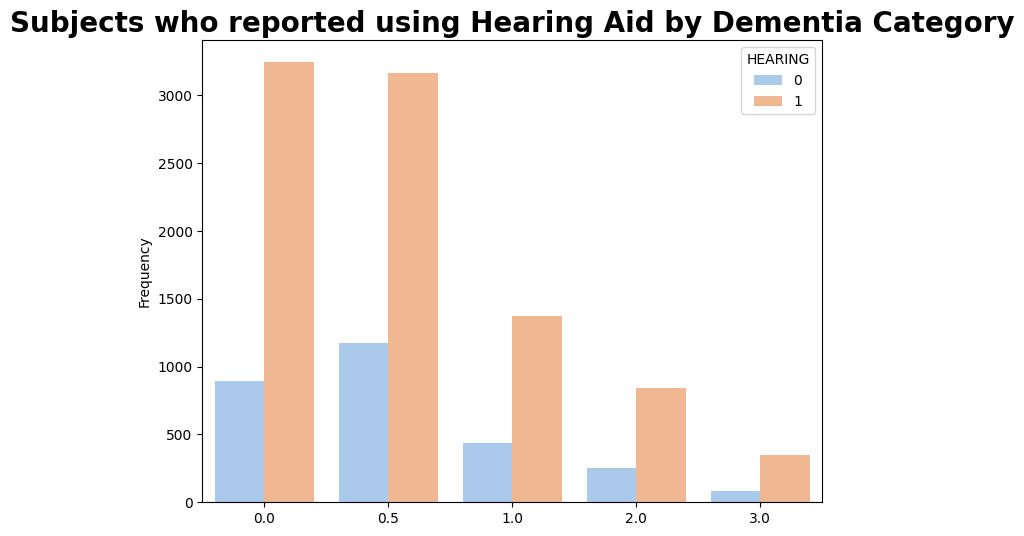

In [ ]:
ds_hearing = ds_nacc_subset_LV[(ds_nacc_subset_LV['HEARING'] !=-4) & (ds_nacc_subset_LV['HEARING'] != 9)]

plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_hearing, x='CDRGLOB',hue='HEARING', palette='pastel')
plt.title("Subjects who reported using Hearing Aid by Dementia Category", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

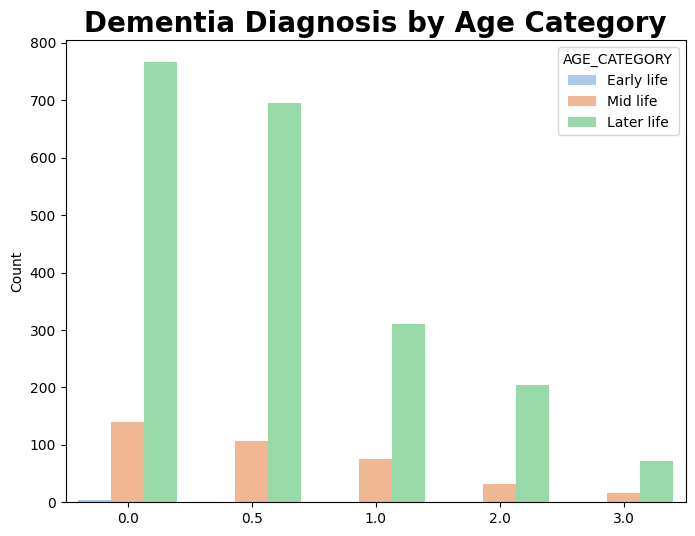

In [ ]:

plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_nacc_subset_LV, x='CDRGLOB',hue='AGE_CATEGORY', palette='pastel')
plt.title("Dementia Diagnosis by Age Category", size=20, weight='bold')
plt.ylabel ( 'Count' )
plt.xlabel ('', size = 16 )
plt.show()

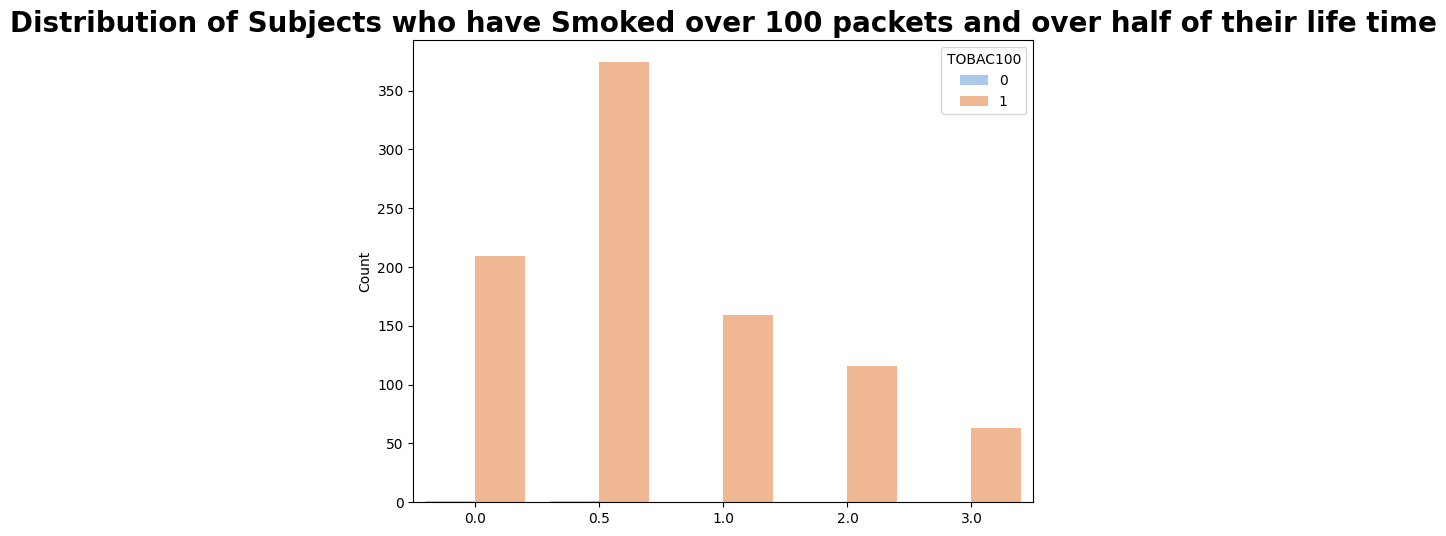

In [ ]:
#find out the proportion of those who have smoked 100 packs or more and more than half of their lives smoking
ds_highsmoking = ds_nacc_subset_LV[(ds_nacc_subset_LV['TOBAC100'] !=-4) & (ds_nacc_subset_LV['TOBAC100'] != 9)]
ds_HSMOK = ds_highsmoking[ds_highsmoking['SMOKYRS'] >= (ds_highsmoking['AGE'] / 2)]
plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_HSMOK, x='CDRGLOB',hue='TOBAC100', palette='pastel')
plt.title("Distribution of Subjects who have Smoked over 100 packets and over half of their life time", size=20, weight='bold')
plt.ylabel ( 'Count' )
plt.xlabel ('', size = 16 )
plt.show()

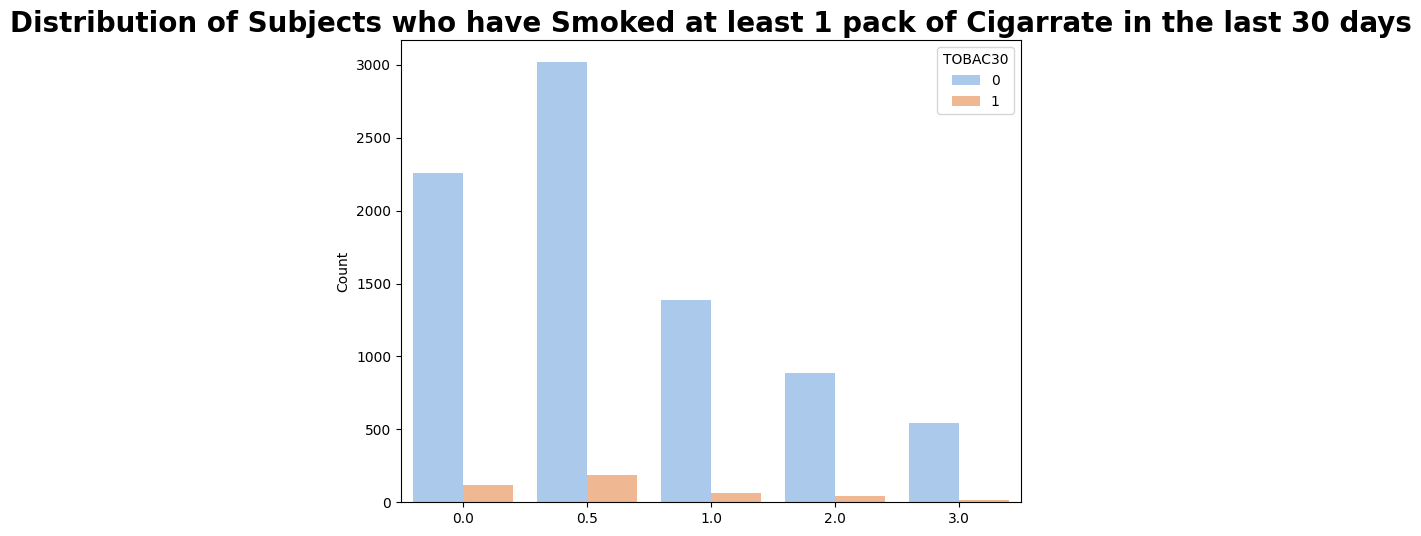

In [ ]:
#find out the proportion of those who have smoked cigrattes packs in thee last 30 days
ds_highsmoking = ds_nacc_subset_LV[(ds_nacc_subset_LV['TOBAC30'] !=-4) & (ds_nacc_subset_LV['TOBAC30'] != 9)]

plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_highsmoking, x='CDRGLOB',hue='TOBAC30', palette='pastel')
plt.title("Distribution of Subjects who have Smoked at least 1 pack of Cigarrate in the last 30 days", size=20, weight='bold')
plt.ylabel ( 'Count' )
plt.xlabel ('', size = 16 )
plt.show()

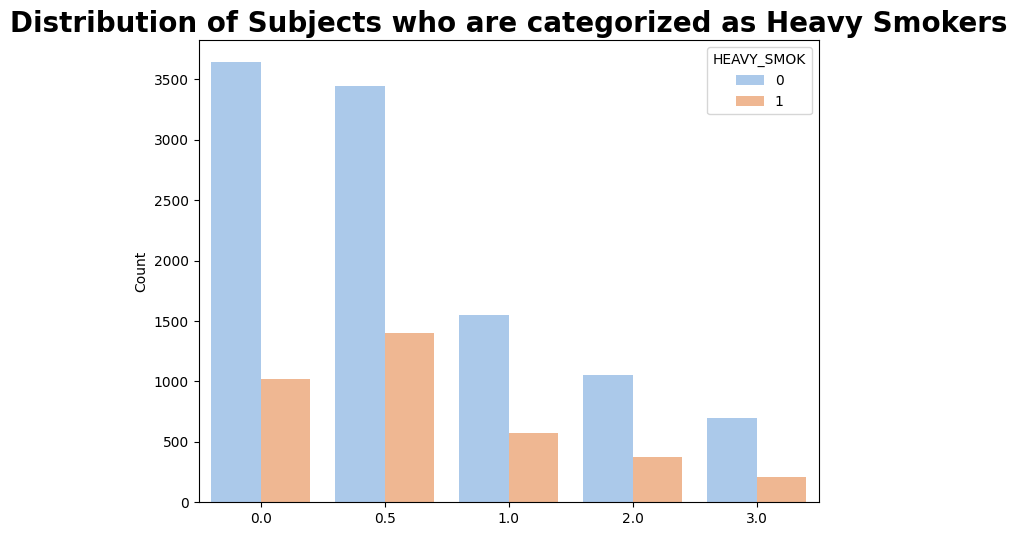

In [ ]:
#ds_highsmoking = ds_nacc_subset_LV[(ds_nacc_subset_LV['TOBAC30'] !=-4) & (ds_nacc_subset_LV['F'] != 9)]

plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_nacc_subset_LV, x='CDRGLOB',hue='HEAVY_SMOK', palette='pastel')
plt.title("Distribution of Subjects who are categorized as Heavy Smokers", size=20, weight='bold')
plt.ylabel ( 'Count' )
plt.xlabel ('', size = 16 )
plt.show()

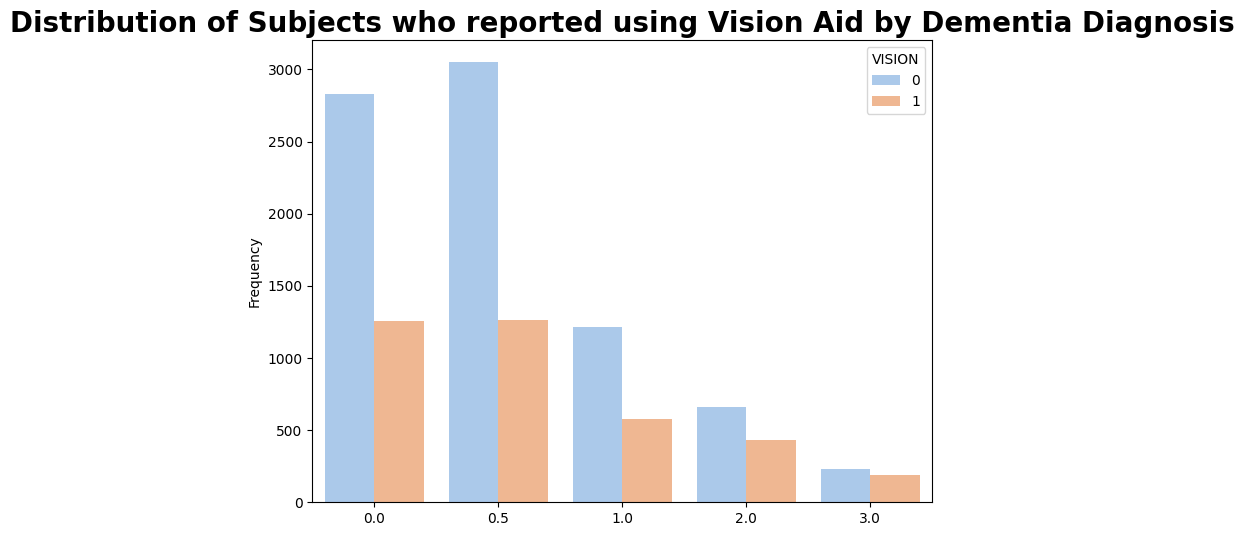

In [ ]:
ds_vision = ds_nacc_subset_LV[(ds_nacc_subset_LV['VISION'] !=-4) & (ds_nacc_subset_LV['VISION'] != 9)]
plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_vision, x='CDRGLOB',hue='VISION', palette='pastel')
plt.title("Distribution of Subjects who reported using Vision Aid by Dementia Diagnosis", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

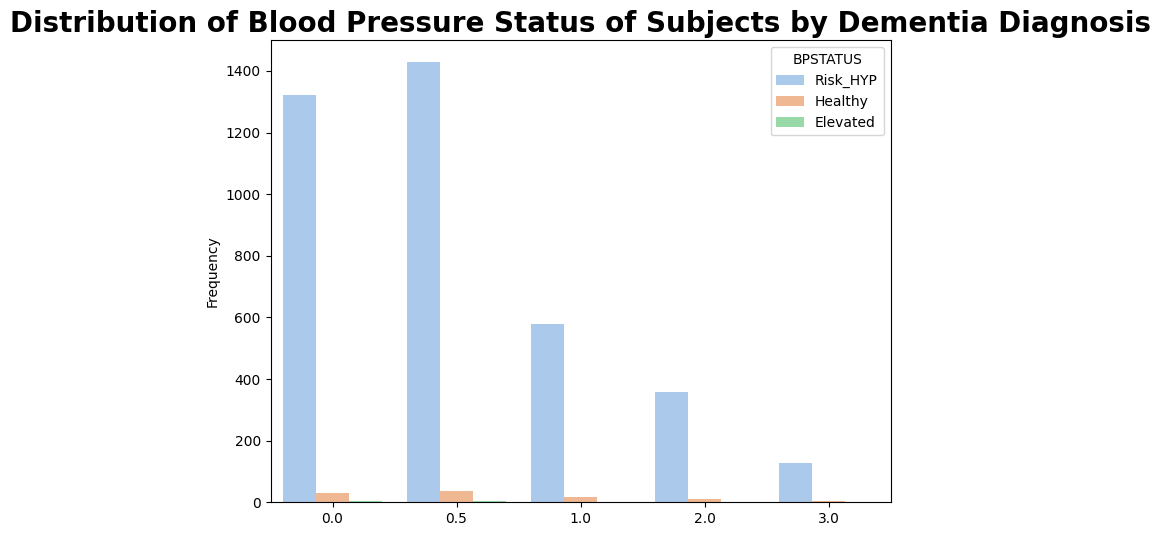

In [ ]:
plt.figure ( figsize= (8,6))
ds_bpstatus = ds_nacc_subset_LV[ds_nacc_subset_LV['BPSTATUS'] !='N/A']
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_bpstatus, x='CDRGLOB',hue='BPSTATUS', palette='pastel')
plt.title("Distribution of Blood Pressure Status of Subjects by Dementia Diagnosis", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

In [ ]:
ds_nacc_subset_LV['HRATE_CLASS']. unique()
ds_nacc_subset_LV['HRATE'].value_counts()

-4.0      1883
 888.0    1371
 60.0      688
 72.0      605
 64.0      549
          ... 
 35.0        1
 133.0       1
 119.0       1
 140.0       1
 137.0       1
Name: HRATE, Length: 90, dtype: int64

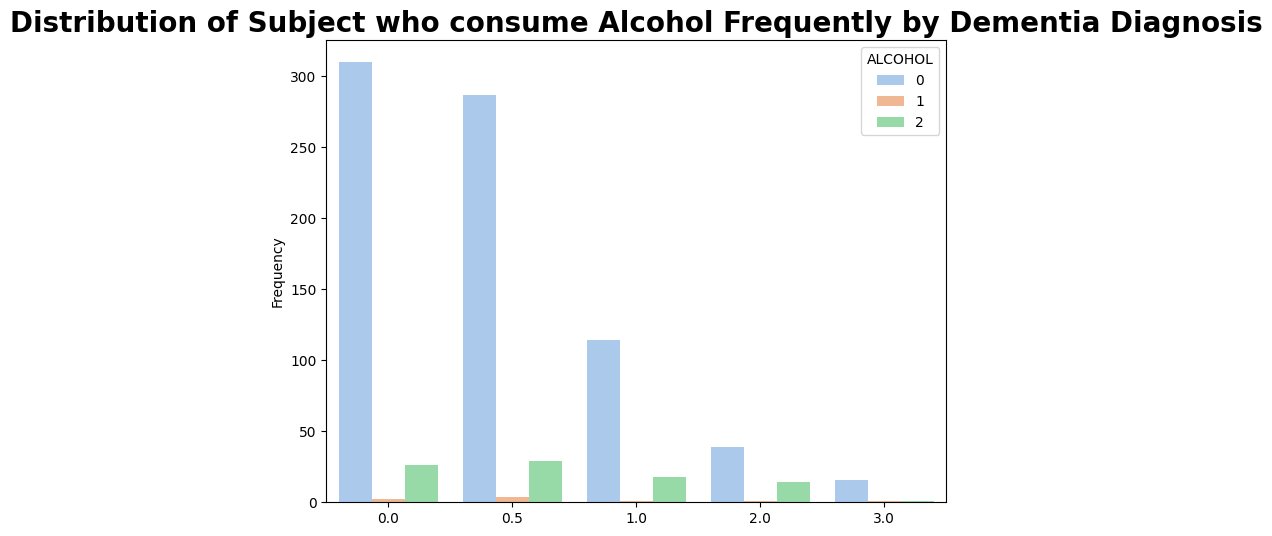

In [ ]:

plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_nacc_subset_LV, x='CDRGLOB',hue='ALCOHOL', palette='pastel')
plt.title("Distribution of Subject who consume Alcohol Frequently by Dementia Diagnosis", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

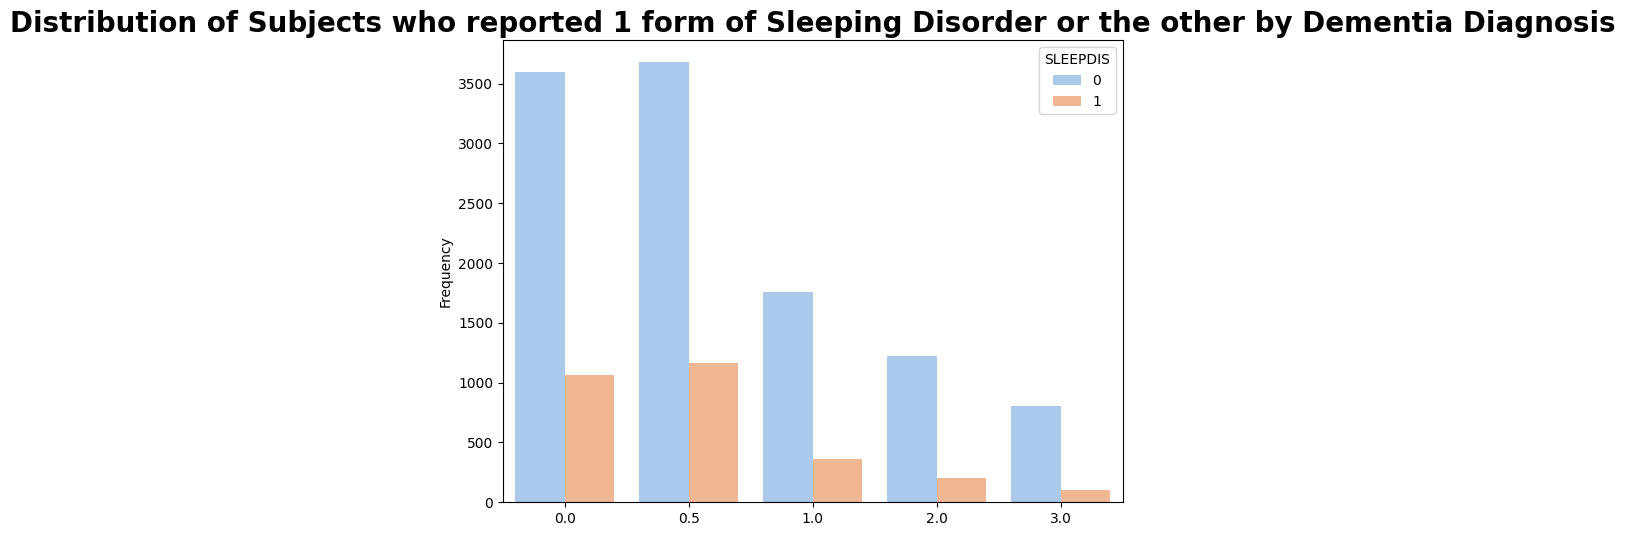

In [ ]:

plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_nacc_subset_LV, x='CDRGLOB',hue='SLEEPDIS', palette='pastel')
plt.title("Distribution of Subjects who reported 1 form of Sleeping Disorder or the other by Dementia Diagnosis", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

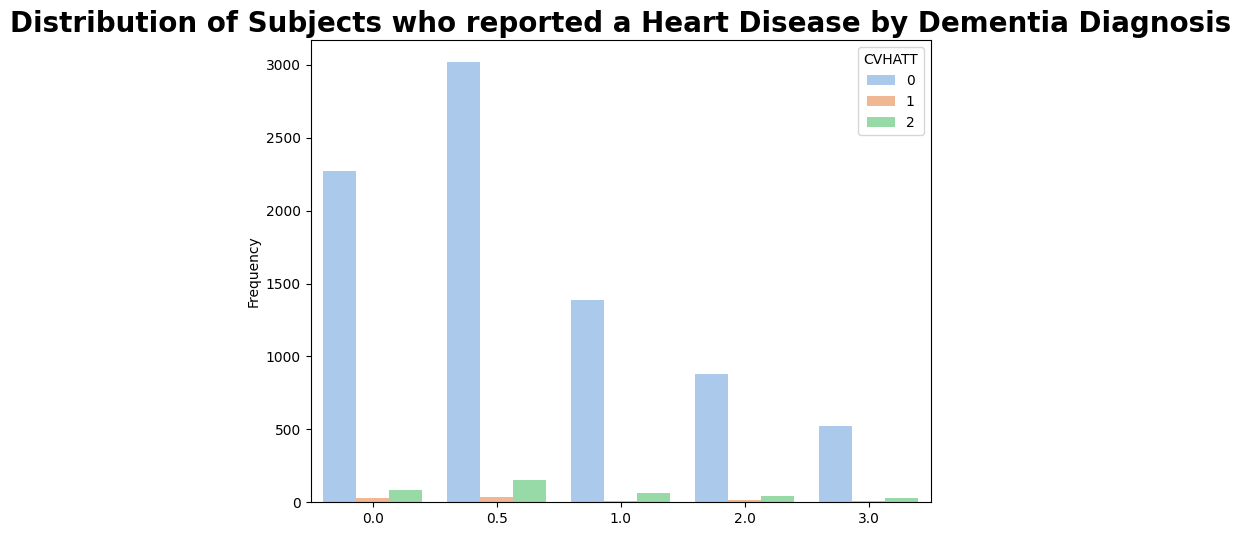

In [ ]:
plt.figure ( figsize= (8,6))
ds_cvhatt = ds_nacc_subset_LV[(ds_nacc_subset_LV['CVHATT'] !=-4) & (ds_nacc_subset_LV['CVHATT'] != 9)]
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_cvhatt, x='CDRGLOB',hue='CVHATT', palette='pastel')
plt.title("Distribution of Subjects who reported a Heart Disease by Dementia Diagnosis", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

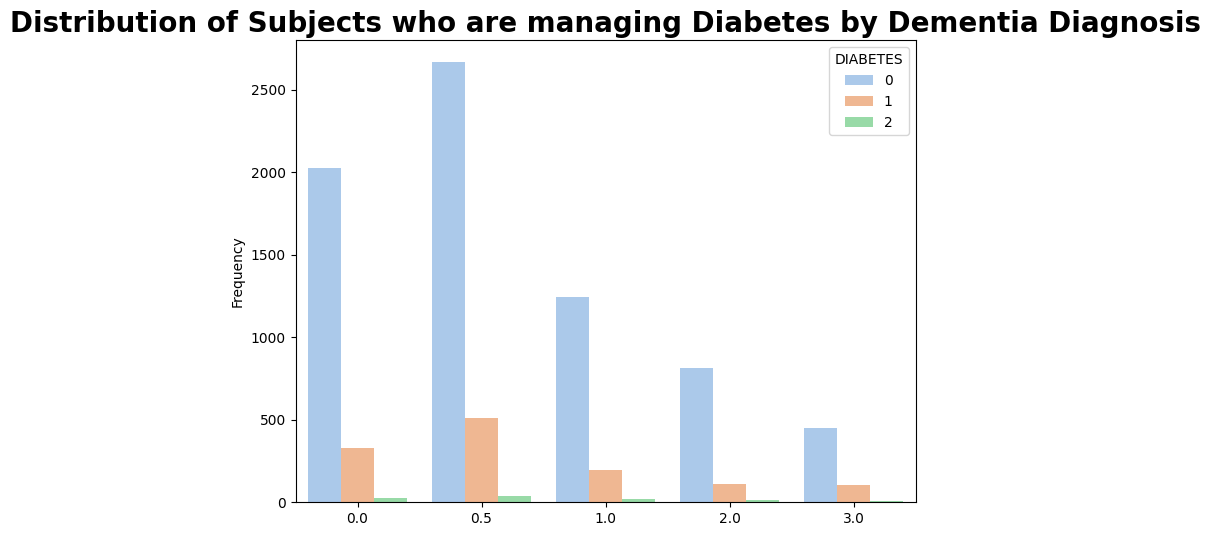

In [ ]:
plt.figure ( figsize= (8,6))
ds_diabetes = ds_nacc_subset_LV[(ds_nacc_subset_LV['DIABETES'] !=-4) & (ds_nacc_subset_LV['DIABETES'] != 9)]
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_diabetes, x='CDRGLOB',hue='DIABETES', palette='pastel')
plt.title("Distribution of Subjects who are managing Diabetes by Dementia Diagnosis", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

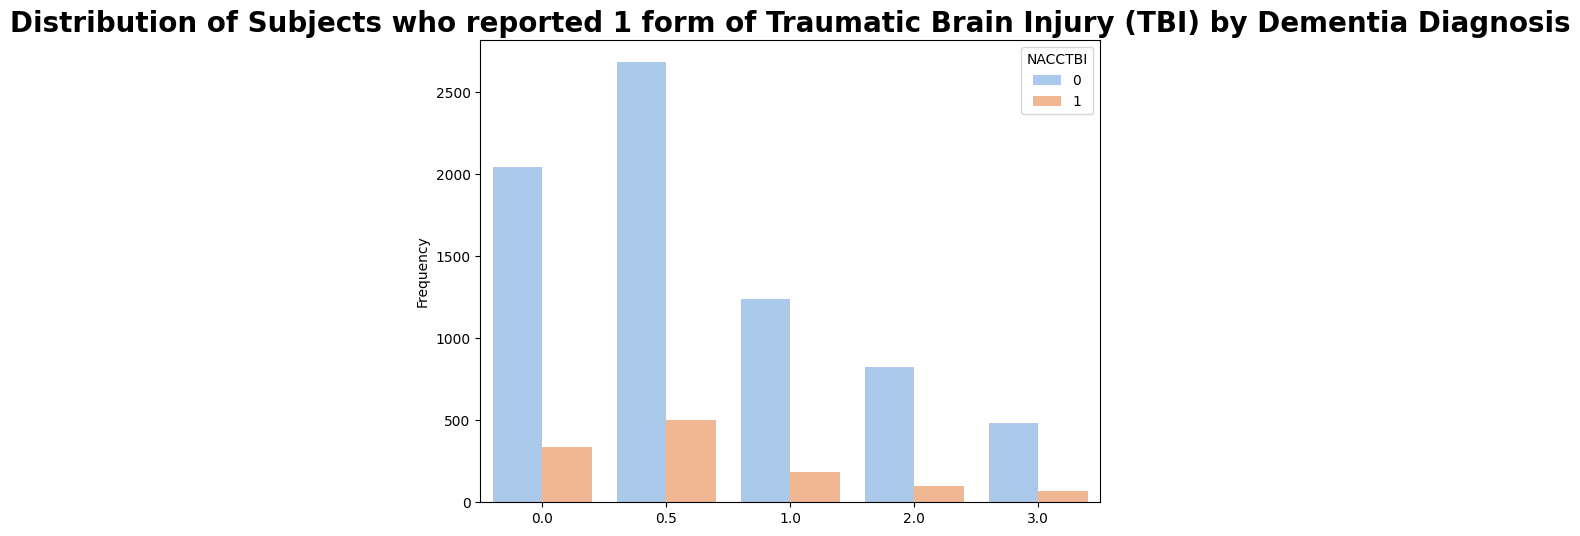

In [ ]:
ds_tbi = ds_nacc_subset_LV[(ds_nacc_subset_LV['NACCTBI'] !=-4) & (ds_nacc_subset_LV['NACCTBI'] != 9)]
plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_tbi, x='CDRGLOB',hue='NACCTBI', palette='pastel')
plt.title("Distribution of Subjects who reported 1 form of Traumatic Brain Injury (TBI) by Dementia Diagnosis", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

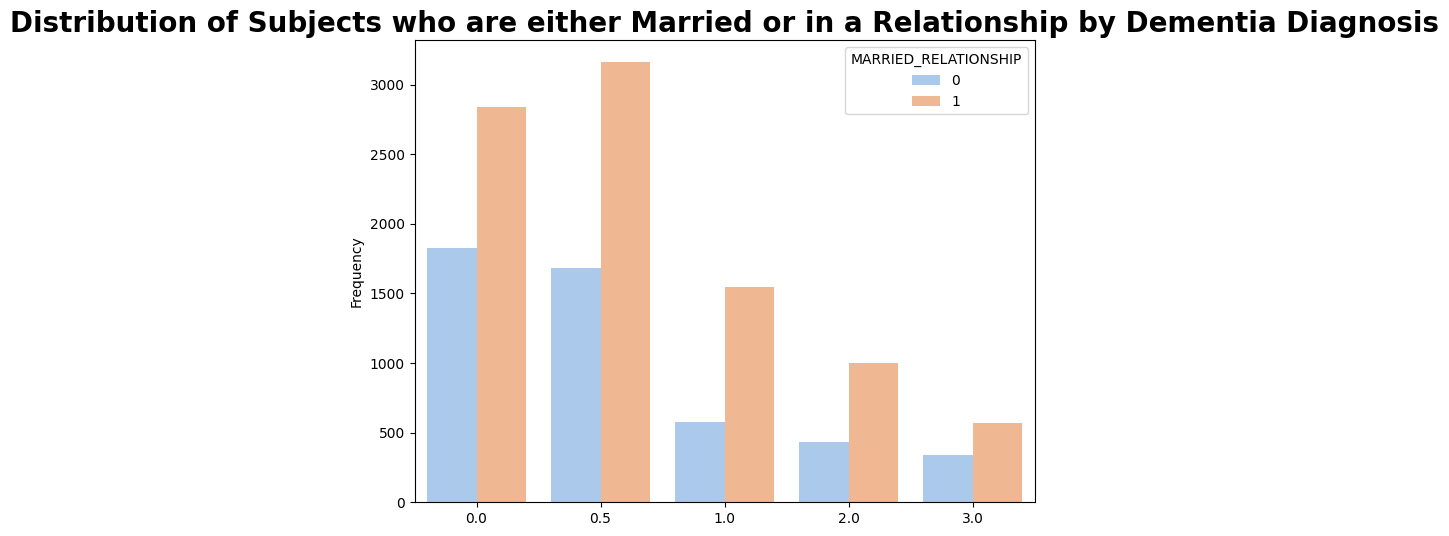

In [ ]:
plt.figure ( figsize= (8,6))
#sns.countplot(data = df_cat_MED, x='TBI', hue='CDRGLOB', palette='pastel')
sns.countplot(data=ds_nacc_subset_LV, x='CDRGLOB',hue='MARRIED_RELATIONSHIP', palette='pastel')
plt.title("Distribution of Subjects who are either Married or in a Relationship by Dementia Diagnosis", size=20, weight='bold')
plt.ylabel ( 'Frequency' )
plt.xlabel ('', size = 16 )
plt.show()

<Axes: >

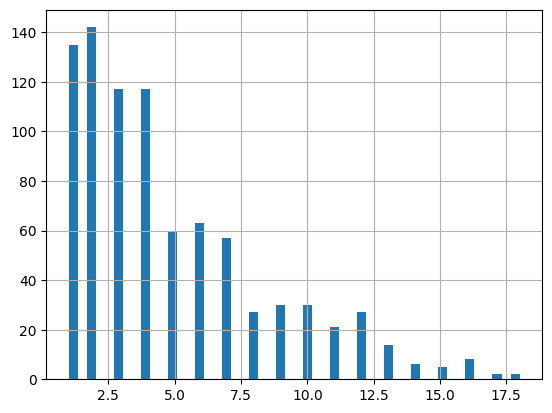

In [ ]:
ds_nacc_subset_LV['NACCAVST'].hist(bins=50)


Based on the Level 1 statistics, the following features are marked as less significant to dementia diagnosis and will be dropped as the proceed to Level 2 Descriptive Statistics.

Features to be dropped from dataset
ALCOHOL
DIABETES
TOBAC30
SMOKYRS
VISION
SLEEPDIS
SLEEPAP
NACCDIED


In [ ]:
ds_nacc_subset_L2_EDA = ds_nacc_subset_LV.drop(['AGE_CATEGORY','SLEEPDIS','QUITSMOK','NACCIDEM'],axis=1)
#ds_nacc_subset_converted_L2_EDA = ds_nacc_subset_converted.drop(['DIABETES','TOBAC30', 'NACCDIED','AGE_CATEGORY','BPSTATUS','ALCOHOL','SLEEPDIS','QUITSMOK','VISION','NACCIDEM'],axis=1)
ds_nacc_subset_L2_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13962 entries, 0 to 40700
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NACCID                13962 non-null  object 
 1   SEX                   13962 non-null  int64  
 2   NACCAVST              13962 non-null  int64  
 3   BPSYS                 13845 non-null  float64
 4   BPDIAS                13845 non-null  float64
 5   HRATE                 13845 non-null  float64
 6   HEARING               13962 non-null  int64  
 7   MARISTAT              13962 non-null  int64  
 8   NACCMMSE              13962 non-null  int64  
 9   CDRGLOB               13962 non-null  float64
 10  DIABETES              13962 non-null  int64  
 11  NACCTBI               13962 non-null  int64  
 12  NACCGDS               13962 non-null  int64  
 13  EDUC                  13962 non-null  int64  
 14  VISITYR               13962 non-null  int64  
 15  BIRTHYR               13

In [ ]:
# correlation analysis for those who converted


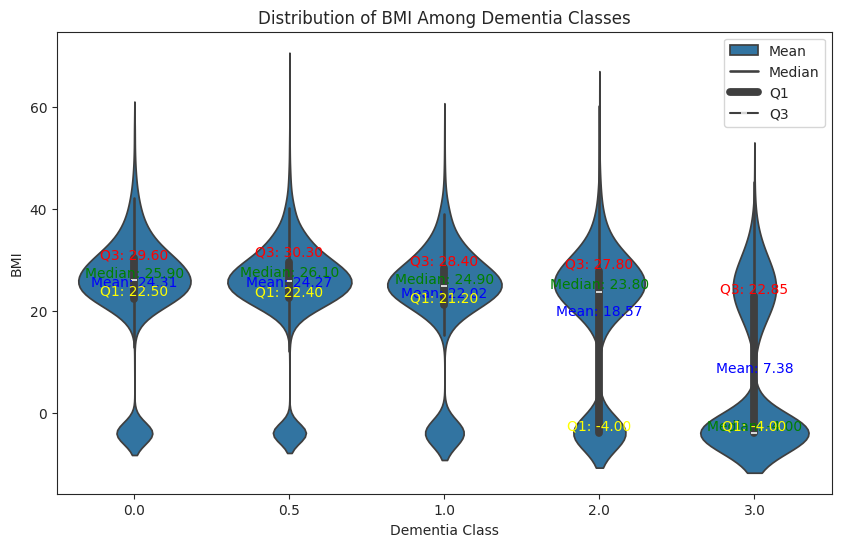

In [ ]:
# Create a box plot or violin plot to show the distribution of Body Mass Index among the Dementia Class
ds_bmi_dis = ds_nacc_subset_LV[ds_nacc_subset_LV['NACCBMI']<=200]

plt.figure(figsize=(10, 6))
sns.violinplot(x='CDRGLOB', y='NACCBMI', data=ds_bmi_dis)

for i, group_name in enumerate(ds_bmi_dis['CDRGLOB'].unique()):
    group_data = ds_bmi_dis[ds_bmi_dis['CDRGLOB'] == group_name]['NACCBMI']
    plt.text(i, np.mean(group_data), f"Mean: {np.mean(group_data):.2f}", ha='center', va='bottom', color='blue')
    plt.text(i, np.median(group_data), f"Median: {np.median(group_data):.2f}", ha='center', va='bottom', color='green')
    plt.text(i, np.percentile(group_data, 75), f"Q3: {np.percentile(group_data, 75):.2f}", ha='center', va='bottom', color='red')
    plt.text(i, np.percentile(group_data, 25), f"Q1: {np.percentile(group_data, 25):.2f}", ha='center', va='bottom', color='yellow')

# Add legend
plt.legend(['Mean', 'Median', 'Q1', 'Q3'], loc='upper right')
plt.title('Distribution of Body Mass Index (BMI) Among Dementia Classes')
plt.xlabel('Dementia Class')
plt.ylabel('BMI')
plt.show()

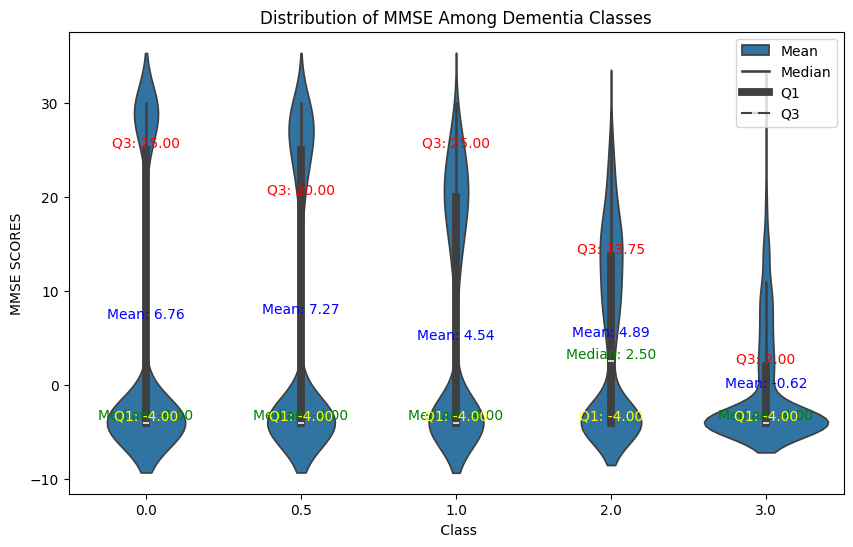

In [ ]:
ds_bmi_dis = ds_nacc_subset_LV[ds_nacc_subset_LV['NACCMMSE']<=30]

plt.figure(figsize=(10, 6))
sns.violinplot(x='CDRGLOB', y='NACCMMSE', data=ds_bmi_dis)

for i, group_name in enumerate(ds_bmi_dis['CDRGLOB'].unique()):
    group_data = ds_bmi_dis[ds_bmi_dis['CDRGLOB'] == group_name]['NACCMMSE']
    plt.text(i, np.mean(group_data), f"Mean: {np.mean(group_data):.2f}", ha='center', va='bottom', color='blue')
    plt.text(i, np.median(group_data), f"Median: {np.median(group_data):.2f}", ha='center', va='bottom', color='green')
    plt.text(i, np.percentile(group_data, 75), f"Q3: {np.percentile(group_data, 75):.2f}", ha='center', va='bottom', color='red')
    plt.text(i, np.percentile(group_data, 25), f"Q1: {np.percentile(group_data, 25):.2f}", ha='center', va='bottom', color='yellow')

# Add legend
plt.legend(['Mean', 'Median', 'Q1', 'Q3'], loc='upper right')
plt.title('Distribution of MMSE Scores Among Dementia Classes')
plt.xlabel(' Class')
plt.ylabel('MMSE SCORES')
plt.show()

In [ ]:
#HEARING, DIABETES, NACCTBI NACCIDEM, TOBAC30, TOBAC100, VISION, CVHATT, SLEEPAP, HYPOSOM, SLEEPOTH


columns_subset = ['HEARING', 'DIABETES', 'NACCTBI','TOBAC30','TOBAC100','VISION','CVHATT','SLEEPAP','HYPOSOM','SLEEPOTH','ALCOHOL']  # Define your subset of columns

for col in columns_subset:

    ds_test =ds_nacc_subset_L2_EDA[[col]]


    modes= ds_test[col].mode().iloc[0]
    #modes = df[columns_with_missing_values].mode().iloc[0]
    ds_test.replace(-4,modes, inplace=True)
    ds_test.replace(8, modes, inplace=True)
    ds_test.replace(9, modes, inplace=True)
    ds_test.fillna(modes, inplace=True)

    k = 100  # Number of neighbors to consider
    #imputer = KNNImputer(n_neighbors=k)

# Fit the imputer and transform the dataset
    #imputed_data = pd.DataFrame(imputer.fit_transform(ds_test))
    ds_nacc_subset_L2_EDA[[col]] = ds_test

    # Replace -4 with None



<ipython-input-39-e34430badff6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_test.replace(-4,modes, inplace=True)
<ipython-input-39-e34430badff6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_test.replace(8, modes, inplace=True)
<ipython-input-39-e34430badff6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_test.replace(9, modes, inplace=True)
<ipython-input-39-e34430badff6>:16: SettingWithCopyWarning: 
A value is t

In [ ]:
ds_nacc_subset_L2_EDA[columns_subset].describe()

,HEARING,DIABETES,NACCTBI,TOBAC30,TOBAC100,VISION,CVHATT,SLEEPAP,HYPOSOM,SLEEPOTH,ALCOHOL
count,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000
mean,0.796806,0.103638,0.084587,0.031013,-1.326887,0.265936,0.060235,0.123478,0.094399,0.020484,0.076565
std,0.402390,0.327897,0.278276,0.173358,2.195777,0.441846,0.331515,0.328997,0.292394,0.141655,0.374607
min,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
# replacing the missing and arbitrary data entered in the continous variables BPSYS, BPDIAS, HRATE NACCGDS, NACCBMI using mean
columns_subset = ['NACCMMSE', 'BPSYS', 'BPDIAS', 'HRATE','NACCGDS','NACCBMI']  # Define your subset of columns

for col in columns_subset:
    ds_normal_cog = ds_nacc_subset_LV[ds_nacc_subset_LV['CDRGLOB'] == 0.0][col]
    ds_ques = ds_nacc_subset_L2_EDA[ds_nacc_subset_L2_EDA['CDRGLOB'] == 0.5][col]
    ds_mild = ds_nacc_subset_L2_EDA[ds_nacc_subset_L2_EDA['CDRGLOB'] == 1.0][col]
    ds_mod = ds_nacc_subset_L2_EDA[ds_nacc_subset_L2_EDA['CDRGLOB'] == 2.0][col]
    ds_sev = ds_nacc_subset_L2_EDA[ds_nacc_subset_L2_EDA['CDRGLOB'] == 3.0][col]

    column_mean1 = ds_normal_cog[(ds_normal_cog < 700) & (ds_normal_cog != -4)].mean()
    column_mean2 = ds_ques[(ds_ques < 700) & (ds_ques != -4)].mean()
    column_mean3 = ds_mild[(ds_mild < 700) & (ds_mild != -4)].mean()
    column_mean4 = ds_mod[(ds_mod < 700) & (ds_mod != -4)].mean()
    column_mean5 = ds_sev[(ds_sev < 700) & (ds_sev != -4)].mean()
    # Replace -4 with None

    ds_normal_cog.replace(-4, column_mean1, inplace=True)
    ds_ques.replace(-4, column_mean2, inplace=True)
    ds_mild.replace(-4, column_mean3, inplace=True)
    ds_mod.replace(-4, column_mean4, inplace=True)
    ds_sev.replace(-4, column_mean5, inplace=True)

    ds_normal_cog.replace(888, column_mean1, inplace=True)
    ds_ques.replace(888, column_mean2, inplace=True)
    ds_mild.replace(888, column_mean3, inplace=True)
    ds_mod.replace(888, column_mean4, inplace=True)
    ds_sev.replace(888, column_mean5, inplace=True)

    ds_normal_cog.replace(777, column_mean1, inplace=True)
    ds_ques.replace(777, column_mean2, inplace=True)
    ds_mild.replace(777, column_mean3, inplace=True)
    ds_mod.replace(777, column_mean4, inplace=True)
    ds_sev.replace(777, column_mean5, inplace=True)

    ds_normal_cog.replace(888.8, column_mean1, inplace=True)
    ds_ques.replace(888.8, column_mean2, inplace=True)
    ds_mild.replace(888.8, column_mean3, inplace=True)
    ds_mod.replace(888.8, column_mean4, inplace=True)
    ds_sev.replace(888.8, column_mean5, inplace=True)

    # Calculate mean of each subset


    # Fill NaN values with mean values
    ds_normal_cog.fillna(column_mean1, inplace=True)
    ds_ques.fillna(column_mean2, inplace=True)
    ds_mild.fillna(column_mean3, inplace=True)
    ds_mod.fillna(column_mean4, inplace=True)
    ds_sev.fillna(column_mean5, inplace=True)

    ds_nacc_subset_L2_EDA.loc[ds_nacc_subset_L2_EDA['CDRGLOB'] == 0.0, col] = ds_normal_cog
    ds_nacc_subset_L2_EDA.loc[ds_nacc_subset_L2_EDA['CDRGLOB'] == 0.5, col] = ds_ques
    ds_nacc_subset_L2_EDA.loc[ds_nacc_subset_L2_EDA['CDRGLOB'] == 1.0, col] = ds_mild
    ds_nacc_subset_L2_EDA.loc[ds_nacc_subset_L2_EDA['CDRGLOB'] == 2.0, col] = ds_mod
    ds_nacc_subset_L2_EDA.loc[ds_nacc_subset_L2_EDA['CDRGLOB'] == 3.0, col] = ds_sev

In [ ]:
ds_nacc_subset_L2_EDA[columns_subset].describe()

,NACCMMSE,BPSYS,BPDIAS,HRATE,NACCGDS,NACCBMI
count,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000
mean,27.720896,134.225239,75.222360,68.899719,10.042735,27.075153
std,12.324497,16.851937,9.422386,10.031935,22.309156,4.721008
min,0.000000,72.000000,30.000000,34.000000,0.000000,9.600000
25%,22.000000,125.000000,70.000000,63.000000,1.000000,24.500000
50%,27.639509,134.107614,75.644141,68.557718,2.000000,26.523794
75%,30.923138,141.000000,80.000000,72.356589,5.000000,28.600000
max,98.000000,227.000000,138.000000,160.000000,88.000000,66.800000


In [ ]:
ds_final_dementia = ds_nacc_subset_L2_EDA.drop(['MARISTAT','VISITYR','BIRTHYR','HEAVY_SMOK','AGE_CATEGORY','RISK_HYP'], axis=1)

ds_final_dementia.to_csv('ds_nacc_dementia_data_EDA_L2.csv', index=False)

ds_final_dementia.shape

(13962, 28)

Observation: All missing  values have now been taken of in the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
#from sklearn.cross_validation import cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelBinarizer
#from sklearn.grid_search import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

ds_nacc_subset_L2_EDA = pd.read_csv ('ds_nacc_dementia_data_EDA_L2.csv',low_memory = False)

ds_nacc_subset_L2_EDA.head()

,NACCID,SEX,NACCAVST,BPSYS,BPDIAS,HRATE,HEARING,NACCMMSE,CDRGLOB,DIABETES,...,ALCOHOL,NACCBMI,VISION,CVHATT,SLEEPAP,HYPOSOM,SLEEPOTH,AGE,SLEEPDIS,MARRIED_RELATIONSHIP
0,NACC002909,1,1,160.000000,85.000000,59.000000,1,7.709624,0.5,0,...,0,32.400000,0,0,0.0,1.0,0.0,70,1,1
1,NACC004352,2,1,191.228504,144.576247,144.392399,1,8.537011,1.0,0,...,9,43.759825,1,0,0.0,0.0,0.0,63,0,1
2,NACC004687,1,1,148.000000,75.000000,70.000000,0,5.453668,0.0,0,...,0,19.000000,0,0,0.0,0.0,0.0,77,0,0
3,NACC007213,2,1,139.000000,46.000000,52.000000,0,7.709624,0.5,0,...,0,22.100000,0,1,0.0,1.0,0.0,81,1,0
4,NACC008514,1,1,117.000000,60.000000,66.000000,0,7.709624,0.5,0,...,0,28.900000,0,0,0.0,0.0,0.0,86,0,1


In [ ]:
#Correlation Analysis
df=ds_nacc_subset_L2_EDA.drop(['NACCID'], axis=1)

correlation_matrix = df.corr()
target_variable = correlation_matrix['CDRGLOB']
significant_features = target_variable.abs().sort_values(ascending=False)
#significant_features.to_csv('significant_attributes.csv', header=True)
print(significant_features)

CDRGLOB                 1.000000
NACCGDS                 0.497468
NACCBMI                 0.441270
NACCIDEM                0.163486
NACCMMSE                0.149593
BPSYS                   0.122719
AGE                     0.107942
SLEEPDIS                0.094213
ALCOHOL                 0.085676
HRATE                   0.081001
QUITSMOK                0.073782
SLEEPAP                 0.071181
HYPOSOM                 0.065567
SMOKYRS                 0.063084
SEX                     0.059983
HEARING                 0.059885
TOBAC100                0.058630
MARRIED_RELATIONSHIP    0.039992
DIABETES                0.027498
CVHATT                  0.023569
BPDIAS                  0.021110
EDUC                    0.019714
NACCAVST                0.016465
VISION                  0.013314
TOBAC30                 0.012745
NACCTBI                 0.009877
SLEEPOTH                0.000818
Name: CDRGLOB, dtype: float64


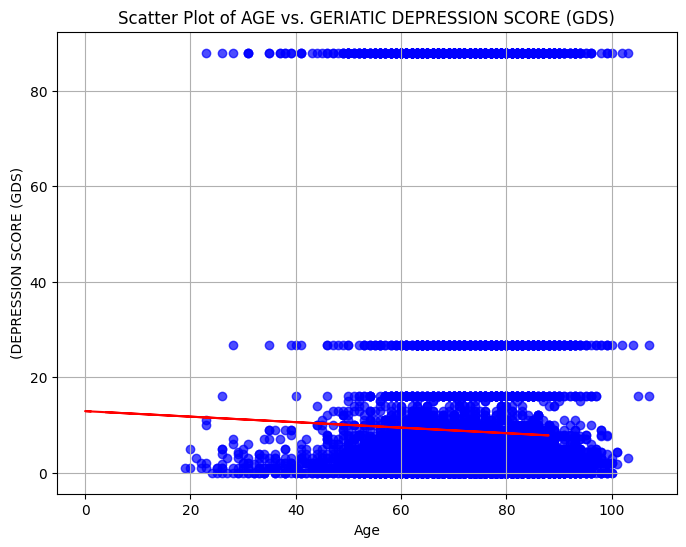

In [ ]:
coefficients = np.polyfit(ds_nacc_subset_L2_EDA['AGE'], ds_nacc_subset_L2_EDA['NACCGDS'], 1)
polynomial = np.poly1d(coefficients)
plt.figure(figsize=(8, 6))
plt.scatter(ds_nacc_subset_L2_EDA['AGE'], ds_nacc_subset_L2_EDA['NACCGDS'], color='blue', alpha=0.7)
#plt.scatter(BPSYS_values_with_noise, MMSE_scores_with_noise, alpha=0.5, color='blue', label='Data Points')

# Plot the trend line
plt.plot(ds_nacc_subset_L2_EDA['NACCGDS'], polynomial(ds_nacc_subset_L2_EDA['NACCGDS']), color='red', label='Trend Line')

plt.title('Scatter Plot of AGE vs. GERIATIC DEPRESSION SCORE (GDS)')
plt.ylabel('(DEPRESSION SCORE (GDS)')
plt.xlabel('Age')
plt.grid(True)
plt.show()

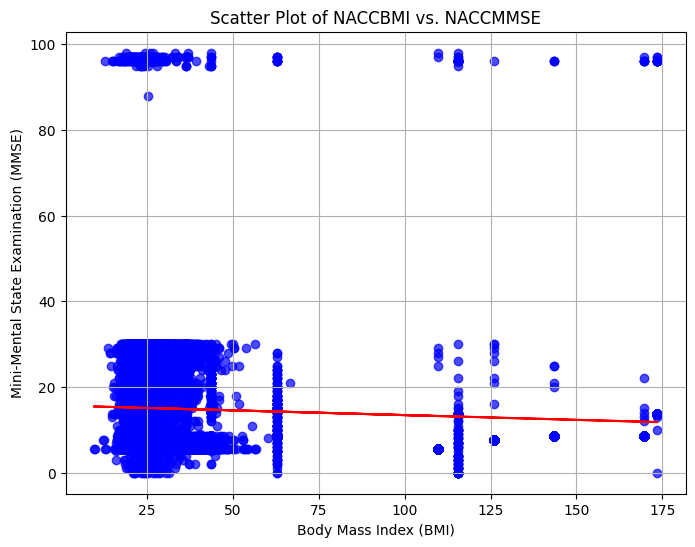

In [ ]:
coefficients = np.polyfit(ds_nacc_subset_L2_EDA['NACCBMI'], ds_nacc_subset_L2_EDA['NACCMMSE'], 1)
polynomial = np.poly1d(coefficients)
plt.figure(figsize=(8, 6))
plt.scatter(ds_nacc_subset_L2_EDA['NACCBMI'], ds_nacc_subset_L2_EDA['NACCMMSE'], color='blue', alpha=0.7)
#plt.scatter(BPSYS_values_with_noise, MMSE_scores_with_noise, alpha=0.5, color='blue', label='Data Points')

# Plot the trend line
plt.plot(ds_nacc_subset_L2_EDA['NACCBMI'], polynomial(ds_nacc_subset_L2_EDA['NACCBMI']), color='red', label='Trend Line')

plt.title('Scatter Plot of NACCBMI vs. NACCMMSE')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Mini-Mental State Examination (MMSE)')
plt.grid(True)
plt.show()



Pearson Standard Correlation Coefficient Matrix
             BPSYS    BPDIAS     HRATE  NACCMMSE   NACCGDS   NACCBMI  \
BPSYS     1.000000  0.827938  0.692128 -0.159178 -0.072816  0.313990   
BPDIAS    0.827938  1.000000  0.872319 -0.163473  0.010104  0.540696   
HRATE     0.692128  0.872319  1.000000 -0.126381  0.052588  0.562725   
NACCMMSE -0.159178 -0.163473 -0.126381  1.000000  0.201191 -0.060695   
NACCGDS  -0.072816  0.010104  0.052588  0.201191  1.000000  0.198499   
NACCBMI   0.313990  0.540696  0.562725 -0.060695  0.198499  1.000000   
AGE       0.039906 -0.073964 -0.029235  0.020619 -0.030905  0.066609   
EDUC      0.042596  0.061282  0.049675 -0.013288  0.020703  0.028815   
SMOKYRS  -0.087543 -0.114853 -0.090643  0.174894  0.055612 -0.112256   

               AGE      EDUC   SMOKYRS  
BPSYS     0.039906  0.042596 -0.087543  
BPDIAS   -0.073964  0.061282 -0.114853  
HRATE    -0.029235  0.049675 -0.090643  
NACCMMSE  0.020619 -0.013288  0.174894  
NACCGDS  -0.030905  0.02

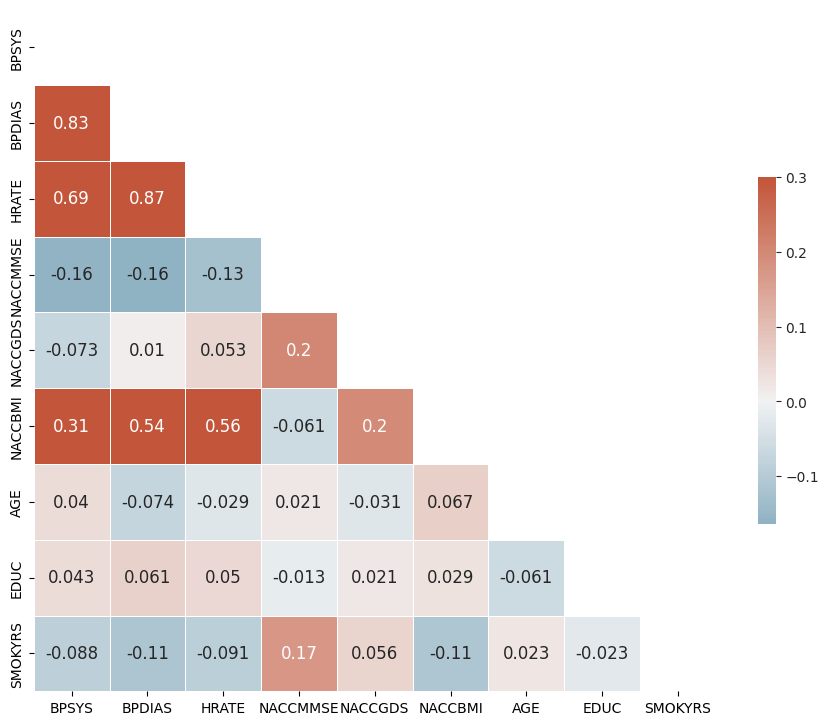

In [ ]:
df = pd.DataFrame(ds_nacc_subset_L2_EDA, columns= ['BPSYS', 'BPDIAS', 'HRATE', 'NACCMMSE', 'NACCGDS', 'NACCBMI', 'AGE', 'EDUC','SMOKYRS'])
#print (df)


#create a correlation matrix for all the column sets except the target variable
correlation = df.corr()
print("\n")
print("Pearson Standard Correlation Coefficient Matrix")
print(correlation)
print("\n")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))


#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Set up a seaborn heatmap
#seaborne aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Turn on annotations for correlation values
#annot = True
#annot_kws = {"size": 12}
# annotations shows additional information that associates with rows or columns in the heatmap (more like metadata).

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot = True, annot_kws = {"size": 12})

#Add ticks for labels
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Export heatmap as an image
heatmap.get_figure().savefig('heatmap_dementia_risk_factors.png', bbox_inches='tight')


<ipython-input-16-b4d631628902>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Normal','Questionable','Mild Imp','Moderate Imp','Severe Imp'], y=data, palette=colors)


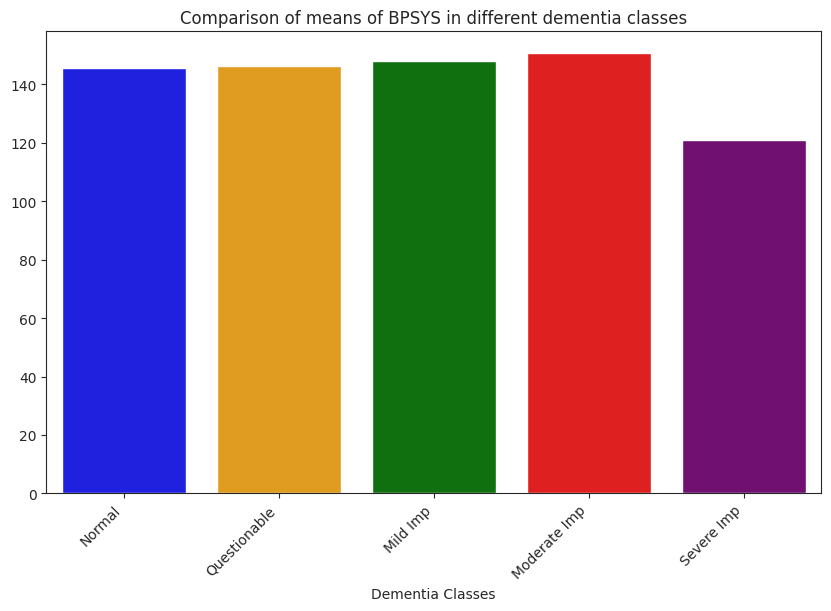

One-way ANOVA results:
F-statistic: 190.71
p-value: 0.0000


In [ ]:
from scipy.stats import f_oneway

# Example dataset with three groups
bpsys_normal_cog = ds_nacc_subset_L2_EDA[ds_nacc_subset_L2_EDA['CDRGLOB'] == 0.0]['BPSYS']
bpsys_ques_cog = ds_nacc_subset_L2_EDA[ds_nacc_subset_L2_EDA['CDRGLOB'] == 0.5]['BPSYS']
bpsys_mild_imp = ds_nacc_subset_L2_EDA[ds_nacc_subset_L2_EDA['CDRGLOB'] == 1.0]['BPSYS']
bpsys_mod_imp = ds_nacc_subset_L2_EDA[ds_nacc_subset_L2_EDA['CDRGLOB'] == 2.0]['BPSYS']
bpsys_sev_imp = ds_nacc_subset_L2_EDA[ds_nacc_subset_L2_EDA['CDRGLOB'] == 3.0]['BPSYS']

data = [bpsys_normal_cog.mean(),bpsys_ques_cog.mean(),bpsys_mild_imp.mean(),bpsys_mod_imp.mean(),bpsys_sev_imp.mean()]
colors = ['blue', 'orange', 'green', 'red', 'purple']  # Example list of colors

plt.figure(figsize=(10, 6))
plt.title('Comparison of means of BPSYS values in different Dementia classes')
plt.xlabel('Dementia Classes')
plt.xticks(rotation=45, ha='right', position=(0,0.0005))
sns.barplot(x=['Normal','Questionable','Mild Imp','Moderate Imp','Severe Imp'], y=data, palette=colors)


plt.show()

f_statistic, p_value = f_oneway(bpsys_normal_cog,bpsys_ques_cog,bpsys_mild_imp,bpsys_mod_imp,bpsys_sev_imp)

# Print results
#print("One-way ANOVA results:")
#print("F-statistic: = {g} ", .format(f_statistic))
#print("p-value:", p_value)
result = f"One-way ANOVA results:\nF-statistic: {f_statistic:.2f}\np-value: {p_value:.4f}"
print(result)
#df = pd.DataFrame(data)

# Perform one-way ANOVA for each group

# Print results
#print("One-way ANOVA results:")
#print("F-statistic:", f_statistic)
#print("p-value:", p_value)

In [ ]:
import scipy.stats as stats
groupby_attr = ds_nacc_subset_L2_EDA.groupby(["CVHATT", "CDRGLOB"]).size()
print(groupby_attr)
print("\n")

crosstab = pd.crosstab(ds_nacc_subset_L2_EDA["CVHATT"], ds_nacc_subset_L2_EDA["CDRGLOB"])
print(crosstab)
print("\n")

w, x, y, z = stats.chi2_contingency(crosstab)
print("The Chi Square value is:", w)
print("The pvalue is:", x)
print("The value for degree of freedom is :", y)
print("Expected cell counts is:", z)
print("\n")


CVHATT  CDRGLOB
0       0.0        4551
        0.5        4652
        1.0        2046
        2.0        1372
        3.0         872
1       0.0          27
        0.5          37
        1.0          12
        2.0          13
        3.0           8
2       0.0          84
        0.5         153
        1.0          63
        2.0          45
        3.0          27
dtype: int64


CDRGLOB   0.0   0.5   1.0   2.0  3.0
CVHATT                              
0        4551  4652  2046  1372  872
1          27    37    12    13    8
2          84   153    63    45   27


The Chi Square value is: 23.674331395022687
The pvalue is: 0.0025982359915630447
The value for degree of freedom is : 8
Expected cell counts is: [[4505.39793726 4679.35152557 2049.7531156  1381.96461825  876.53280332]
 [  32.38891276   33.63944994   14.73549635    9.93482309    6.30131786]
 [ 124.21314998  129.0090245    56.51138805   38.10055866   24.16587881]]




In [ ]:
def incidence_dementia(colvar1):

 if colvar1 in [0.5,1.0,2.0, 3.0]:
        return 1
 else:
        return 0


ds_nacc_subset_L2_EDA['INCIDENCE_DEMENTIA'] = ds_nacc_subset_L2_EDA['CDRGLOB'].apply(incidence_dementia)

ds_nacc_subset_L2_EDA['INCIDENCE_DEMENTIA'].value_counts()

1    9300
0    4662
Name: INCIDENCE_DEMENTIA, dtype: int64

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

groupby_attr = ds_nacc_subset_L2_EDA.groupby(["DIABETES", "INCIDENCE_DEMENTIA"]).size()
#print(groupby_attr)
#print("\n")

crosstab = pd.crosstab(ds_nacc_subset_L2_EDA["DIABETES"], ds_nacc_subset_L2_EDA["INCIDENCE_DEMENTIA"])
print(crosstab)
print("\n")

w, x, y, z = stats.chi2_contingency(crosstab)



def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    return v

# Example usage
contingency_table = z


#print("The Chi Square value is: {w:.4f}".format(w))
print("The Chi Square value is: {:.4f}".format(w))
print("The pvalue is:{:.4f}" .format(x))
print("The value for degree of freedom is:", y)
print("Expected cell counts is:", z)
print("\n")

cramers_v_value = cramers_v(contingency_table)
print("Cramer's V:", cramers_v_value)

INCIDENCE_DEMENTIA     0     1
DIABETES                      
0                   4309  8308
1                    327   916
2                     26    76


The Chi Square value is: 34.1941
The pvalue is:0.0000
The value for degree of freedom is: 2
Expected cell counts is: [[4212.89600344 8404.10399656]
 [ 415.04555221  827.95444779]
 [  34.05844435   67.94155565]]


Cramer's V: 2.103704287167876e-16


In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

groupby_attr = ds_nacc_subset_L2_EDA.groupby(["HEARING", "INCIDENCE_DEMENTIA"]).size()
#print(groupby_attr)
#print("\n")

crosstab = pd.crosstab(ds_nacc_subset_L2_EDA["HEARING"], ds_nacc_subset_L2_EDA["INCIDENCE_DEMENTIA"])
print(crosstab)
print("\n")

w, x, y, z = stats.chi2_contingency(crosstab)



def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    return v

# Example usage
contingency_table = z


#print("The Chi Square value is: {w:.4f}".format(w))
print("The Chi Square value is: {:.4f}".format(w))
print("The pvalue is:{:.4f}" .format(x))
print("The value for degree of freedom is:", y)
print("Expected cell counts is:", z)
print("\n")

cramers_v_value = cramers_v(contingency_table)
print("Cramer's V:", cramers_v_value)

INCIDENCE_DEMENTIA     0     1
HEARING                       
0                    892  1945
1                   3770  7355


The Chi Square value is: 5.9713
The pvalue is:0.0145
The value for degree of freedom is: 1
Expected cell counts is: [[ 947.29222174 1889.70777826]
 [3714.70777826 7410.29222174]]


Cramer's V: 0.0


In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

def hyp_status(colvar1, colvar2):

 if 0 <= colvar1 <=120 and 0 <= colvar2 <= 80:
        return 0
 elif 120 < colvar1 <= 129 and 0 <= colvar2 <= 80:
        return 1
 elif colvar1 >129 and colvar2 >80:
        return 1
 else:
        return 1


ds_nacc_subset_L2_EDA['RISK_HYP'] = ds_nacc_subset_L2_EDA.apply(lambda row: hyp_status(row['BPSYS'], row['BPDIAS']), axis=1)
#ds_nacc_subset_L2_EDA['RISK_HYP'].value_counts()

groupby_attr = ds_nacc_subset_L2_EDA.groupby(["RISK_HYP", "INCIDENCE_DEMENTIA"]).size()
#print(groupby_attr)
#print("\n")

crosstab = pd.crosstab(ds_nacc_subset_L2_EDA["RISK_HYP"], ds_nacc_subset_L2_EDA["INCIDENCE_DEMENTIA"])
print(crosstab)
print("\n")

w, x, y, z = stats.chi2_contingency(crosstab)



def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    return v

# Example usage
contingency_table = z


#print("The Chi Square value is: {w:.4f}".format(w))
print("The Chi Square value is: {:.4f}".format(w))
print("The pvalue is:{:.4f}" .format(x))
print("The value for degree of freedom is:", y)
print("Expected cell counts is:", z)
print("\n")

cramers_v_value = cramers_v(contingency_table)
print("Cramer's V:", cramers_v_value)

INCIDENCE_DEMENTIA     0     1
RISK_HYP                      
0                    870  1612
1                   3792  7688


The Chi Square value is: 3.6575
The pvalue is:0.0558
The value for degree of freedom is: 1
Expected cell counts is: [[ 828.75547916 1653.24452084]
 [3833.24452084 7646.75547916]]


Cramer's V: 0.0


In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

groupby_attr = ds_nacc_subset_L2_EDA.groupby(["MARRIED_RELATIONSHIP", "INCIDENCE_DEMENTIA"]).size()
#print(groupby_attr)
#print("\n")

crosstab = pd.crosstab(ds_nacc_subset_L2_EDA["MARRIED_RELATIONSHIP"], ds_nacc_subset_L2_EDA["INCIDENCE_DEMENTIA"])
print(crosstab)
print("\n")

w, x, y, z = stats.chi2_contingency(crosstab)



def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    return v

# Example usage
contingency_table = z


#print("The Chi Square value is: {w:.4f}".format(w))
print("The Chi Square value is: {:.4f}".format(w))
print("The pvalue is:{:.4f}" .format(x))
print("The value for degree of freedom is:", y)
print("Expected cell counts is:", z)
print("\n")

cramers_v_value = cramers_v(contingency_table)
print("Cramer's V:", cramers_v_value)

INCIDENCE_DEMENTIA       0     1
MARRIED_RELATIONSHIP            
0                     1824  3029
1                     2838  6271


The Chi Square value is: 58.5496
The pvalue is:0.0000
The value for degree of freedom is: 1
Expected cell counts is: [[1620.44735711 3232.55264289]
 [3041.55264289 6067.44735711]]


Cramer's V: 0.0


In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

groupby_attr = ds_nacc_subset_L2_EDA.groupby(["NACCTBI", "INCIDENCE_DEMENTIA"]).size()
#print(groupby_attr)
#print("\n")

crosstab = pd.crosstab(ds_nacc_subset_L2_EDA["NACCTBI"], ds_nacc_subset_L2_EDA["INCIDENCE_DEMENTIA"])
print(crosstab)
print("\n")

w, x, y, z = stats.chi2_contingency(crosstab)



def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    return v

# Example usage
contingency_table = z


#print("The Chi Square value is: {w:.4f}".format(w))
print("The Chi Square value is: {:.4f}".format(w))
print("The pvalue is:{:.4f}" .format(x))
print("The value for degree of freedom is:", y)
print("Expected cell counts is:", z)
print("\n")

cramers_v_value = cramers_v(contingency_table)
print("Cramer's V:", cramers_v_value)

INCIDENCE_DEMENTIA     0     1
NACCTBI                       
0                   4326  8455
1                    336   845


The Chi Square value is: 13.9149
The pvalue is:0.0002
The value for degree of freedom is: 1
Expected cell counts is: [[4267.65663945 8513.34336055]
 [ 394.34336055  786.65663945]]


Cramer's V: 0.0


In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

groupby_attr = ds_nacc_subset_L2_EDA.groupby(["CVHATT", "INCIDENCE_DEMENTIA"]).size()
#print(groupby_attr)
#print("\n")

crosstab = pd.crosstab(ds_nacc_subset_L2_EDA["CVHATT"], ds_nacc_subset_L2_EDA["INCIDENCE_DEMENTIA"])
print(crosstab)
print("\n")

w, x, y, z = stats.chi2_contingency(crosstab)



def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    return v

# Example usage
contingency_table = z


#print("The Chi Square value is: {w:.4f}".format(w))
print("The Chi Square value is: {:.4f}".format(w))
print("The pvalue is:{:.4f}" .format(x))
print("The value for degree of freedom is:", y)
print("Expected cell counts is:", z)
print("\n")

cramers_v_value = cramers_v(contingency_table)
print("Cramer's V:", cramers_v_value)

INCIDENCE_DEMENTIA     0     1
CVHATT                        
0                   4551  8942
1                     27    70
2                     84   288


The Chi Square value is: 21.5839
The pvalue is:0.0000
The value for degree of freedom is: 2
Expected cell counts is: [[4505.39793726 8987.60206274]
 [  32.38891276   64.61108724]
 [ 124.21314998  247.78685002]]


Cramer's V: 0.0


In [ ]:
ds_nacc_subset_L2_EDA.describe()

,SEX,NACCAVST,BPSYS,BPDIAS,HRATE,HEARING,NACCMMSE,CDRGLOB,DIABETES,NACCTBI,...,VISION,CVHATT,SLEEPAP,HYPOSOM,SLEEPOTH,AGE,SLEEPDIS,MARRIED_RELATIONSHIP,INCIDENCE_DEMENTIA,RISK_HYP
count,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,...,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000
mean,1.566681,2.915270,145.136267,89.859155,85.039463,0.796806,14.657219,0.725039,0.103638,0.084587,...,0.265936,0.060235,0.123478,0.094399,0.020484,72.828821,0.206704,0.652414,0.666094,0.822232
std,0.495551,2.608395,28.607444,29.076364,31.637512,0.402390,15.124787,0.841025,0.327897,0.278276,...,0.441846,0.331515,0.328997,0.292394,0.141655,10.938783,0.404956,0.476221,0.471624,0.382331
min,1.000000,1.000000,72.000000,30.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,122.000000,70.000000,63.000000,1.000000,5.453668,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,2.000000,138.000000,80.000000,72.000000,1.000000,8.472028,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,4.000000,165.000000,94.759956,96.772124,1.000000,22.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000
max,2.000000,18.000000,227.000000,145.756681,160.000000,1.000000,98.000000,3.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,107.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
ds_nacc_subset_L2_EDA.to_csv('ds_nacc_dementia_ML.csv', index=False)

ds_nacc_subset_L2_EDA.shape

(13962, 30)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier



nacc_dementia = pd.read_csv('ds_nacc_dementia_ML.csv')

nacc_dementia.head()

,NACCID,SEX,NACCAVST,BPSYS,BPDIAS,HRATE,HEARING,NACCMMSE,CDRGLOB,DIABETES,...,VISION,CVHATT,SLEEPAP,HYPOSOM,SLEEPOTH,AGE,SLEEPDIS,MARRIED_RELATIONSHIP,INCIDENCE_DEMENTIA,RISK_HYP
0,NACC002909,1,1,160.000000,85.000000,59.000000,1,7.709624,0.5,0,...,0,0,0.0,1.0,0.0,70,1,1,1,1
1,NACC004352,2,1,191.228504,144.576247,144.392399,1,8.537011,1.0,0,...,1,0,0.0,0.0,0.0,63,0,1,1,1
2,NACC004687,1,1,148.000000,75.000000,70.000000,0,5.453668,0.0,0,...,0,0,0.0,0.0,0.0,77,0,0,0,1
3,NACC007213,2,1,139.000000,46.000000,52.000000,0,7.709624,0.5,0,...,0,1,0.0,1.0,0.0,81,1,0,1,1
4,NACC008514,1,1,117.000000,60.000000,66.000000,0,7.709624,0.5,0,...,0,0,0.0,0.0,0.0,86,0,1,1,0


In [ ]:
#before we move ahead, we need to drop the subject ID from the dataset
def binary_gender(colvar1):

 if colvar1==1:
        return 1
 else:
        return 0


nacc_dementia['MALE_GENDER'] = nacc_dementia['SEX'].apply(binary_gender)

nacc_dementia.drop(['NACCID','ALCOHOL','SLEEPAP','HYPOSOM','SLEEPOTH','INCIDENCE_DEMENTIA','TOBAC30','NACCIDEM','SEX','INCIDENCE_DEMENTIA'], axis=1, inplace=True)

nacc_dementia.head()

,NACCAVST,BPSYS,BPDIAS,HRATE,HEARING,NACCMMSE,CDRGLOB,DIABETES,NACCTBI,NACCGDS,...,SMOKYRS,QUITSMOK,NACCBMI,VISION,CVHATT,AGE,SLEEPDIS,MARRIED_RELATIONSHIP,RISK_HYP,MALE_GENDER
0,1,160.000000,85.000000,59.000000,1,7.709624,0.5,0,1,4.000000,...,0,888,32.400000,0,0,70,1,1,1,1
1,1,191.228504,144.576247,144.392399,1,8.537011,1.0,0,0,7.727487,...,0,888,43.759825,1,0,63,0,1,1,0
2,1,148.000000,75.000000,70.000000,0,5.453668,0.0,0,0,1.000000,...,0,888,19.000000,0,0,77,0,0,1,1
3,1,139.000000,46.000000,52.000000,0,7.709624,0.5,0,0,4.000000,...,27,42,22.100000,0,1,81,1,0,1,0
4,1,117.000000,60.000000,66.000000,0,7.709624,0.5,0,0,4.000000,...,4,999,28.900000,0,0,86,0,1,0,1


<ipython-input-3-0021f0891634>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')


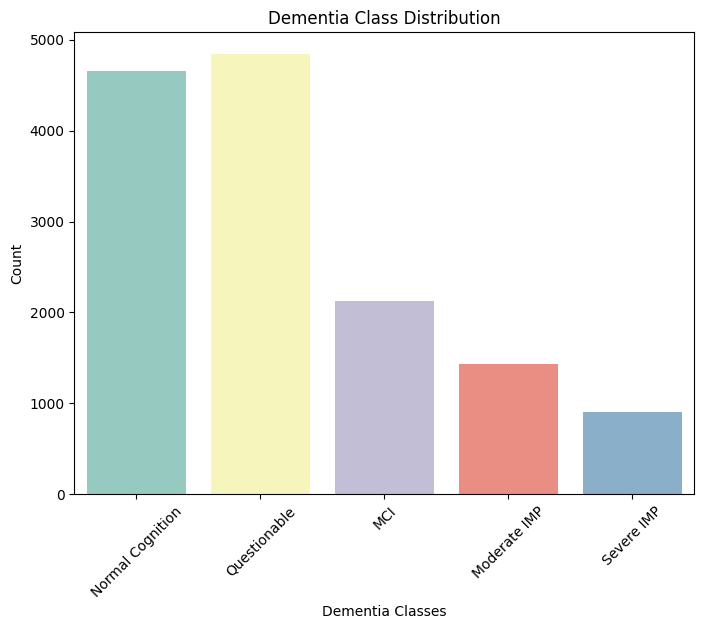

In [ ]:
# dro
y2 = nacc_dementia['CDRGLOB']
y = pd.get_dummies(y2)
X = nacc_dementia.drop(['CDRGLOB'], axis=1)
class_counts = y2.value_counts()

plt.figure(figsize=(8, 6))

class_labels = ['Normal Cognition', 'Questionable', 'MCI', 'Moderate IMP', 'Severe IMP']  # Replace with your actual labels

sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')
plt.title('Dementia Class Distribution')
plt.xlabel('Dementia Classes')
plt.ylabel('Count')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)  # Set custom x-tick labels
plt.show()

In [ ]:
#do resampling before splitting data
from imblearn.over_sampling import SMOTE
import numpy as np
# Ensure y_train_flat is a numpy array
# Ensure y is a numpy array
y_flat = np.array(y)

# Apply SMOTE
smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X, y_flat)

# Convert X_resampled DataFrame to NumPy array and reshape it
X_resampled_flat = X_resampled.to_numpy().reshape(X_resampled.shape[0], -1)

# Check the number of samples after oversampling
print("Number of samples after oversampling:", X_resampled_flat.shape[0], y_resampled.shape[0])

# Ensure the number of samples in X_resampled_flat and y_resampled are consistent
if X_resampled_flat.shape[0] == y_resampled.shape[0]:
    # Your further processing code here
    pass
else:
    print("Error: Number of samples in X_resampled_flat and y_resampled are inconsistent.")

Number of samples after oversampling: 24210 24210


<ipython-input-5-7c7252c578b3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')


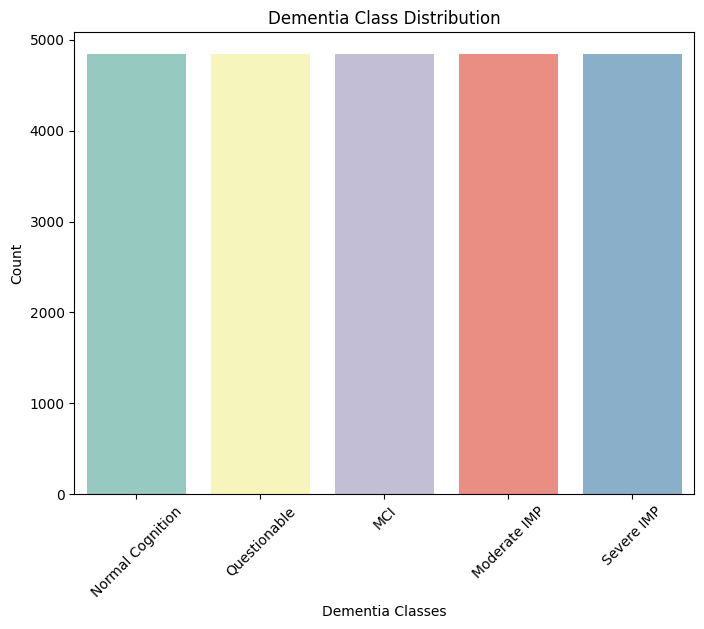

In [ ]:
y_restored = np.argmax(y_resampled, axis=1)

y_restored_df = pd.DataFrame(y_restored, columns=['CDRGLOB'])

class_counts = y_restored_df['CDRGLOB'].value_counts()

plt.figure(figsize=(8, 6))

class_labels = ['Normal Cognition', 'Questionable', 'MCI', 'Moderate IMP', 'Severe IMP']  # Replace with your actual labels

sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')
plt.title('Dementia Class Distribution')
plt.xlabel('Dementia Classes')
plt.ylabel('Count')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)  # Set custom x-tick labels
plt.show()


In [ ]:

#split the Data into Train and Test (80/20)

# Split
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform (X_resampled_flat)
y_multi_class = np.argmax(y_resampled, axis=1)

X_train, X_test, y_train, y_test = train_test_split ( X_scaled, y_resampled,test_size = 0.2)
#X_train, X_test, y_train, y_test = train_test_split ( X_scaled, y_multi_class,test_size = 0.2)

kfold=10
skfold = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=42)

In [ ]:
# Initialize a K Nearest Neighbor Classifier (execution Time <2s)
#Train the model and make predictions
modelKNN = KNeighborsClassifier(n_neighbors = 10)
cv_scores_KNN = cross_val_score(modelKNN, X_train, y_train, cv=10, scoring='accuracy')
mean_cv_score_KNN = cv_scores_KNN.mean()
#print("Cross-validation scores:", cv_scores)
print("10-fold Cross validation scores for kNN Classifier:", mean_cv_score_KNN)


modelKNN.fit(X_train, y_train)

#modelKNN=model

y_pred = modelKNN.predict(X_test)

#Performance measurement
class_report_KNN_boxplot = classification_report(y_test, y_pred,output_dict=True)
class_report_KNN = classification_report(y_test, y_pred)
accuracy_KNN = accuracy_score(y_test, y_pred)
print(class_report_KNN)
print("Model Accuracy with Test Data:", accuracy_KNN)

10-fold Cross validation scores for kNN Classifier: 0.372675913165541
              precision    recall  f1-score   support

           0       0.66      0.26      0.37       960
           1       0.50      0.16      0.24       947
           2       0.63      0.28      0.39       987
           3       0.77      0.42      0.54       986
           4       0.92      0.80      0.86       962

   micro avg       0.75      0.38      0.51      4842
   macro avg       0.70      0.38      0.48      4842
weighted avg       0.70      0.38      0.48      4842
 samples avg       0.38      0.38      0.38      4842

Model Accuracy with Test Data: 0.3843453118546055


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


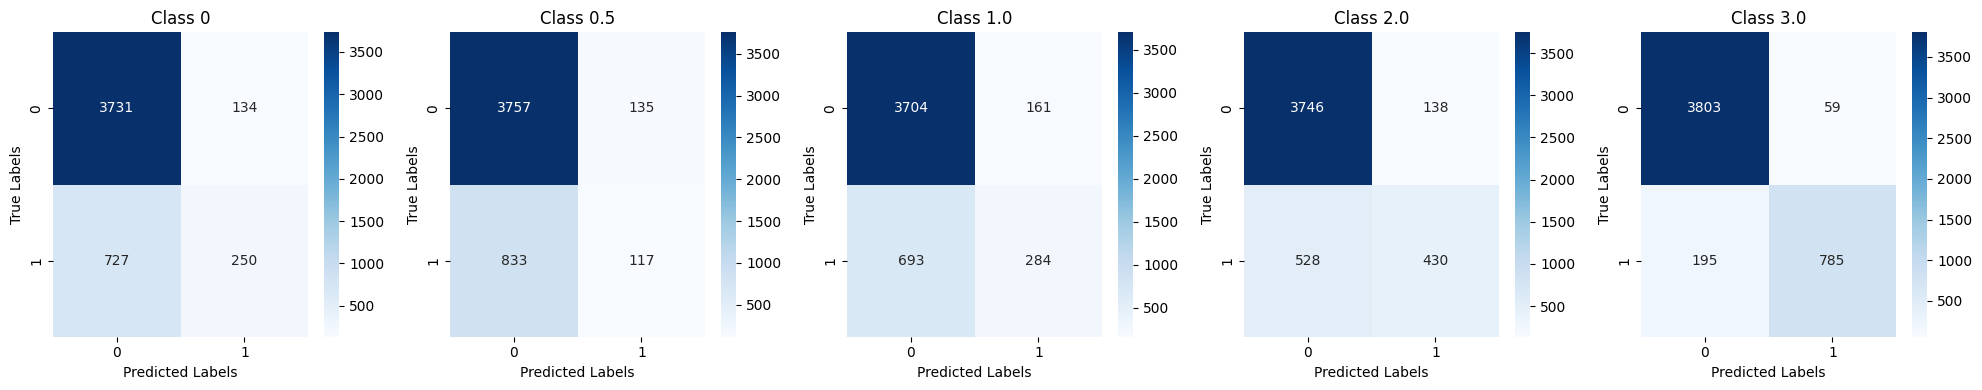

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix

import numpy as np

# Assuming y_test is one-hot encoded
#y_test_single = np.argmax(y_test, axis=1)
y_pred = modelKNN.predict(X_test)


cm = confusion_matrix(y_test[:, 0], y_pred[:, 0],)

# Plot confusion matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
#plt.xlabel('Predicted Labels')
#plt.ylabel('True Labels')
#plt.title('Confusion Matrix - for KNN Multi-Label Classification - Dementia Diagnosis - ')
#plt.show()

classes = [0, 0.5, 1.0, 2.0, 3.0]
confusion_matrices_KNN = []
for i in range(5):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    confusion_matrices_KNN.append(cm)

# Plot confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    sns.heatmap(confusion_matrices_KNN[i], annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(f'Class {classes[i]}')
    ax.set_xlabel('KNN Predicted Labels')
    ax.set_ylabel('True Labels')
plt.tight_layout()
plt.show()

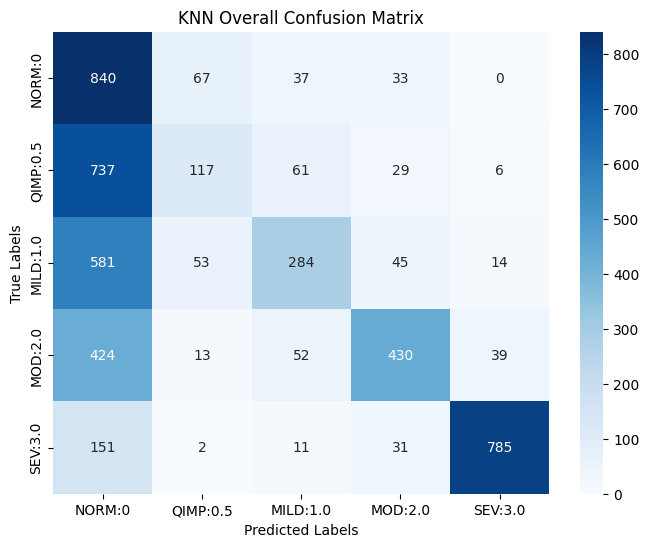

In [ ]:
y_pred = modelKNN.predict(X_test)

y_test_combined = np.argmax(y_test, axis=1)
y_pred_combined = np.argmax(y_pred, axis=1)

class_labels =['NORM:0','QIMP:0.5','MILD:1.0','MOD:2.0','SEV:3.0']

# Compute the overall confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('KNN Overall Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Mean AUROC Score: 0.8379888458265936


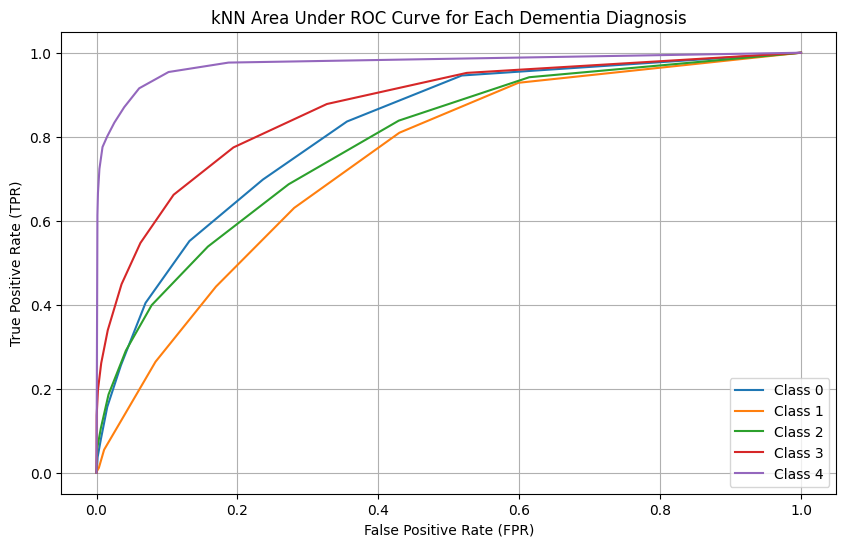

In [ ]:
from sklearn.metrics import roc_curve


y_prob = modelKNN.predict_proba(X_test)

# Compute AUROC score for each class
auroc_scores = []
for i in range(y_test.shape[1]):  # Assuming y_test is a multilabel indicator matrix
    auroc = roc_auc_score(y_test[:, i], y_prob[i][:, 1])
    auroc_scores.append(auroc)

KNN_mean_auroc = sum(auroc_scores) / len(auroc_scores)
print("Mean AUROC Score:", KNN_mean_auroc)
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
plt.figure(figsize=(10, 6))
for i in range(len(auroc_scores)):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[i][:, 1])
    plt.plot(fpr, tpr, label=f'Class {i}')  # Plot each class separately
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('kNN Area Under ROC Curve for Each Dementia Diagnosis')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the DecisionTreeClassifier model  (<1s)
modelDT = DecisionTreeClassifier(random_state=42)  # You can adjust parameters as needed
cv_scores_DT = cross_val_score(modelDT, X_train, y_train, cv=10, scoring='accuracy')
#print("Cross-validation scores:", cv_scores_DT)
mean_cv_score_DT = cv_scores_DT.mean()
print("10-fold Cross validation score for Decision Tree Classifier:", mean_cv_score_DT)


# Train the model
modelDT.fit(X_train, y_train)

# Make predictions
y_pred = modelDT.predict(X_test)


# Evaluate performance
class_report_DT = classification_report(y_test, y_pred)
class_report_DT_boxplot = classification_report(y_test, y_pred,output_dict=True)
accuracy_DT = accuracy_score(y_test, y_pred)
print(class_report_DT)
print("DECISION TREE Model Accuracy with Test Data:", accuracy_DT)

10-fold Cross validation score for Decision Tree Classifier: 0.8557931505651151
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       960
           1       0.81      0.80      0.81       947
           2       0.80      0.81      0.81       987
           3       0.85      0.84      0.85       986
           4       0.93      0.95      0.94       962

   micro avg       0.86      0.86      0.86      4842
   macro avg       0.86      0.86      0.86      4842
weighted avg       0.86      0.86      0.86      4842
 samples avg       0.86      0.86      0.86      4842

DECISION TREE Model Accuracy with Test Data: 0.8570838496489054


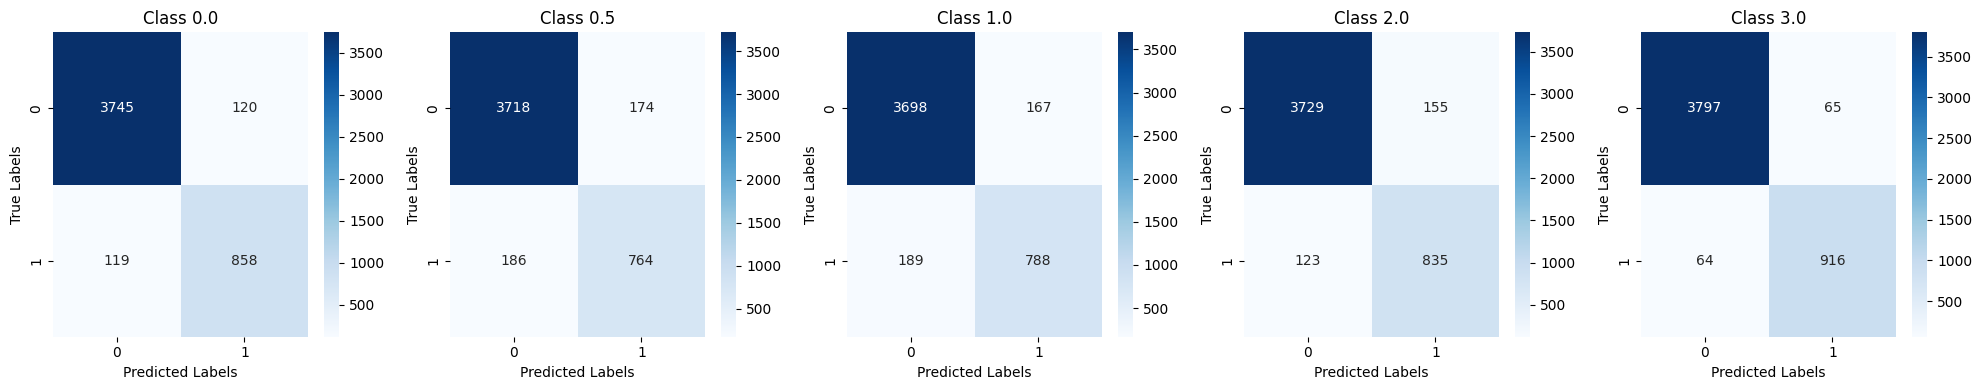

In [ ]:
classes = [0.0, 0.5, 1.0, 2.0, 3.0]

y_pred = modelDT.predict(X_test)

confusion_matrices_DT = []
for i in range(5):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    confusion_matrices_DT.append(cm)

# Plot confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    sns.heatmap(confusion_matrices_DT[i], annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(f'Class {classes[i]}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
plt.tight_layout()
plt.show()

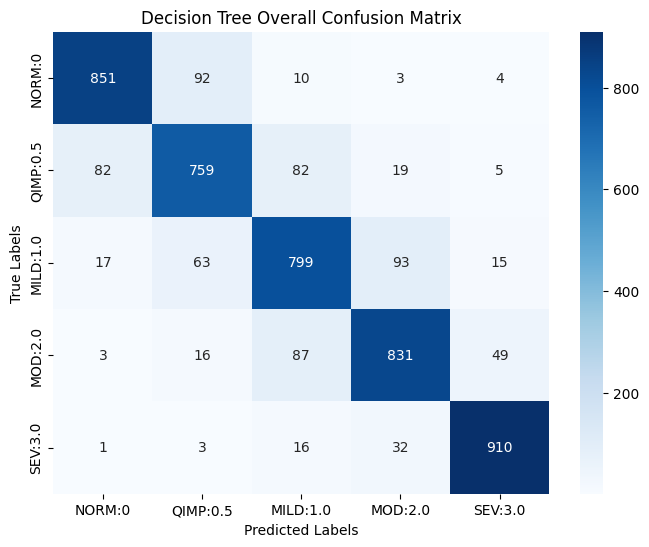

In [ ]:
y_pred = modelDT.predict(X_test)

y_test_combined = np.argmax(y_test, axis=1)
y_pred_combined = np.argmax(y_pred, axis=1)

class_labels =['NORM:0','QIMP:0.5','MILD:1.0','MOD:2.0','SEV:3.0']

# Compute the overall confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Decision Tree Overall Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Mean AUROC Score for Decision Tree: 0.9119559945768871


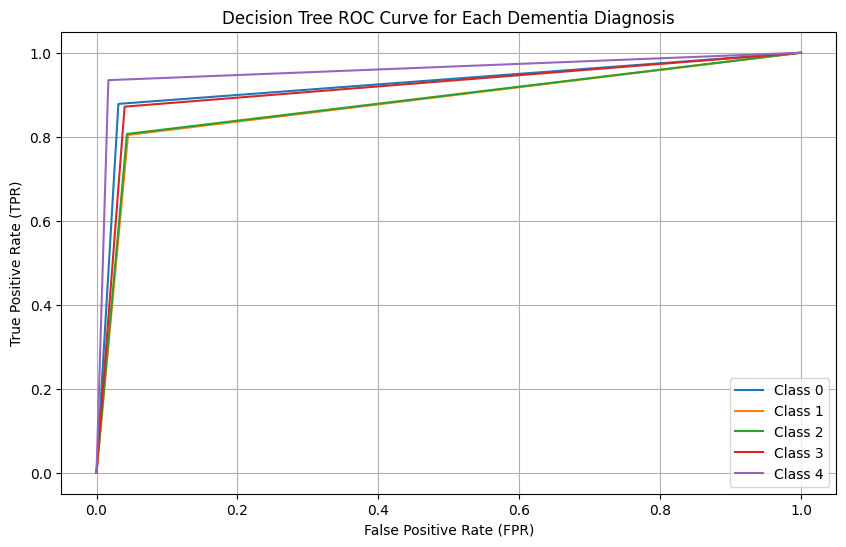

In [ ]:
from sklearn.metrics import roc_curve


y_prob = modelDT.predict_proba(X_test)

# Compute AUROC score for each class
auroc_scores = []
for i in range(y_test.shape[1]):  # Assuming y_test is a multilabel indicator matrix
    auroc = roc_auc_score(y_test[:, i], y_prob[i][:, 1])
    auroc_scores.append(auroc)

DT_mean_auroc = sum(auroc_scores) / len(auroc_scores)
print("Mean AUROC Score for Decision Tree:", DT_mean_auroc)
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
plt.figure(figsize=(10, 6))
for i in range(len(auroc_scores)):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[i][:, 1])
    plt.plot(fpr, tpr, label=f'Class {i}')  # Plot each class separately
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Decision Tree ROC Curve for Each Dementia Diagnosis')
plt.legend()
plt.grid(True)
plt.show()

NACCMMSE                0.534803
NACCGDS                 0.167965
NACCBMI                 0.089346
HRATE                   0.035085
BPSYS                   0.034358
BPDIAS                  0.029146
AGE                     0.027075
EDUC                    0.019688
QUITSMOK                0.014508
NACCAVST                0.010849
SMOKYRS                 0.009650
MARRIED_RELATIONSHIP    0.003958
HEARING                 0.003677
MALE_GENDER             0.003556
DIABETES                0.003239
VISION                  0.003014
TOBAC100                0.003000
NACCTBI                 0.002870
RISK_HYP                0.002098
CVHATT                  0.001495
SLEEPDIS                0.000622
dtype: float64


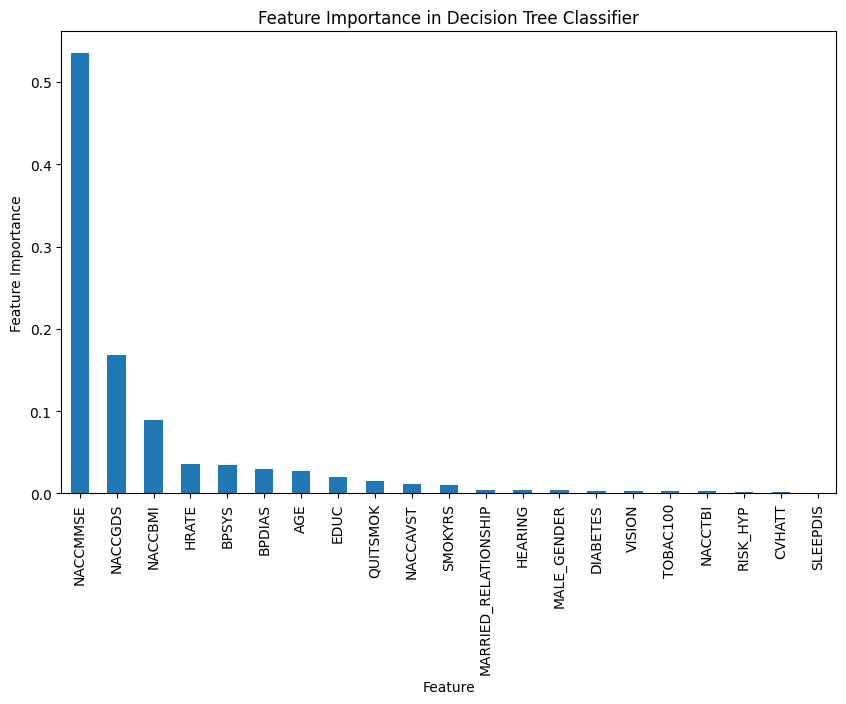

In [ ]:
feature_names = X.columns.tolist()
#print(feature_names)

feature_importance = modelDT.feature_importances_

list_imp = pd.Series(feature_importance, index=feature_names)

#list_imp = sorted(list_imp, reverse=True)
list_imp.sort_values(ascending=False, inplace=True)
#combined_list = list(zip(feature_names, feature_importance))
#print(combined_list)
plt.figure(figsize=(10, 6))
list_imp.plot(kind='bar')
#plt.xticks(range(len(feature_importance)), range(1, len(feature_importance) + 1))
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Classifier')
#plt.show()

print(list_imp)

In [ ]:
#RandomForest Classifier (47s)
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed
cv_scores_RF = cross_val_score(modelRF, X_train, y_train, cv=10, scoring='accuracy')
#print("Cross-validation scores:", cv_scores_RF)
mean_cv_score_RF = cv_scores_RF.mean()
print("10-fold Cross validation score for Random Forest Classifier:", mean_cv_score_RF)


# Train the model
modelRF.fit(X_train, y_train)

# Make predictions
y_pred = modelRF.predict(X_test)

# Evaluate performance
class_report_RF = classification_report(y_test, y_pred)
class_report_RF_boxplot = classification_report(y_test, y_pred,output_dict=True)
accuracy_RF = accuracy_score(y_test, y_pred)
print(class_report_RF)

print("RANDOM FOREST Model Accuracy with Test Data:", accuracy_RF)

10-fold Cross validation score for Random Forest Classifier: 0.8355534299440646
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       960
           1       0.93      0.74      0.83       947
           2       0.94      0.82      0.87       987
           3       0.98      0.84      0.90       986
           4       0.99      0.94      0.96       962

   micro avg       0.96      0.84      0.90      4842
   macro avg       0.96      0.84      0.90      4842
weighted avg       0.96      0.84      0.90      4842
 samples avg       0.84      0.84      0.84      4842

RANDOM FOREST Model Accuracy with Test Data: 0.8411813300289137


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


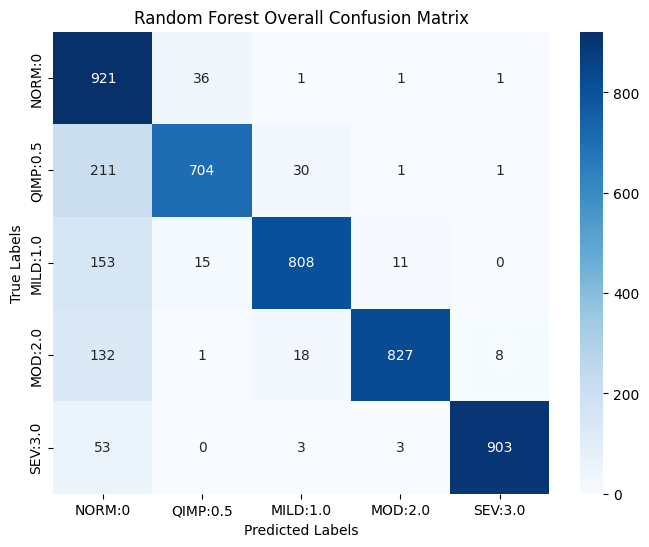

In [ ]:
# Concatenate true labels and predicted labels

y_pred = modelRF.predict(X_test)

y_test_combined = np.argmax(y_test, axis=1)
y_pred_combined = np.argmax(y_pred, axis=1)

class_labels =['NORM:0','QIMP:0.5','MILD:1.0','MOD:2.0','SEV:3.0']

# Compute the overall confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Random Forest Overall Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Mean AUROC Score for RANDOM FOREST: 0.9912437560623817


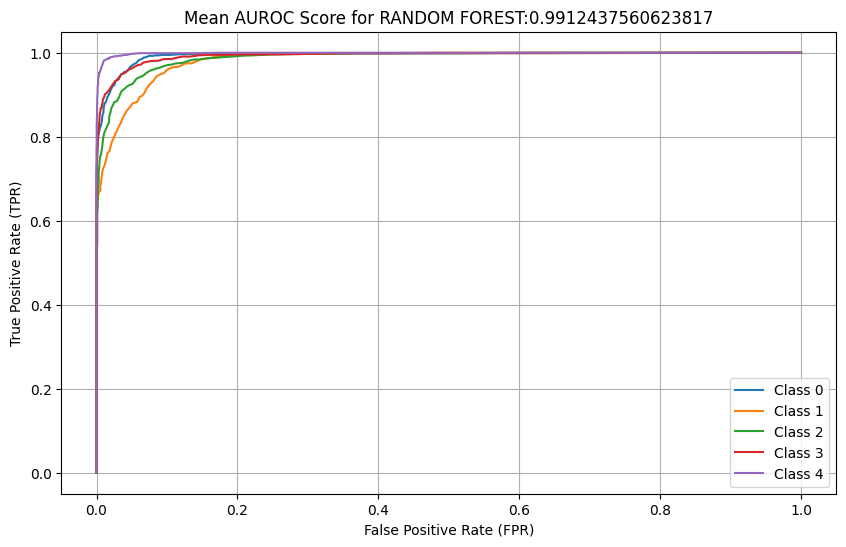

In [ ]:
from sklearn.metrics import roc_curve


y_prob = modelRF.predict_proba(X_test)

# Compute AUROC score for each class
auroc_scores = []
for i in range(y_test.shape[1]):  # Assuming y_test is a multilabel indicator matrix
    auroc = roc_auc_score(y_test[:, i], y_prob[i][:, 1])
    auroc_scores.append(auroc)
RF_mean_auroc = sum(auroc_scores) / len(auroc_scores)
print("Mean AUROC Score for RANDOM FOREST:", RF_mean_auroc)
#graph_header= "Mean AUROC Score for RANDOM FOREST:"+ RF_mean_auroc
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
plt.figure(figsize=(10, 6))
for i in range(len(auroc_scores)):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[i][:, 1])
    plt.plot(fpr, tpr, label=f'Class {i}')  # Plot each class separately
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Random Forest Area Under ROC Curve for Each Dementia Diagnosis')
plt.title("Mean AUROC Score for RANDOM FOREST:"+ str(RF_mean_auroc))
plt.legend()
plt.grid(True)
plt.show()

NACCMMSE                0.336669
NACCGDS                 0.122944
NACCBMI                 0.106687
HRATE                   0.087395
BPDIAS                  0.086154
BPSYS                   0.082232
AGE                     0.033511
EDUC                    0.027383
SMOKYRS                 0.020175
NACCAVST                0.019272
QUITSMOK                0.018802
TOBAC100                0.008437
SLEEPDIS                0.007892
HEARING                 0.006685
MARRIED_RELATIONSHIP    0.006644
MALE_GENDER             0.006462
VISION                  0.006262
RISK_HYP                0.006004
DIABETES                0.004123
NACCTBI                 0.003439
CVHATT                  0.002827
dtype: float64


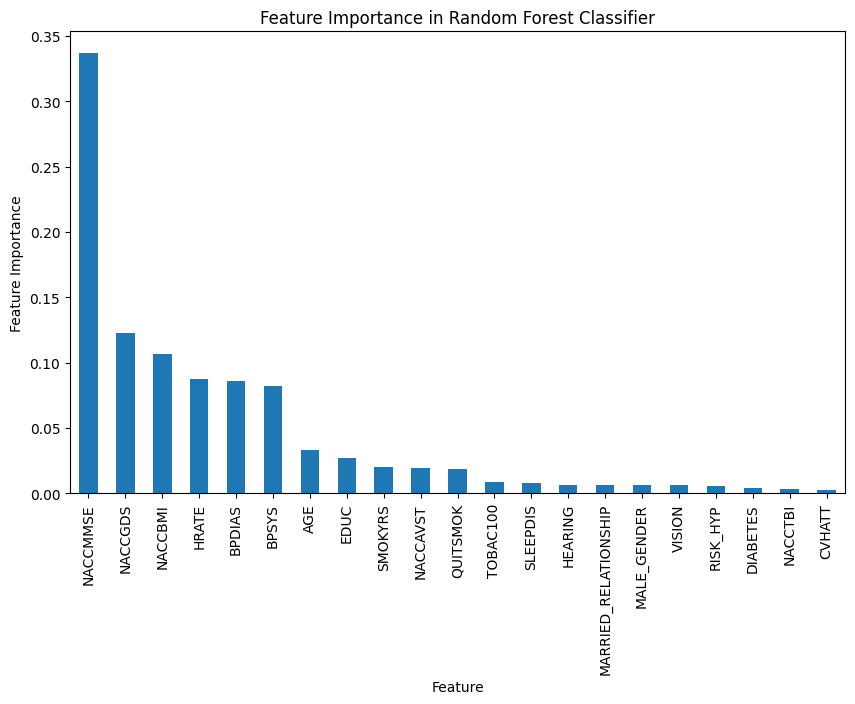

In [ ]:
feature_names = X.columns.tolist()
#print(feature_names)

feature_importance = modelRF.feature_importances_

list_imp = pd.Series(feature_importance, index=feature_names)

#list_imp = sorted(list_imp, reverse=True)
list_imp.sort_values(ascending=False, inplace=True)
#combined_list = list(zip(feature_names, feature_importance))
#print(combined_list)
plt.figure(figsize=(10, 6))
list_imp.plot(kind='bar')
#plt.xticks(range(len(feature_importance)), range(1, len(feature_importance) + 1))
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
#plt.show()

print(list_imp)

In [ ]:

from sklearn.model_selection import cross_val_predict

modelXGB = XGBClassifier(random_state=42)  # You can adjust parameters as needed(16s)
cv_scores_XGB = cross_val_score(modelXGB, X_train, y_train, cv=10, scoring='accuracy')
#print("Cross-validation scores:", cv_scores_XGB)
mean_cv_score_XGB = cv_scores_XGB.mean()
print("10-fold Cross validation score for XGBoost Classifier:", mean_cv_score_XGB)
# Train the model
modelXGB.fit(X_train, y_train)

# Make predictions
y_pred = modelXGB.predict(X_test)

# Evaluate performance
class_report_XGB = classification_report(y_test, y_pred)
class_report_XGB_boxplot = classification_report(y_test, y_pred,output_dict=True)
accuracy_XGB = accuracy_score(y_test, y_pred)
print(class_report_XGB)
#print(accuracy_XGB)
print("XGBOOST Model Accuracy with Test Data:", accuracy_XGB)



10-fold Cross validation score for XGBoost Classifier: 0.8569809804289669
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       960
           1       0.89      0.83      0.86       947
           2       0.91      0.84      0.87       987
           3       0.94      0.86      0.90       986
           4       0.98      0.96      0.97       962

   micro avg       0.93      0.88      0.90      4842
   macro avg       0.93      0.88      0.90      4842
weighted avg       0.93      0.88      0.90      4842
 samples avg       0.87      0.88      0.87      4842

XGBOOST Model Accuracy with Test Data: 0.8634861627426683


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


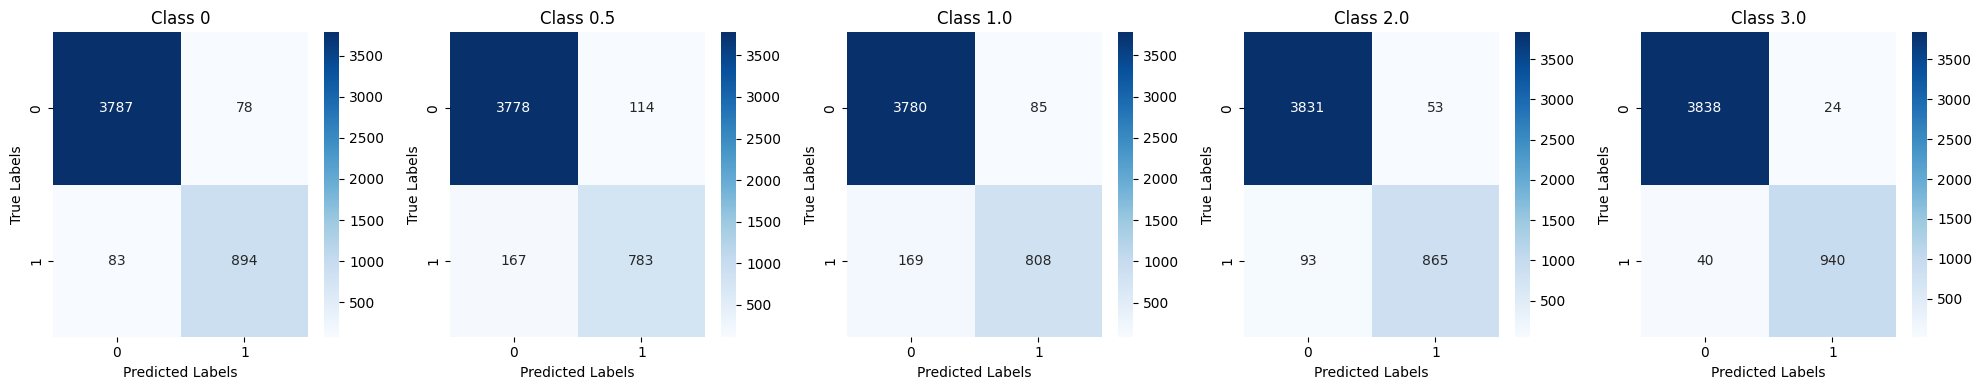

In [ ]:
classes = [0, 0.5, 1.0, 2.0, 3.0]

y_pred = modelXGB.predict(X_test)

confusion_matrices_XGB = []
for i in range(5):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    confusion_matrices_XGB.append(cm)

# Plot confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    sns.heatmap(confusion_matrices_XGB[i], annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(f'Class {classes[i]}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
plt.tight_layout()
plt.show()

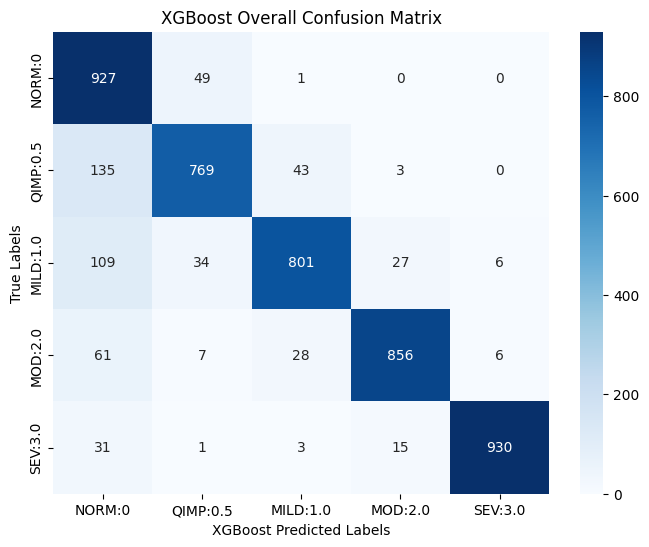

In [ ]:

y_pred = modelXGB.predict(X_test)

y_test_combined = np.argmax(y_test, axis=1)
y_pred_combined = np.argmax(y_pred, axis=1)

class_labels =['NORM:0','QIMP:0.5','MILD:1.0','MOD:2.0','SEV:3.0']

# Compute the overall confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('XGBoost Overall Confusion Matrix')
plt.xlabel('XGBoost Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Mean AUROC Score for XGBOOST: 0.5017686346666013


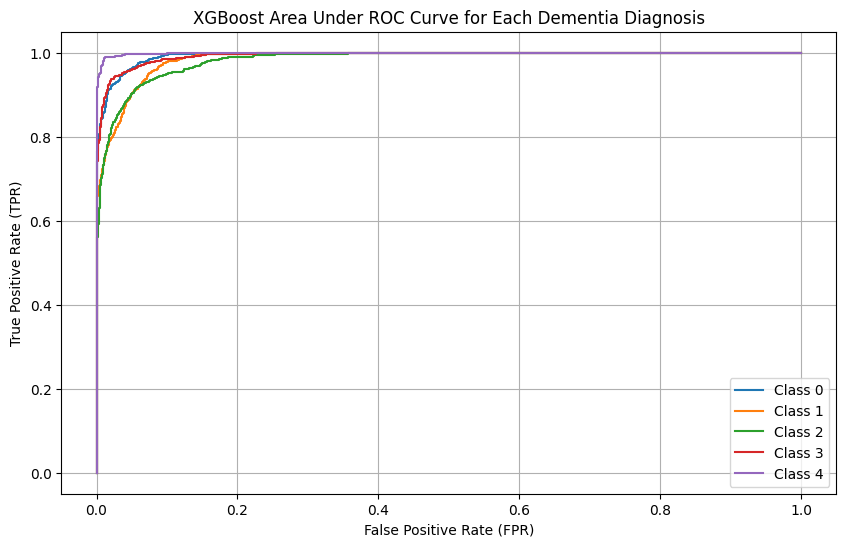

In [ ]:
from sklearn.metrics import roc_curve

y_prob = modelXGB.predict_proba(X_test)

# Compute AUROC score for each class
auroc_scores = []
for i in range(y_test.shape[1]):  # Assuming y_test is a multilabel indicator matrix
    #auroc = roc_auc_score(y_test[i], y_prob[i])
    auroc = roc_auc_score(y_test[:, i], y_prob[:, 1])
    auroc_scores.append(auroc)

XGB_mean_auroc = sum(auroc_scores) / len(auroc_scores)
print("Mean AUROC Score for XGBOOST:", XGB_mean_auroc)
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
plt.figure(figsize=(10, 6))
for i in range(len(auroc_scores)):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')  # Plot each class separately
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('XGBoost Area Under ROC Curve for Each Dementia Diagnosis')
plt.legend()
plt.grid(True)
plt.show()

NACCMMSE                0.300062
NACCGDS                 0.153906
NACCBMI                 0.071801
HRATE                   0.062781
SLEEPDIS                0.042186
BPSYS                   0.039703
TOBAC100                0.029714
RISK_HYP                0.027719
BPDIAS                  0.027289
QUITSMOK                0.027260
NACCAVST                0.025374
HEARING                 0.021620
NACCTBI                 0.021454
MALE_GENDER             0.021242
SMOKYRS                 0.019679
EDUC                    0.019338
VISION                  0.019308
MARRIED_RELATIONSHIP    0.018841
DIABETES                0.018703
AGE                     0.017363
CVHATT                  0.014657
dtype: float32


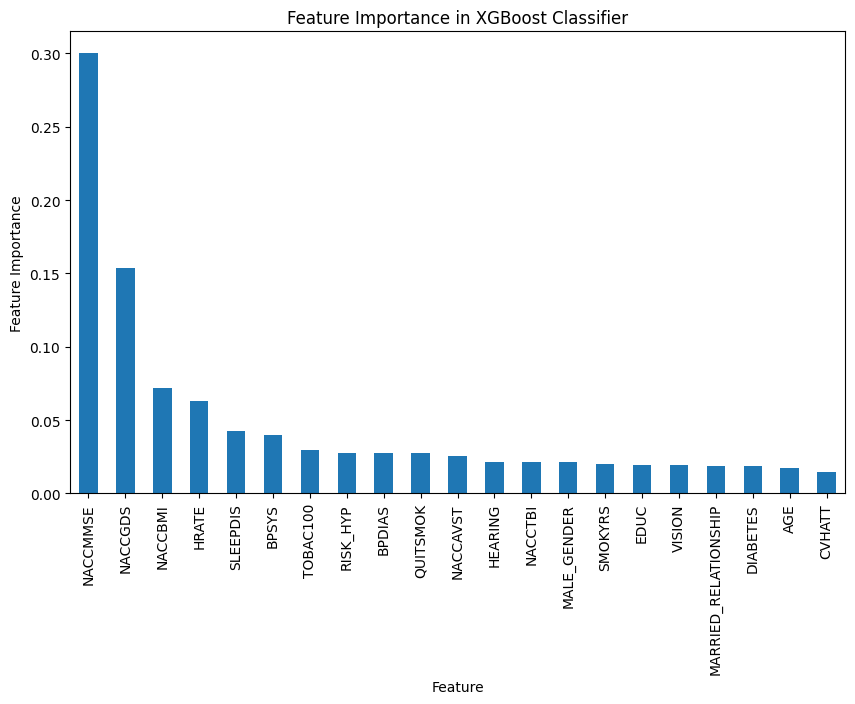

In [ ]:
feature_names = X.columns.tolist()
#print(feature_names)

feature_importance = modelXGB.feature_importances_

list_imp = pd.Series(feature_importance, index=feature_names)

#list_imp = sorted(list_imp, reverse=True)
list_imp.sort_values(ascending=False, inplace=True)
#combined_list = list(zip(feature_names, feature_importance))
#print(combined_list)
plt.figure(figsize=(10, 6))
list_imp.plot(kind='bar')
#plt.xticks(range(len(feature_importance)), range(1, len(feature_importance) + 1))
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in XGBoost Classifier')
#plt.show()

print(list_imp)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Define the MLPClassifier model
modelANN = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', random_state=42)

# Cross-validation
cv_scores_ANN = cross_val_score(modelANN, X_train, y_train, cv=10, scoring='accuracy')
mean_cv_score_ANN = cv_scores_ANN.mean()
print("10-fold Cross validation score for ANN Classifier:", mean_cv_score_ANN)

# Train the model
modelANN.fit(X_train, y_train)

# Make predictions
y_pred = modelANN.predict(X_test)



# Evaluate performance
class_report_ANN = classification_report(y_test, y_pred)
accuracy_ANN = accuracy_score(y_test, y_pred)
print(class_report_ANN)
print("Model Accuracy with Test Data:", accuracy_ANN)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

10-fold Cross validation score for ANN Classifier: 0.7322385782307991
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       960
           1       0.82      0.76      0.79       947
           2       0.75      0.68      0.71       987
           3       0.82      0.66      0.73       986
           4       0.94      0.91      0.93       962

   micro avg       0.84      0.77      0.81      4842
   macro avg       0.84      0.78      0.81      4842
weighted avg       0.84      0.77      0.81      4842
 samples avg       0.75      0.77      0.76      4842

Model Accuracy with Test Data: 0.7331681123502685


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


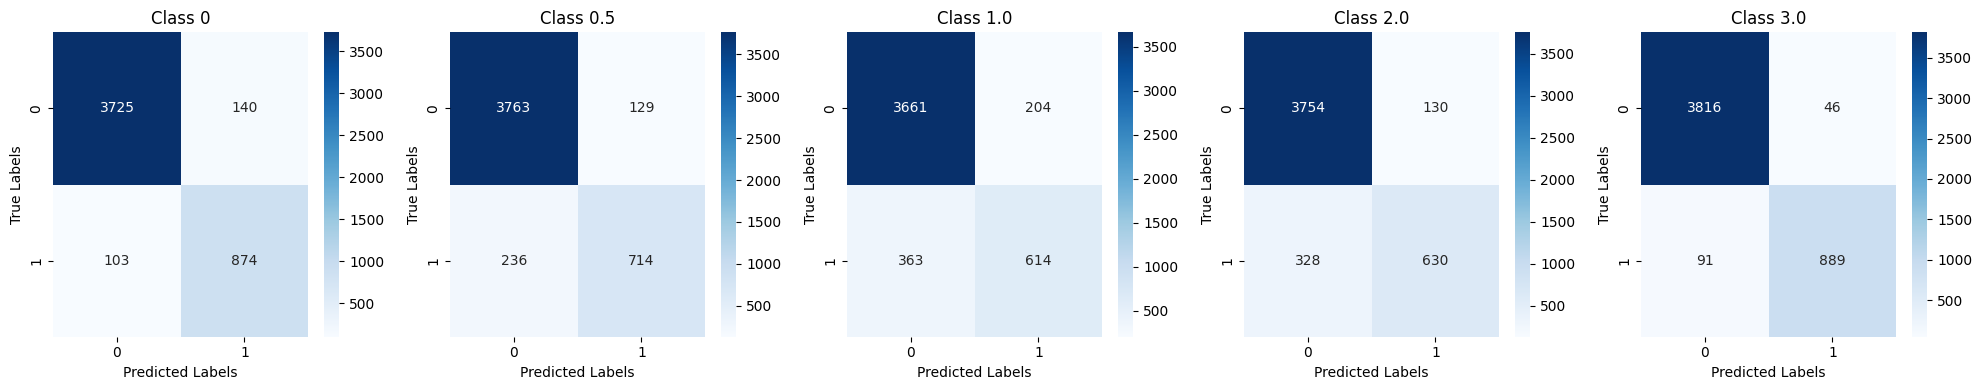

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix

import numpy as np

# Assuming y_test is one-hot encoded
#y_test_single = np.argmax(y_test, axis=1)

#cm = confusion_matrix(y_test[:, 0], y_pred[:, 0])

# Plot confusion matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
#plt.xlabel('Predicted Labels')
#plt.ylabel('True Labels')
#plt.title('Confusion Matrix - for KNN Multi-Label Classification - Dementia Diagnosis - ')
#plt.show()
y_pred = modelANN.predict(X_test)

classes = [0, 0.5, 1.0, 2.0, 3.0]
confusion_matrices_ANN = []
for i in range(5):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    confusion_matrices_ANN.append(cm)

# Plot confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    sns.heatmap(confusion_matrices_ANN[i], annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(f'Class {classes[i]}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
plt.tight_layout()
plt.show()

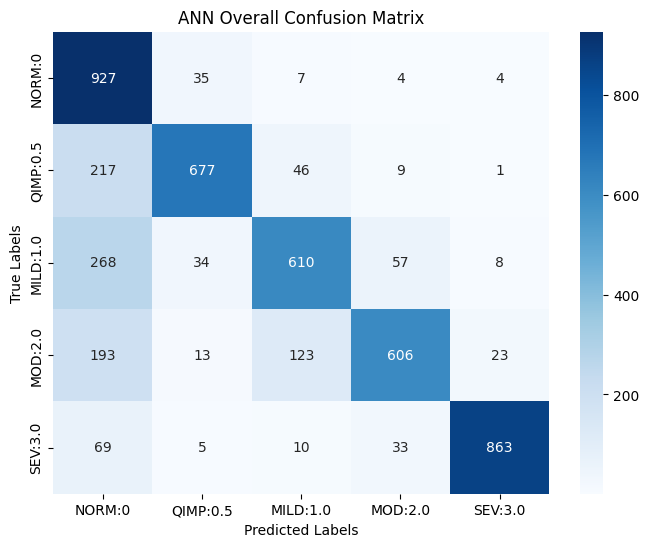

In [ ]:
y_pred = modelANN.predict(X_test)

y_test_combined = np.argmax(y_test, axis=1)
y_pred_combined = np.argmax(y_pred, axis=1)

class_labels =['NORM:0','QIMP:0.5','MILD:1.0','MOD:2.0','SEV:3.0']

# Compute the overall confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('ANN Overall Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Mean AUROC Score for Multi Layered Perceptron ANN: 0.5019075701030328


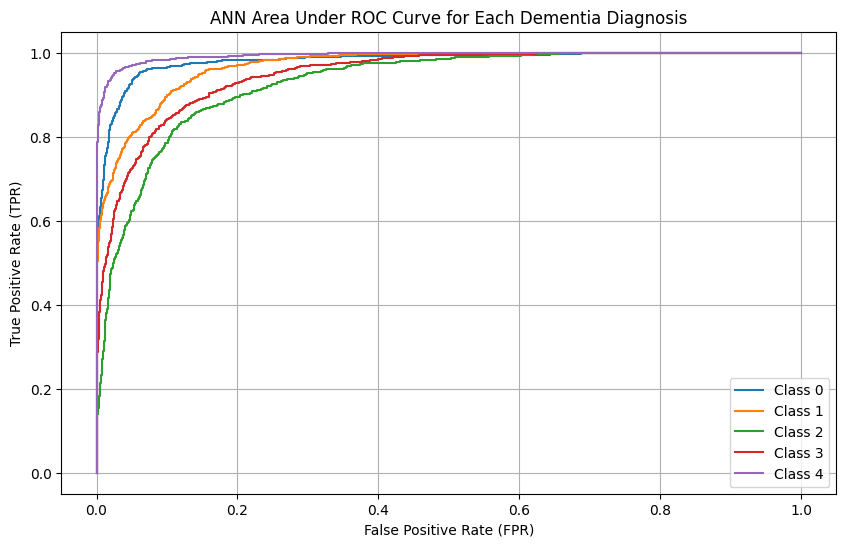

In [ ]:
from sklearn.metrics import roc_curve

y_prob = modelANN.predict_proba(X_test)

# Compute AUROC score for each class
auroc_scores = []
for i in range(y_test.shape[1]):  # Assuming y_test is a multilabel indicator matrix
    #auroc = roc_auc_score(y_test[i], y_prob[i])
    auroc = roc_auc_score(y_test[:, i], y_prob[:, 1])
    auroc_scores.append(auroc)

ANN_mean_auroc = sum(auroc_scores) / len(auroc_scores)
print("Mean AUROC Score for Multi Layered Perceptron ANN:", ANN_mean_auroc)
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
plt.figure(figsize=(10, 6))
for i in range(len(auroc_scores)):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')  # Plot each class separately
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ANN Area Under ROC Curve for Each Dementia Diagnosis')
plt.legend()
plt.grid(True)
plt.show()

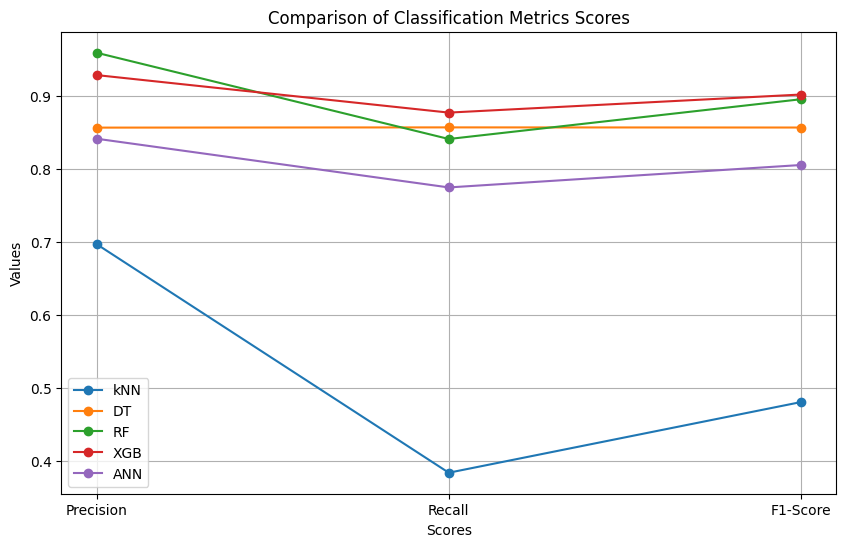

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

classifiers = ["kNN", "DT", "RF", "XGB", "ANN"]
precision = []
recall = []
f1_score = []

for classifier in [modelKNN, modelDT, modelRF, modelXGB, modelANN]:
    y_pred = classifier.predict(X_test)
    metrics = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision.append(metrics[0])
    recall.append(metrics[1])
    f1_score.append(metrics[2])

# Transpose the data
metrics_data = np.array([precision, recall, f1_score])

# Plot the transposed metrics
# Plot the metrics with classifiers as legends
plt.figure(figsize=(10, 6))
plt.plot(['Precision', 'Recall', 'F1-Score'], [precision, recall, f1_score], marker='o')
plt.xlabel('Scores')
plt.ylabel('Values')
plt.title('Comparison of Classification Metrics Scores')
plt.legend(classifiers)
plt.grid(True)
plt.show()

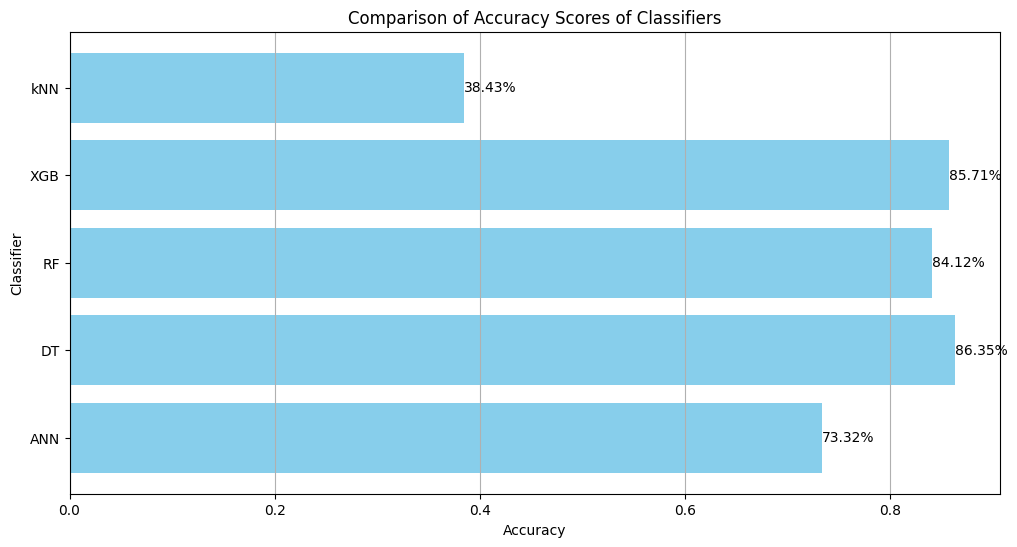

In [ ]:
classifiers = ["kNN", "XGB", "RF", "DT", "ANN"]
accuracy_scores = [accuracy_KNN, accuracy_DT, accuracy_RF, accuracy_XGB, accuracy_ANN]  # Example accuracy scores, replace with actual scores

# Calculate percentages
total = sum(accuracy_scores)
percentages = [(score) * 100 for score in accuracy_scores]

# Define colors for each bar
colors = 'skyblue'

# Create horizontal bar plot
plt.figure(figsize=(12, 6))
bars = plt.barh(classifiers, accuracy_scores, color=colors)

# Add percentages to each bar
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%',
             va='center', ha='left', fontsize=10)

plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Comparison of Accuracy Scores of Classifiers')
plt.gca().invert_yaxis()  # Invert y-axis to have classifiers listed from top to bottom
plt.grid(axis='x')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier



nacc_dementia = pd.read_csv('ds_nacc_dementia_ML.csv')

nacc_dementia.head()

,NACCID,SEX,NACCAVST,BPSYS,BPDIAS,HRATE,HEARING,NACCMMSE,CDRGLOB,DIABETES,...,VISION,CVHATT,SLEEPAP,HYPOSOM,SLEEPOTH,AGE,SLEEPDIS,MARRIED_RELATIONSHIP,INCIDENCE_DEMENTIA,RISK_HYP
0,NACC002909,1,1,160.000000,85.000000,59.000000,1,7.709624,0.5,0,...,0,0,0.0,1.0,0.0,70,1,1,1,1
1,NACC004352,2,1,191.228504,144.576247,144.392399,1,8.537011,1.0,0,...,1,0,0.0,0.0,0.0,63,0,1,1,1
2,NACC004687,1,1,148.000000,75.000000,70.000000,0,5.453668,0.0,0,...,0,0,0.0,0.0,0.0,77,0,0,0,1
3,NACC007213,2,1,139.000000,46.000000,52.000000,0,7.709624,0.5,0,...,0,1,0.0,1.0,0.0,81,1,0,1,1
4,NACC008514,1,1,117.000000,60.000000,66.000000,0,7.709624,0.5,0,...,0,0,0.0,0.0,0.0,86,0,1,1,0


In [ ]:
#before we move ahead, we need to drop the subject ID from the dataset
def binary_gender(colvar1):

 if colvar1==1:
        return 1
 else:
        return 0


nacc_dementia['MALE_GENDER'] = nacc_dementia['SEX'].apply(binary_gender)

nacc_dementia.drop(['NACCID','ALCOHOL','SLEEPAP','HYPOSOM','SLEEPOTH','INCIDENCE_DEMENTIA','TOBAC30','NACCIDEM','SEX','INCIDENCE_DEMENTIA'], axis=1, inplace=True)



nacc_dementia.head()

,NACCAVST,BPSYS,BPDIAS,HRATE,HEARING,NACCMMSE,CDRGLOB,DIABETES,NACCTBI,NACCGDS,...,SMOKYRS,QUITSMOK,NACCBMI,VISION,CVHATT,AGE,SLEEPDIS,MARRIED_RELATIONSHIP,RISK_HYP,MALE_GENDER
0,1,160.000000,85.000000,59.000000,1,7.709624,0.5,0,1,4.000000,...,0,888,32.400000,0,0,70,1,1,1,1
1,1,191.228504,144.576247,144.392399,1,8.537011,1.0,0,0,7.727487,...,0,888,43.759825,1,0,63,0,1,1,0
2,1,148.000000,75.000000,70.000000,0,5.453668,0.0,0,0,1.000000,...,0,888,19.000000,0,0,77,0,0,1,1
3,1,139.000000,46.000000,52.000000,0,7.709624,0.5,0,0,4.000000,...,27,42,22.100000,0,1,81,1,0,1,0
4,1,117.000000,60.000000,66.000000,0,7.709624,0.5,0,0,4.000000,...,4,999,28.900000,0,0,86,0,1,0,1


<ipython-input-4-0021f0891634>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')


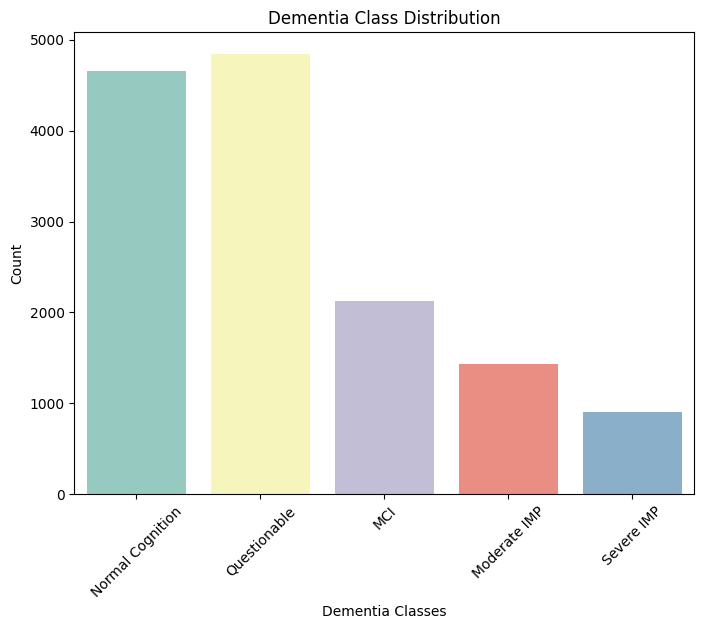

In [ ]:
# dro
y2 = nacc_dementia['CDRGLOB']
y = pd.get_dummies(y2)
X = nacc_dementia.drop(['CDRGLOB'], axis=1)
class_counts = y2.value_counts()

plt.figure(figsize=(8, 6))

class_labels = ['Normal Cognition', 'Questionable', 'MCI', 'Moderate IMP', 'Severe IMP']  # Replace with your actual labels

sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')
plt.title('Dementia Class Distribution')
plt.xlabel('Dementia Classes')
plt.ylabel('Count')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)  # Set custom x-tick labels
plt.show()

In [ ]:
#do resampling before splitting data
from imblearn.over_sampling import SMOTE
import numpy as np
# Ensure y_train_flat is a numpy array
# Ensure y is a numpy array
y_flat = np.array(y)

# Apply SMOTE
smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X, y_flat)

# Convert X_resampled DataFrame to NumPy array and reshape it
X_resampled_flat = X_resampled.to_numpy().reshape(X_resampled.shape[0], -1)

# Check the number of samples after oversampling
print("Number of samples after oversampling:", X_resampled_flat.shape[0], y_resampled.shape[0])

# Ensure the number of samples in X_resampled_flat and y_resampled are consistent
if X_resampled_flat.shape[0] == y_resampled.shape[0]:
    # Your further processing code here
    pass
else:
    print("Error: Number of samples in X_resampled_flat and y_resampled are inconsistent.")

Number of samples after oversampling: 24210 24210


<ipython-input-5-7c7252c578b3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')


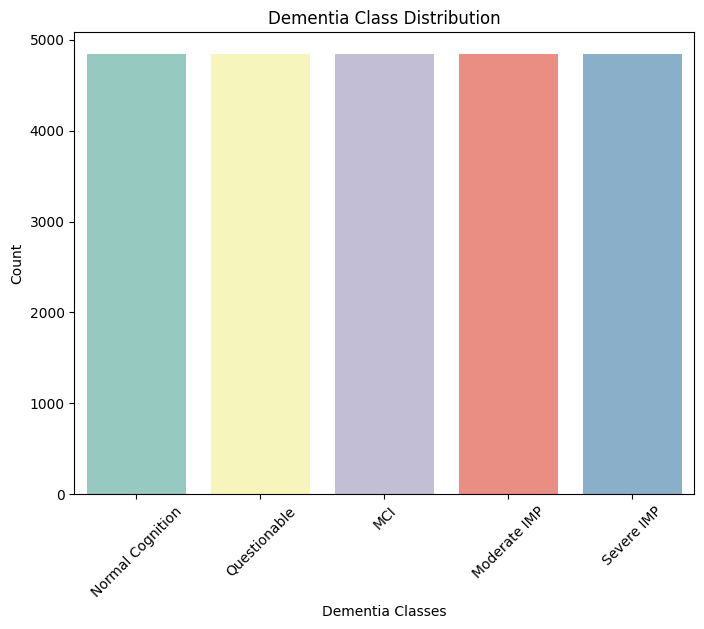

In [ ]:
y_restored = np.argmax(y_resampled, axis=1)

y_restored_df = pd.DataFrame(y_restored, columns=['CDRGLOB'])

class_counts = y_restored_df['CDRGLOB'].value_counts()

plt.figure(figsize=(8, 6))

class_labels = ['Normal Cognition', 'Questionable', 'MCI', 'Moderate IMP', 'Severe IMP']  # Replace with your actual labels

sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')
plt.title('Dementia Class Distribution')
plt.xlabel('Dementia Classes')
plt.ylabel('Count')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)  # Set custom x-tick labels
plt.show()


In [ ]:

#split the Data into Train and Test (80/20)

# Split
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform (X_resampled_flat)
y_multi_class = np.argmax(y_resampled, axis=1)

X_train, X_test, y_train, y_test = train_test_split ( X_scaled, y_resampled,test_size = 0.2)
#X_train, X_test, y_train, y_test = train_test_split ( X_scaled, y_multi_class,test_size = 0.2)

kfold=10
skfold = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=42)

Optimal number of features for RF: 15


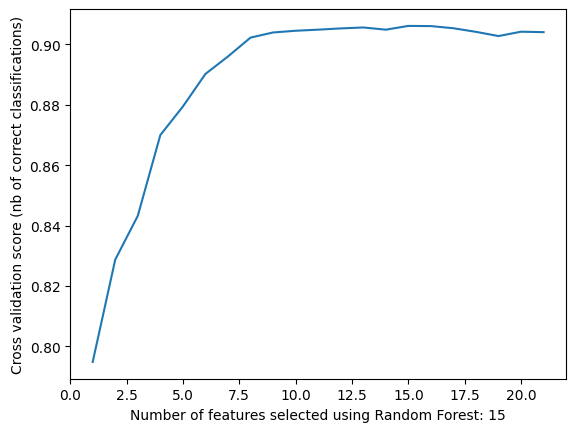

Number of features selected: 15


In [ ]:
from sklearn.feature_selection import RFECV

#xgb = XGBClassifier(random_state=42)
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE object
rfecv = RFECV(estimator=modelRF, step=1, cv=StratifiedKFold(10), scoring='accuracy')
y_train_combined = np.argmax(y_train, axis=1)

# Fit the RFE
rfecv.fit(X_train, y_train_combined)
#rfecv.fit(X_train, y_train)

print("Optimal number of features for RF: %d" % rfecv.n_features_)
selected_features_count = np.sum(rfecv.support_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected using Random Forest: " +str(selected_features_count))
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Get the selected features
selected_features_count = np.sum(rfecv.support_)
print("Number of features selected:", selected_features_count)


Optimal number of features for XGB : 21


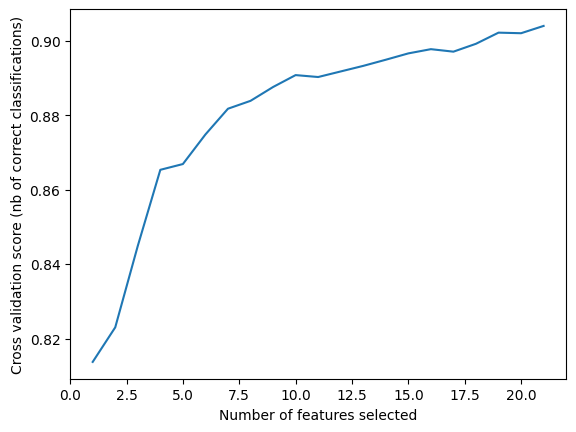

In [ ]:
from sklearn.feature_selection import RFECV

xgb = XGBClassifier(n_estimators=100, random_state=42)
#modelRF = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE object
rfecv = RFECV(estimator=xgb, step=1, cv=StratifiedKFold(10), scoring='accuracy')
y_train_combined = np.argmax(y_train, axis=1)

# Fit the RFE
rfecv.fit(X_train, y_train_combined)
#rfecv.fit(X_train, y_train)

print("Optimal number of features for XGB : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Get the selected features
#selected_features_count = np.sum(rfecv.support_)
#print("Number of features selected:", selected_features_count)


Optimal number of features for Decision Tree : 13


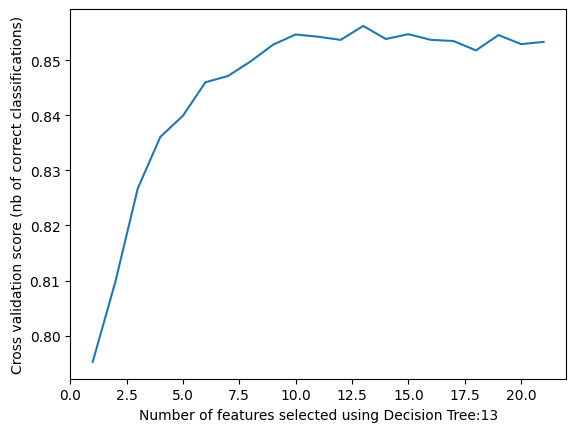

In [ ]:
from sklearn.feature_selection import RFECV

dt = DecisionTreeClassifier(random_state=42)
#modelRF = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE object
rfecv = RFECV(estimator=dt, step=1, cv=StratifiedKFold(10), scoring='accuracy')
y_train_combined = np.argmax(y_train, axis=1)

# Fit the RFE
rfecv.fit(X_train, y_train_combined)
#rfecv.fit(X_train, y_train)

print("Optimal number of features for Decision Tree : %d" % rfecv.n_features_)

selected_features_count = np.sum(rfecv.support_)
#print("Number of features selected:", selected_features_count)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected using Decision Tree:" + str(selected_features_count))
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Get the selected features
#selected_features_count = np.sum(rfecv.support_)
#print("Number of features selected:", selected_features_count)


In [ ]:
df = nacc_dementia
nacc_dementia = df.drop(['RISK_HYP','DIABETES','NACCTBI','CVHATT','VISION','MALE_GENDER'], axis=1) # TEST WITH TOP 15
#nacc_dementia = df.drop(['QUITSMOK','SMOKYRS','TOBAC100','SLEEPDIS','MARRIED_RELATIONSHIP','HEARING'], axis=1) # TEST WITH TOP 15

In [ ]:

#nacc_dementia.drop(['RISK_HYP','DIABETES','NACCTBI','CVHATT'], axis=1, inplace=True)

In [ ]:
# dro
y2 = nacc_dementia['CDRGLOB']
y = pd.get_dummies(y2)
X = nacc_dementia.drop(['CDRGLOB'], axis=1)

# Ensure y_train_flat is a numpy array
# Ensure y is a numpy array
y_flat = np.array(y)

# Apply SMOTE
smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X, y_flat)

# Convert X_resampled DataFrame to NumPy array and reshape it
X_resampled_flat = X_resampled.to_numpy().reshape(X_resampled.shape[0], -1)

# Check the number of samples after oversampling
print("Number of samples after oversampling:", X_resampled_flat.shape[0], y_resampled.shape[0])

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform (X_resampled_flat)
y_multi_class = np.argmax(y_resampled, axis=1)

X_train, X_test, y_train, y_test = train_test_split ( X_scaled, y_resampled,test_size = 0.2)
#X_train, X_test, y_train, y_test = train_test_split ( X_scaled, y_multi_class,test_size = 0.2)

kfold=10
skfold = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=42)




Number of samples after oversampling: 24210 24210


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import StackingClassifier

modelDT = DecisionTreeClassifier(random_state=42)
modelRF = RandomForestClassifier(n_estimators=200, random_state=42)  # You can adjust parameters as needed
modelXGB = XGBClassifier(random_state=42)  # You can adjust parameters as needed(16s)
modelANN = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Initialize multi-output wrapper
multi_rf_clf = MultiOutputClassifier(modelRF)
multi_xgb_clf = MultiOutputClassifier(modelXGB)
multi_dt_clf = MultiOutputClassifier(modelDT)
multi_ann_clf = MultiOutputClassifier(modelANN)

In [ ]:
# Initialize individual classifiers



# Define the stacking ensemble
#estimators = [('rf', modelRF), ('ANN', modelANN), ('dt', modelDT)]
#estimators = [('rf', modelRF), ('xgb', modelXGB), ('dt', modelDT)]
estimators = [('xgb', multi_xgb_clf), ('rf', multi_rf_clf), ('dt', multi_dt_clf)]
#estimators = [('ann', multi_ann_clf), ('dt', multi_dt_clf)]
#estimators = [('rf', modelRF), ('dt', modelDT)]
#estimators = [('xgb', multi_xgb_clf), ('dt', multi_dt_clf)]
#stacking_clf = StackingClassifier(estimators=estimators, final_estimator=modelRF)
stacking_clf_M4 = StackingClassifier(estimators=estimators, final_estimator=modelANN, cv=5)

#cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=10)  # You can specify the number of folds here as well

# Print the cross-validation scores
#print("Cross-validation Scores:", cv_scores)
#print("Mean CV Score:", np.mean(cv_scores))

# Train the stacking classifier
stacking_clf_M4.fit(X_train, y_train)

#X_test_np = np.array(X_test)
# Make predictions
#y_pred = stacking_clf_M4.predict(X_test)
# Create a Voting Classifier with 'soft' voting
#voting_clf = VotingClassifier(estimators=[('rf', multi_rf_clf), ('xgb', multi_rf_clf), ('dt', multi_dt_clf)], voting='soft')

# Train the Voting Classifier
#voting_clf.fit(X_train, y_train)

# Make predictions
#y_pred = voting_clf.predict(X_test)

# Evaluate performance


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


StackingClassifier(cv=5,
                   estimators=[('xgb',
                                MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                              booster=None,
                                                                              callbacks=None,
                                                                              colsample_bylevel=None,
                                                                              colsample_bynode=None,
                                                                              colsample_bytree=None,
                                                                              device=None,
                                                                              early_stopping_rounds=None,
                                                                              enable_categorical=False,
                                                                              eval_metric=None,
                                                                              feature_types=None,
                                                                              gamma=None,
                                                                              grow_policy=None,
                                                                              importance_type=None,
                                                                              i...
                                                                              min_child_weight=None,
                                                                              missing=nan,
                                                                              monotone_constraints=None,
                                                                              multi_strategy=None,
                                                                              n_estimators=None,
                                                                              n_jobs=None,
                                                                              num_parallel_tree=None,
                                                                              random_state=42, ...))),
                               ('rf',
                                MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))),
                               ('dt',
                                MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42)))],
                   final_estimator=MLPClassifier(random_state=42))

In [ ]:


# Define the stacking ensemble
#estimators = [('rf', modelRF), ('ANN', modelANN), ('dt', modelDT)]
#estimators = [('rf', modelRF), ('xgb', modelXGB), ('dt', modelDT)]
#estimators = [('xgb', multi_xgb_clf), ('rf', multi_rf_clf), ('dt', multi_dt_clf)]
estimators = [('ann', multi_ann_clf), ('dt', multi_dt_clf),('xgb', multi_xgb_clf)] #M3 RF
#estimators = [('rf', modelRF), ('dt', modelDT)]
#estimators = [('xgb', multi_xgb_clf), ('dt', multi_dt_clf)] M2 ANN
#estimators = [('xgb', multi_xgb_clf), ('dt', multi_dt_clf)] M1 RF
#stacking_clf = StackingClassifier(estimators=estimators, final_estimator=modelRF)
stacking_clf_M3 = StackingClassifier(estimators=estimators, final_estimator=modelRF, cv=5)

#cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=10)  # You can specify the number of folds here as well

# Print the cross-validation scores
#print("Cross-validation Scores:", cv_scores)
#print("Mean CV Score:", np.mean(cv_scores))

# Train the stacking classifier
stacking_clf_M3.fit(X_train, y_train)


In [ ]:


# Define the stacking ensemble
#estimators = [('rf', modelRF), ('ANN', modelANN), ('dt', modelDT)]
#estimators = [('rf', modelRF), ('xgb', modelXGB), ('dt', modelDT)]
#estimators = [('xgb', multi_xgb_clf), ('rf', multi_rf_clf), ('dt', multi_dt_clf)]
estimators = [('xgb', multi_xgb_clf), ('dt', multi_dt_clf)] #M2 ANN
#estimators = [('xgb', multi_xgb_clf), ('dt', multi_dt_clf)] M1 RF

#stacking_clf = StackingClassifier(estimators=estimators, final_estimator=modelRF)
stacking_clf_M2 = StackingClassifier(estimators=estimators, final_estimator=modelANN, cv=5)

#cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=10)  # You can specify the number of folds here as well

# Print the cross-validation scores
#print("Cross-validation Scores:", cv_scores)
#print("Mean CV Score:", np.mean(cv_scores))

# Train the stacking classifier
stacking_clf_M2.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


StackingClassifier(cv=5,
                   estimators=[('xgb',
                                MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                              booster=None,
                                                                              callbacks=None,
                                                                              colsample_bylevel=None,
                                                                              colsample_bynode=None,
                                                                              colsample_bytree=None,
                                                                              device=None,
                                                                              early_stopping_rounds=None,
                                                                              enable_categorical=False,
                                                                              eval_metric=None,
                                                                              feature_types=None,
                                                                              gamma=None,
                                                                              grow_policy=None,
                                                                              importance_type=None,
                                                                              i...
                                                                              max_cat_to_onehot=None,
                                                                              max_delta_step=None,
                                                                              max_depth=None,
                                                                              max_leaves=None,
                                                                              min_child_weight=None,
                                                                              missing=nan,
                                                                              monotone_constraints=None,
                                                                              multi_strategy=None,
                                                                              n_estimators=None,
                                                                              n_jobs=None,
                                                                              num_parallel_tree=None,
                                                                              random_state=42, ...))),
                               ('dt',
                                MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42)))],
                   final_estimator=MLPClassifier(random_state=42))

In [ ]:


# Define the stacking ensemble
#estimators = [('rf', modelRF), ('ANN', modelANN), ('dt', modelDT)]
#estimators = [('rf', modelRF), ('xgb', modelXGB), ('dt', modelDT)]
#estimators = [('xgb', multi_xgb_clf), ('rf', multi_rf_clf), ('dt', multi_dt_clf)]
#estimators = [('xgb', multi_xgb_clf), ('dt', multi_dt_clf)] M2 ANN
estimators = [('xgb', multi_xgb_clf), ('dt', multi_dt_clf)] #M1 RF
stacking_clf_M1 = StackingClassifier(estimators=estimators, final_estimator=modelRF, cv=5)

#cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=10)  # You can specify the number of folds here as well

# Print the cross-validation scores
#print("Cross-validation Scores:", cv_scores)
#print("Mean CV Score:", np.mean(cv_scores))

# Train the stacking classifier
stacking_clf_M1.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('xgb',
                                MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                              booster=None,
                                                                              callbacks=None,
                                                                              colsample_bylevel=None,
                                                                              colsample_bynode=None,
                                                                              colsample_bytree=None,
                                                                              device=None,
                                                                              early_stopping_rounds=None,
                                                                              enable_categorical=False,
                                                                              eval_metric=None,
                                                                              feature_types=None,
                                                                              gamma=None,
                                                                              grow_policy=None,
                                                                              importance_type=None,
                                                                              i...
                                                                              max_cat_to_onehot=None,
                                                                              max_delta_step=None,
                                                                              max_depth=None,
                                                                              max_leaves=None,
                                                                              min_child_weight=None,
                                                                              missing=nan,
                                                                              monotone_constraints=None,
                                                                              multi_strategy=None,
                                                                              n_estimators=None,
                                                                              n_jobs=None,
                                                                              num_parallel_tree=None,
                                                                              random_state=42, ...))),
                               ('dt',
                                MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=42)))],
                   final_estimator=RandomForestClassifier(random_state=42))

Accuracy: 0.9023130937629079
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       986
           1       0.89      0.84      0.87      1009
           2       0.91      0.89      0.90       949
           3       0.94      0.93      0.93       937
           4       0.98      0.97      0.98       961

   micro avg       0.93      0.90      0.92      4842
   macro avg       0.93      0.90      0.92      4842
weighted avg       0.93      0.90      0.92      4842
 samples avg       0.90      0.90      0.90      4842



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


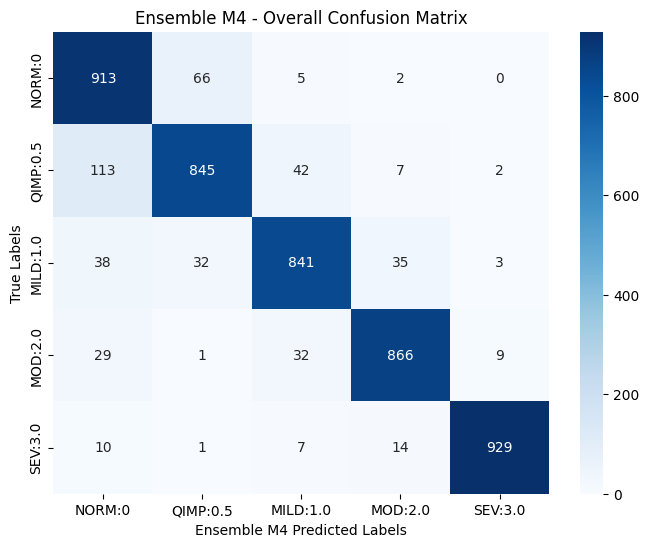

In [ ]:
y_pred = stacking_clf_M4.predict(X_test)
accuracy_M4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_M4)
class_report_ENSEMBLE_M4 = classification_report(y_test, y_pred)
print(class_report_ENSEMBLE_M4)

y_test_combined = np.argmax(y_test, axis=1)
y_pred_combined = np.argmax(y_pred, axis=1)

class_labels =['NORM:0','QIMP:0.5','MILD:1.0','MOD:2.0','SEV:3.0']

# Compute the overall confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Ensemble M4 - Overall Confusion Matrix')
plt.xlabel('Ensemble M4 Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy M1: 0.8781495249896737
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       986
           1       0.89      0.79      0.84      1009
           2       0.89      0.86      0.87       949
           3       0.93      0.91      0.92       937
           4       0.98      0.96      0.97       961

   micro avg       0.92      0.88      0.90      4842
   macro avg       0.92      0.88      0.90      4842
weighted avg       0.92      0.88      0.90      4842
 samples avg       0.88      0.88      0.88      4842



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


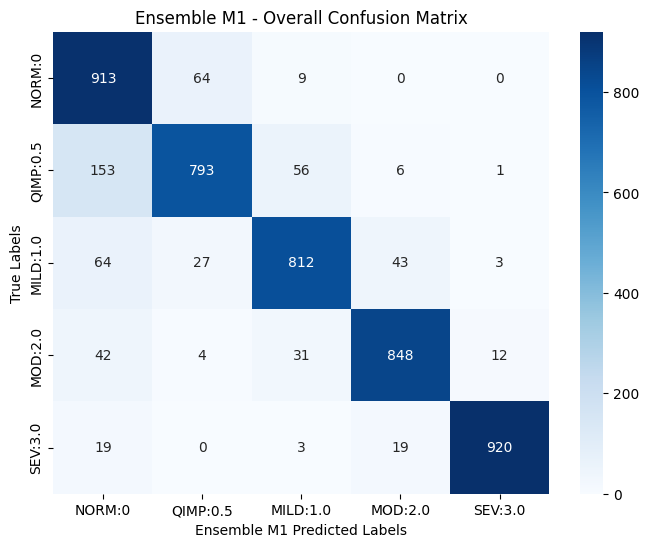

In [ ]:
y_pred = stacking_clf_M1.predict(X_test)
accuracy_M1 = accuracy_score(y_test, y_pred)
print("Accuracy M1:", accuracy_M1)
class_report_ENSEMBLE_M1 = classification_report(y_test, y_pred)
print(class_report_ENSEMBLE_M1)

y_test_combined = np.argmax(y_test, axis=1)
y_pred_combined = np.argmax(y_pred, axis=1)

class_labels =['NORM:0','QIMP:0.5','MILD:1.0','MOD:2.0','SEV:3.0']

# Compute the overall confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Ensemble M1 - Overall Confusion Matrix')
plt.xlabel('Ensemble M1 Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy M2: 0.8814539446509707
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       986
           1       0.92      0.77      0.84      1009
           2       0.90      0.87      0.89       949
           3       0.91      0.91      0.91       937
           4       0.98      0.96      0.97       961

   micro avg       0.93      0.88      0.90      4842
   macro avg       0.93      0.88      0.90      4842
weighted avg       0.93      0.88      0.90      4842
 samples avg       0.88      0.88      0.88      4842



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


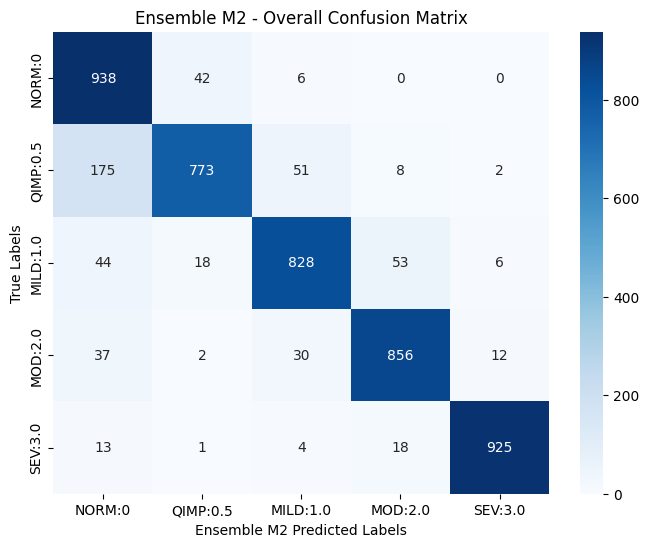

In [ ]:
y_pred = stacking_clf_M2.predict(X_test)
accuracy_M2 = accuracy_score(y_test, y_pred)
print("Accuracy M2:", accuracy_M2)
class_report_ENSEMBLE_M2 = classification_report(y_test, y_pred)
print(class_report_ENSEMBLE_M2)

y_test_combined = np.argmax(y_test, axis=1)
y_pred_combined = np.argmax(y_pred, axis=1)

class_labels =['NORM:0','QIMP:0.5','MILD:1.0','MOD:2.0','SEV:3.0']

# Compute the overall confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Ensemble M2 - Overall Confusion Matrix')
plt.xlabel('Ensemble M2 Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy M3: 0.8812474184221396
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       986
           1       0.91      0.78      0.84      1009
           2       0.91      0.86      0.89       949
           3       0.92      0.91      0.92       937
           4       0.99      0.95      0.97       961

   micro avg       0.93      0.88      0.91      4842
   macro avg       0.93      0.88      0.91      4842
weighted avg       0.93      0.88      0.90      4842
 samples avg       0.88      0.88      0.88      4842



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


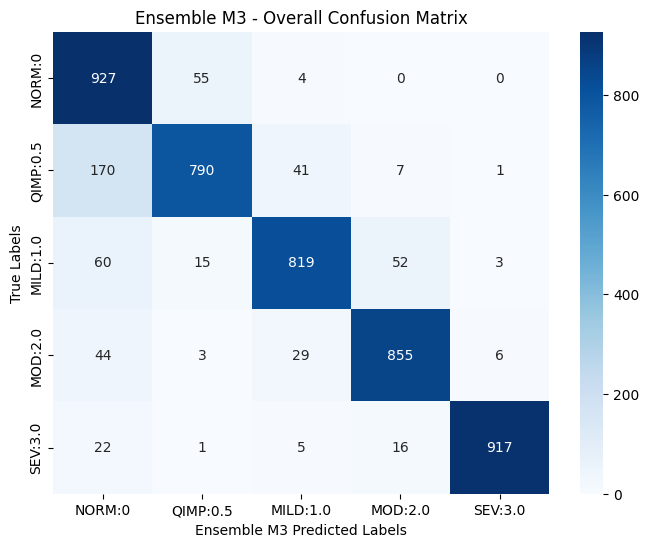

In [ ]:
y_pred = stacking_clf_M3.predict(X_test)
accuracy_M3 = accuracy_score(y_test, y_pred)
print("Accuracy M3:", accuracy_M3)
class_report_ENSEMBLE_M3 = classification_report(y_test, y_pred)
print(class_report_ENSEMBLE_M3)

y_test_combined = np.argmax(y_test, axis=1)
y_pred_combined = np.argmax(y_pred, axis=1)

class_labels =['NORM:0','QIMP:0.5','MILD:1.0','MOD:2.0','SEV:3.0']

# Compute the overall confusion matrix
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Ensemble M3 - Overall Confusion Matrix')
plt.xlabel('Ensemble M3 Predicted Labels')
plt.ylabel('True Labels')
plt.show()


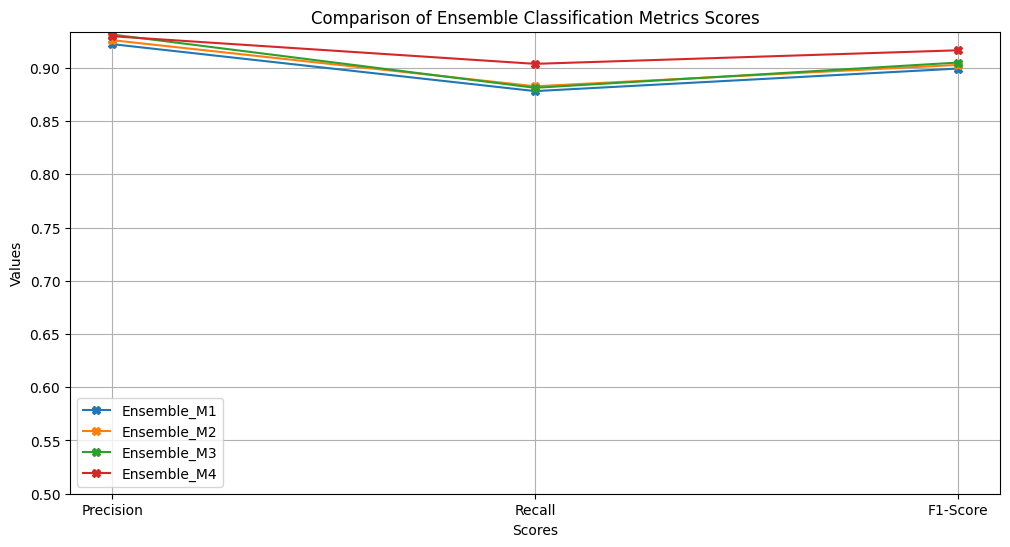

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

classifiers = ["Ensemble_M1", "Ensemble_M2", "Ensemble_M3", "Ensemble_M4"]
precision = []
recall = []
f1_score = []

for classifier in [stacking_clf_M1, stacking_clf_M2, stacking_clf_M3, stacking_clf_M4]:
    y_pred = classifier.predict(X_test)
    metrics = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision.append(metrics[0])
    recall.append(metrics[1])
    f1_score.append(metrics[2])

# Transpose the data
metrics_data = np.array([precision, recall, f1_score])

# Plot the transposed metrics
# Plot the metrics with classifiers as legends
plt.figure(figsize=(12, 6))
plt.plot(['Precision', 'Recall', 'F1-Score'], [precision, recall, f1_score], marker='X')
plt.xlabel('Scores')
plt.ylabel('Values')
plt.title('Comparison of Ensemble Classification Metrics Scores')
plt.legend(classifiers)
plt.grid(True)

plt.ylim(0.5, None)
plt.show()

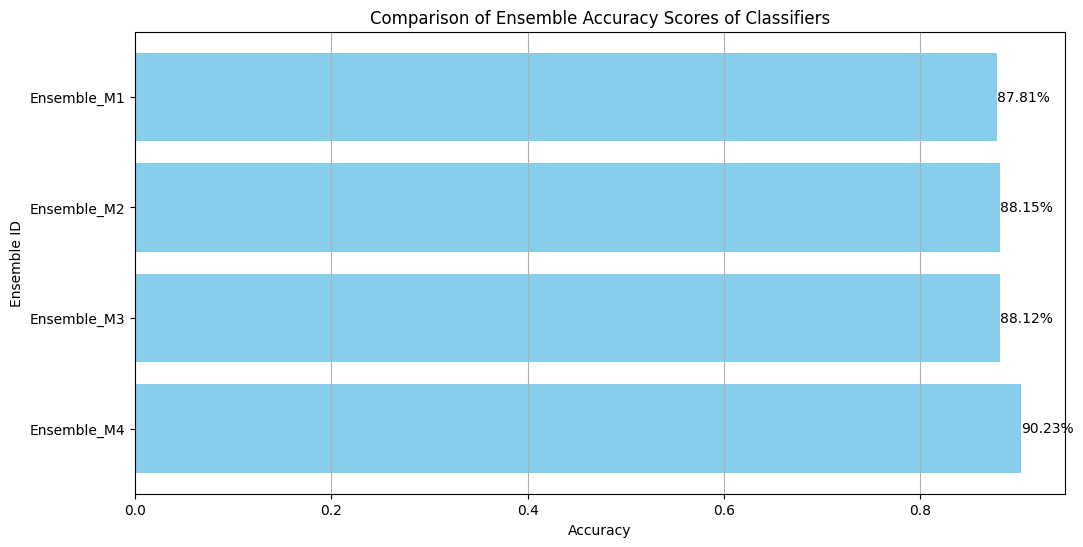

In [ ]:
classifiers = ["Ensemble_M1", "Ensemble_M2", "Ensemble_M3", "Ensemble_M4"]
accuracy_scores = [accuracy_M1, accuracy_M2, accuracy_M3, accuracy_M4]  # Example accuracy scores, replace with actual scores

# Calculate percentages
total = sum(accuracy_scores)
percentages = [(score) * 100 for score in accuracy_scores]

# Define colors for each bar
colors = 'skyblue'

# Create horizontal bar plot
plt.figure(figsize=(12, 6))
bars = plt.barh(classifiers, accuracy_scores, color=colors)

# Add percentages to each bar
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%',
             va='center', ha='left', fontsize=10)

plt.xlabel('Accuracy')
plt.ylabel('Ensemble ID')
plt.title('Comparison of Ensemble Accuracy Scores of Classifiers')
plt.gca().invert_yaxis()  # Invert y-axis to have classifiers listed from top to bottom
plt.grid(axis='x')
plt.show()